# Credit Card Customer Segmentation

This project aims to develop a customer segmentation using credit card data that could help define a marketing strategy.  Building K-Means clustering models to determine the optimal number of clusters and interpreting the resulting groups will be the main objective of the project.  Other unsupervised models such as DBSCAN and Self-Organzinf Maps will also be explored.

**Content:**
* Data Preprocessing, Feature Engineering, and EDA
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA
* Comparison of K-Means to DBSCAN
* Self-Organizing Maps (SOMs)

Load the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib.patches import Rectangle
from minisom import MiniSom
import matplotlib.patches as patches
from random import sample
from numpy.random import uniform
from math import isnan
from pylab import bone, pcolor, colorbar, plot, show

import warnings
warnings.filterwarnings(action="ignore")


# Loading Data

## Dataset Reference
Bhasin, Arjun. (2013). Credit Card Dataset for Clustering.  CC0: Public Domain.  Retrieved from\
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata


Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.  The dataset contains no labels.

Following is the Data Dictionary for Credit Card dataset :
* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [2]:
df = pd.read_csv(r'C:\Users\asee\Desktop\MS DS\Machine Learning Unsupervised\Final Project\data\CC GENERAL.csv')

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Data Preprocessing, Feature Engineering, and EDA

Lets have a look at the data to see what steps we should take to prepare the data for modeling.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dropping customer ID because it is categorical

In [5]:
df.drop('CUST_ID', axis=1, inplace=True)

#### Missing Data

Now we will check for missing data.

In [6]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS          313
CREDIT_LIMIT                1
BALANCE                     0
CASH_ADVANCE_FREQUENCY      0
PRC_FULL_PAYMENT            0
dtype: int64

Since credit limit has just one missing value we will just drop that row.  For minimum payments we will replace with the median because with the heavy skewness of the data it gives us a better estimation of the central tendency of this feature.

In [7]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

#### Skewness

Now we will check for skewness in the data.

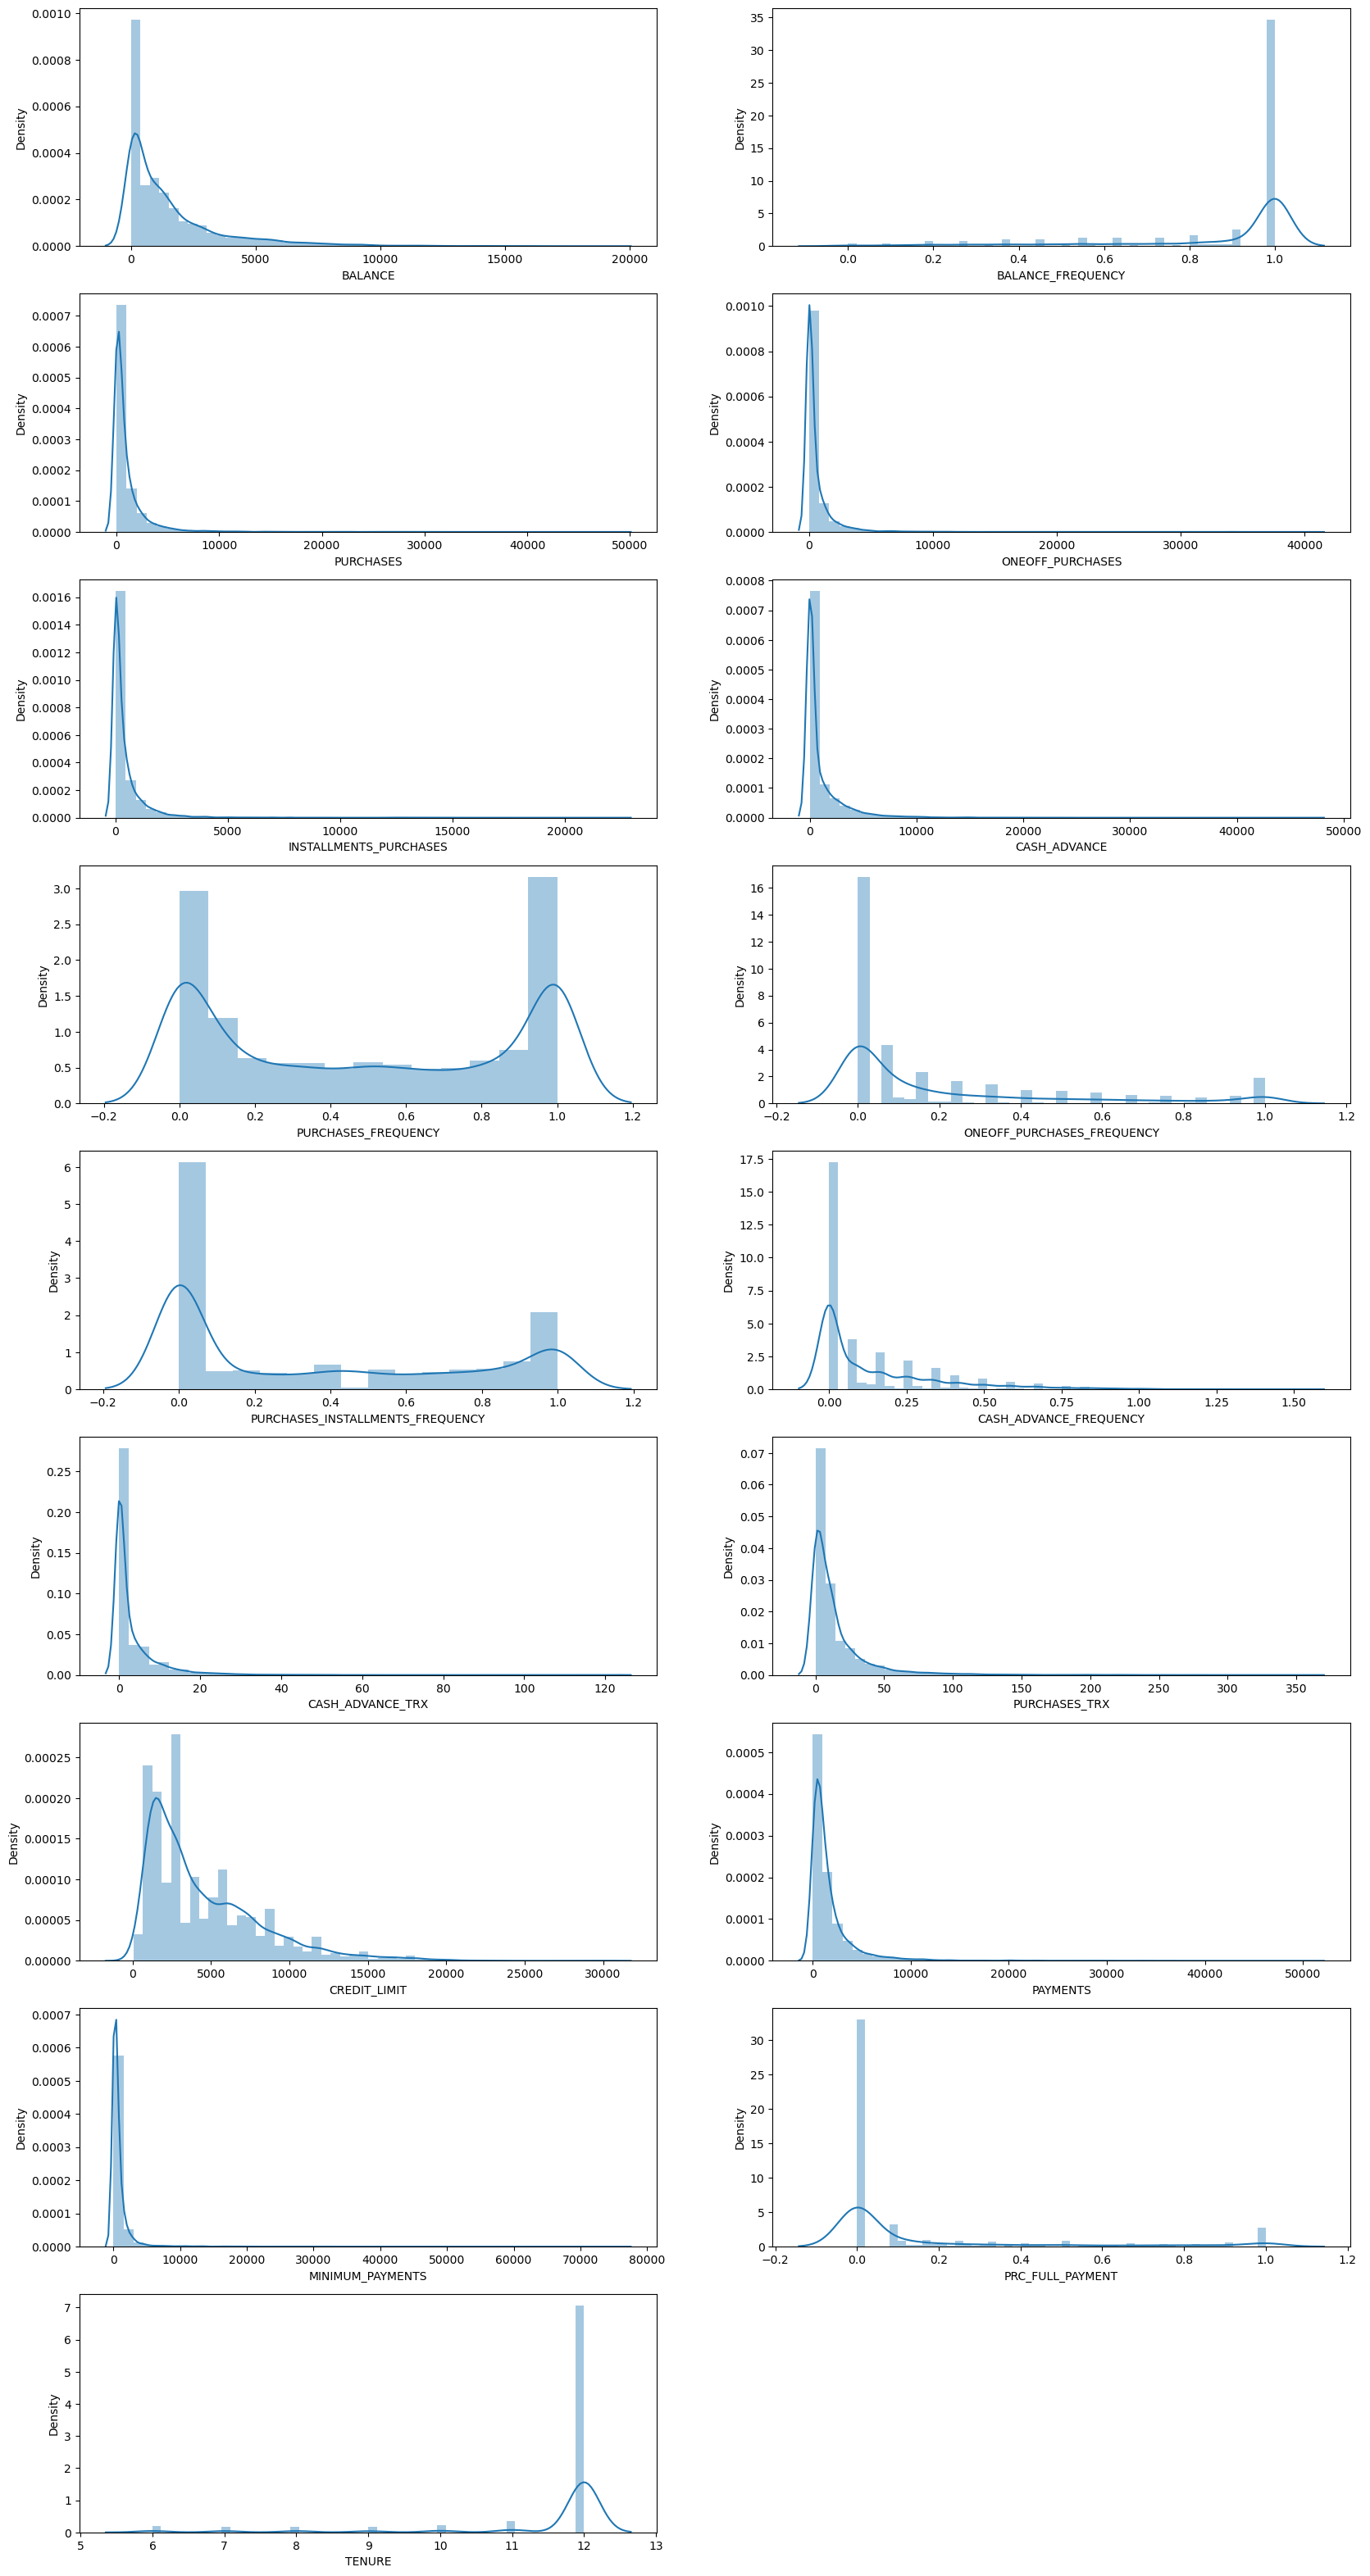

In [8]:
i=1
plt.figure(figsize= (20,40))
for col in df.columns:
    plt.subplot(9,2,i)
        
    sns.distplot(df[col])
    
    i=i+1
plt.show()

In [9]:
for col in df.columns:
    print(col)
    print({df[col].skew()})

BALANCE
{2.393270481328754}
BALANCE_FREQUENCY
{-2.0241932378008083}
PURCHASES
{8.143969328745825}
ONEOFF_PURCHASES
{10.044621791824193}
INSTALLMENTS_PURCHASES
{7.298823158100543}
CASH_ADVANCE
{5.1663234455291605}
PURCHASES_FREQUENCY
{0.0599701177816327}
ONEOFF_PURCHASES_FREQUENCY
{1.5354529638777794}
PURCHASES_INSTALLMENTS_FREQUENCY
{0.5090232211948914}
CASH_ADVANCE_FREQUENCY
{1.8286441199006067}
CASH_ADVANCE_TRX
{5.72097632533681}
PURCHASES_TRX
{4.6304932272467205}
CREDIT_LIMIT
{1.5224640052886198}
PAYMENTS
{5.90746501386916}
MINIMUM_PAYMENTS
{13.851852833613735}
PRC_FULL_PAYMENT
{1.9426413977925}
TENURE
{-2.9447877484535407}


The data seems pretty heavily skewed.  We will log transform the data to attempt to make it into more of Gaussian distribution. 

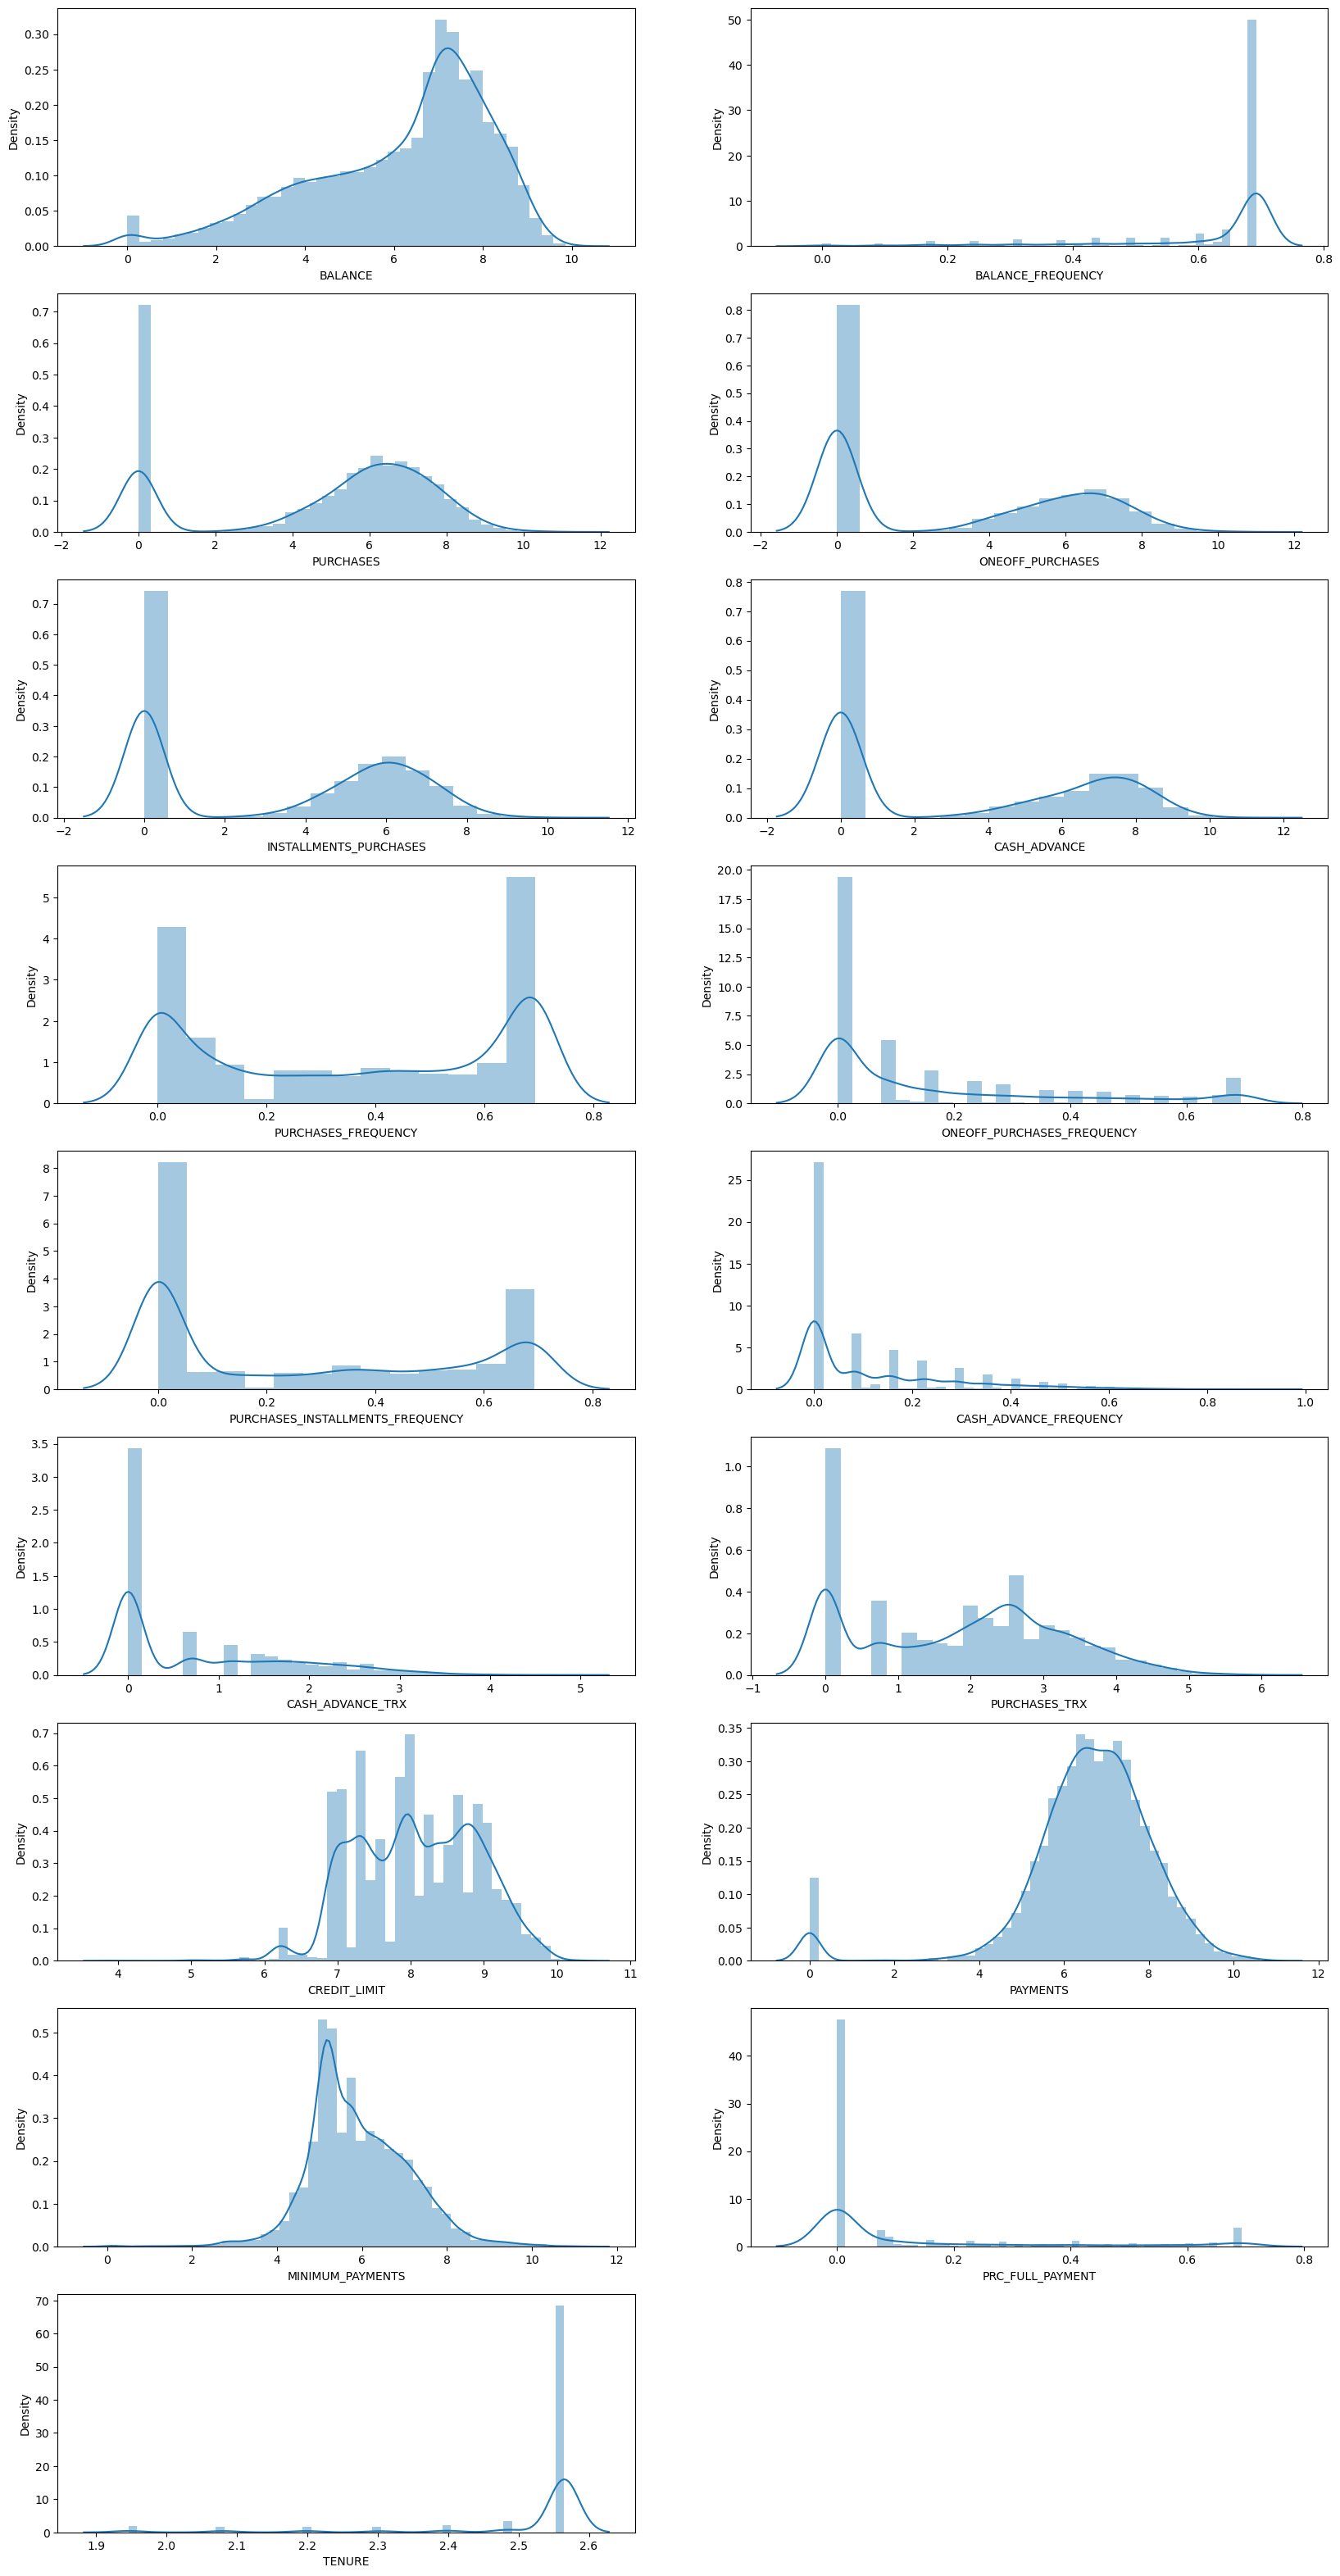

In [10]:
i=1
plt.figure(figsize=(20,40))
for col in df.columns:
    plt.subplot(9,2,i)
    df[col]= np.log1p(df[col])
    sns.distplot(df[col])
    i=i+1
    
plt.show()

The data still has skewness in some of the features but are more of a normal distribution than before.

#### Correlation

Now we will check for correlation between features.

<AxesSubplot: >

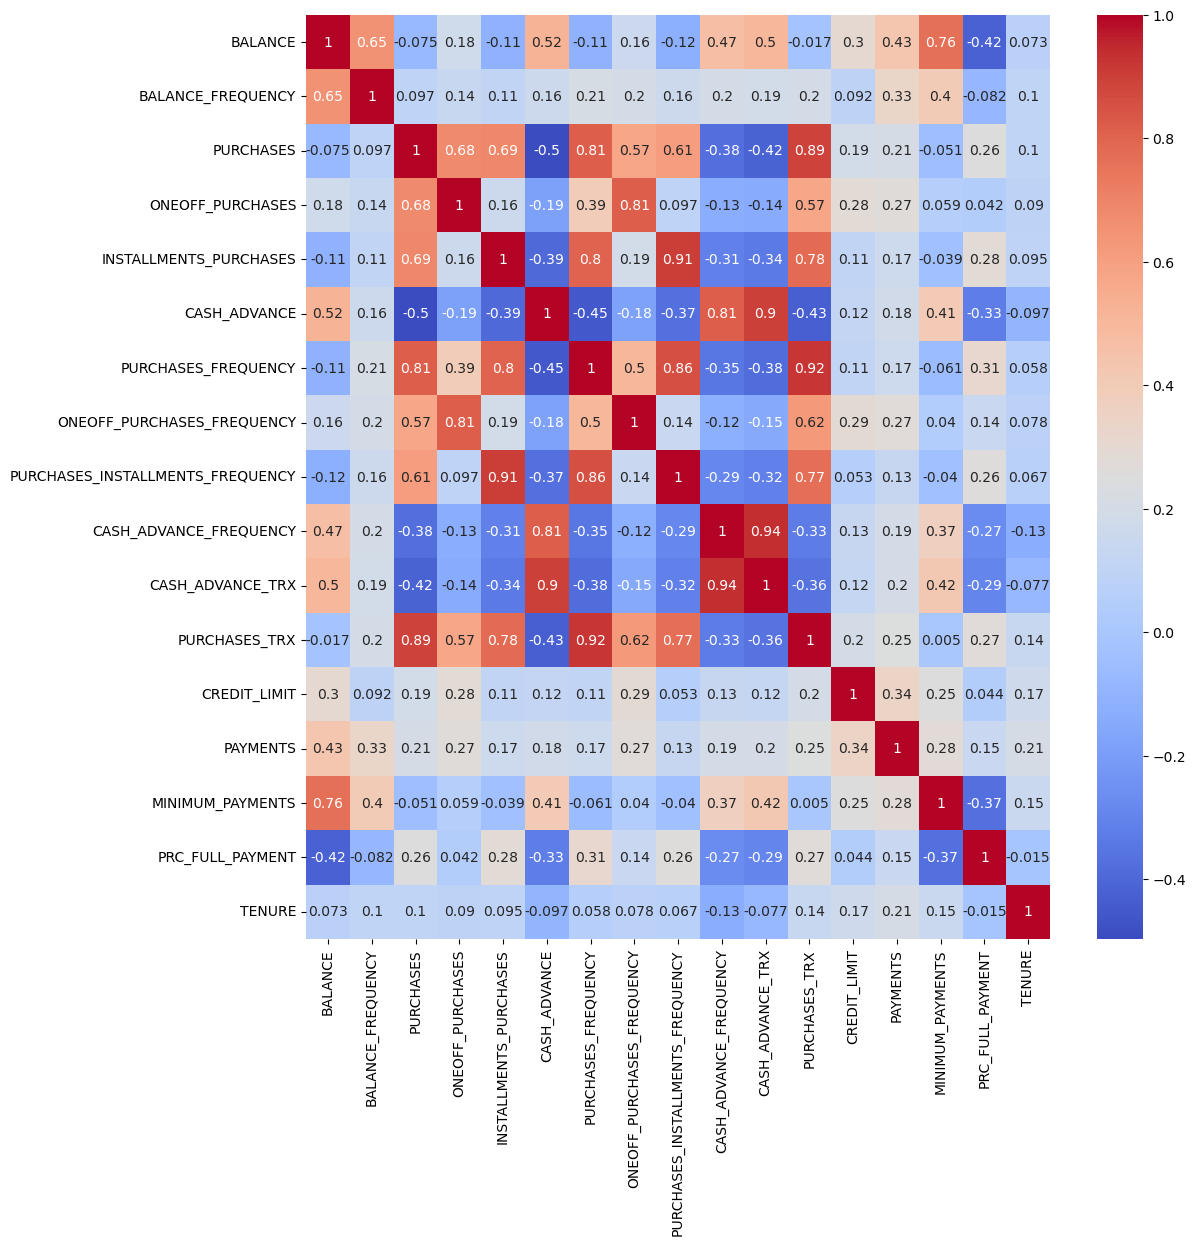

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Removing highly correlated features

In [12]:
df.drop(columns = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                  'PURCHASES_TRX'],
         inplace=True)


#### Outliers

Looking at the boxplots below shows that the data contains some pretty extreme outliers

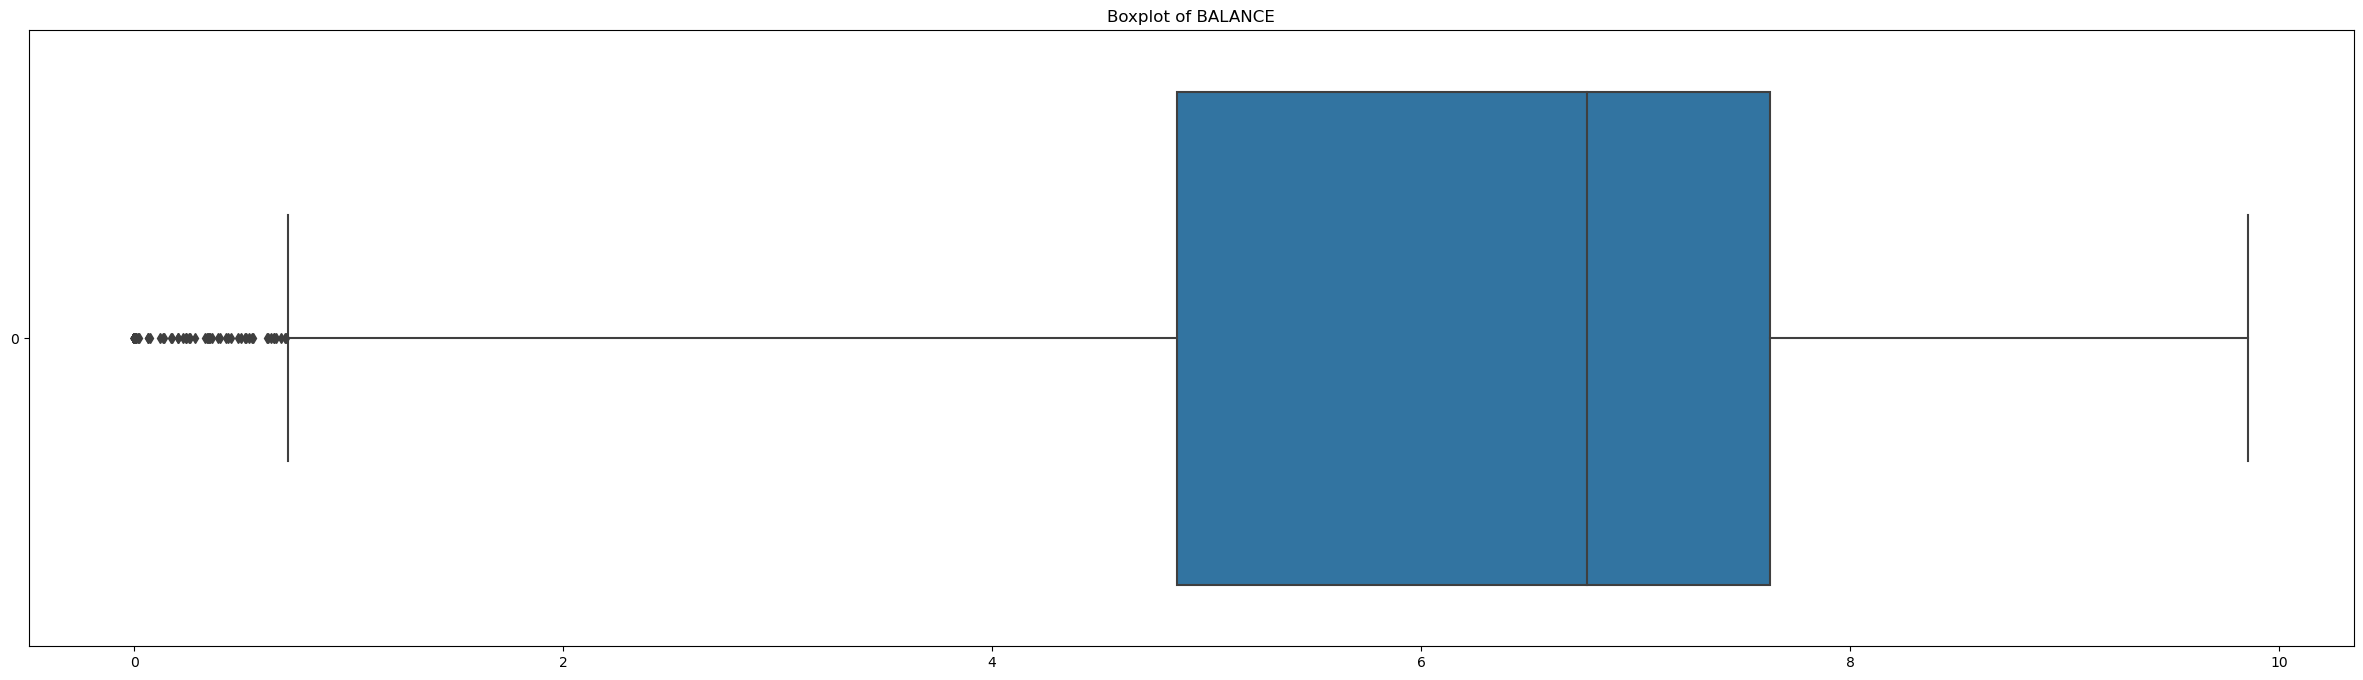

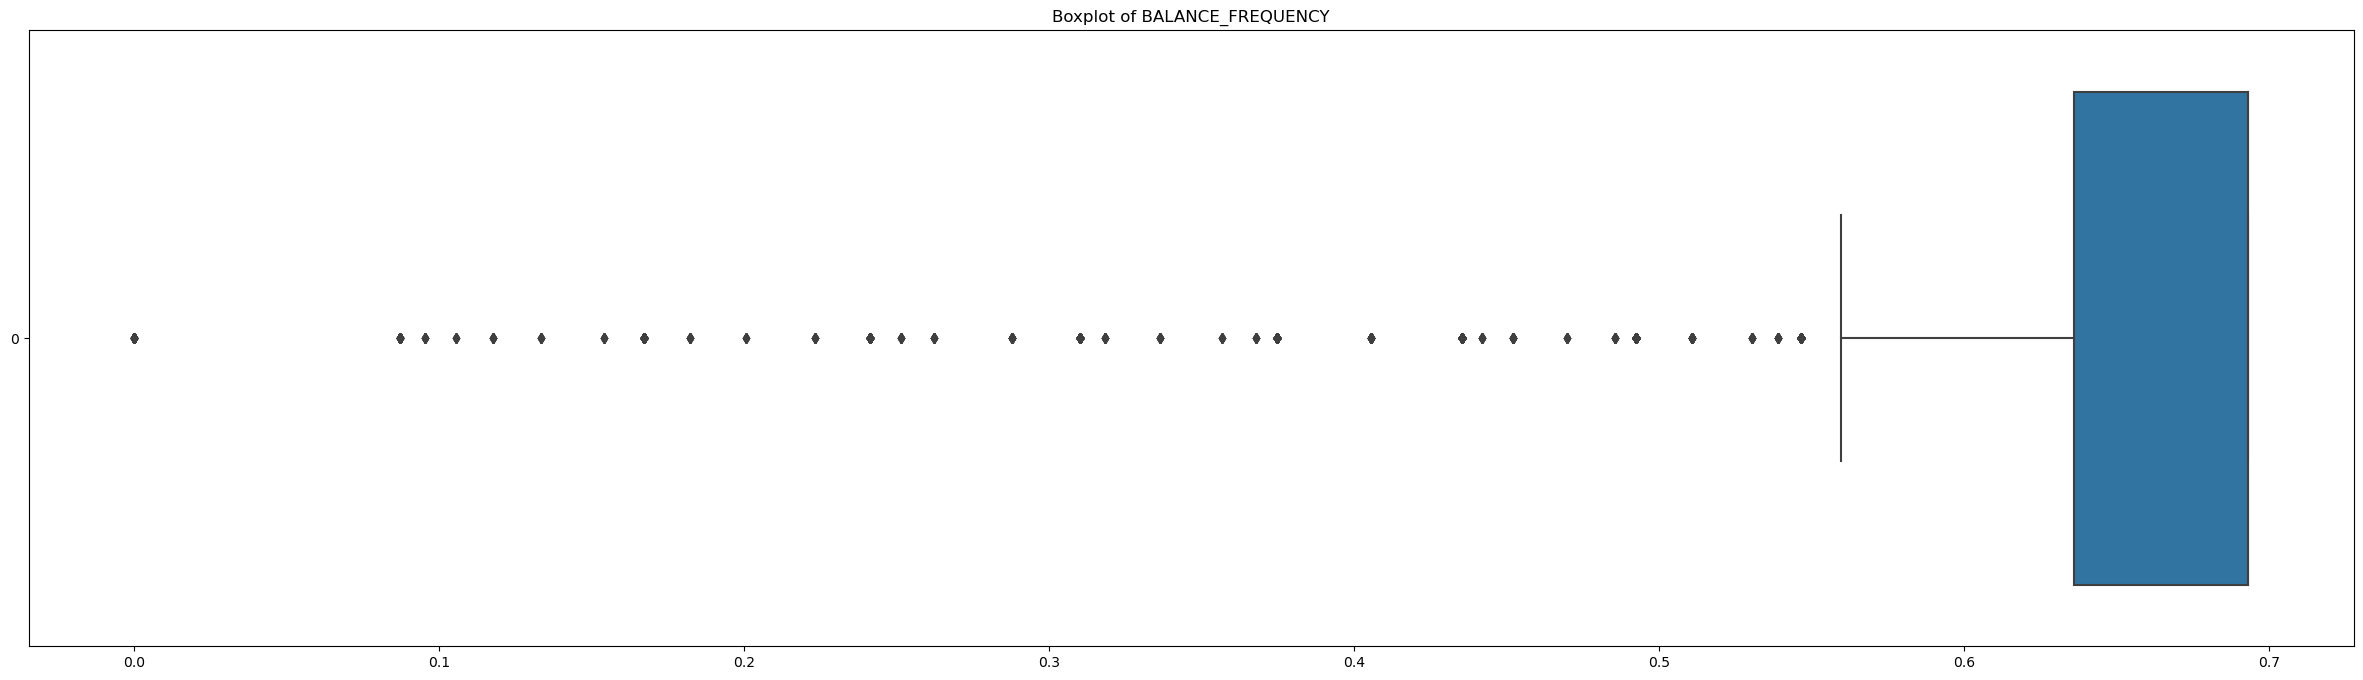

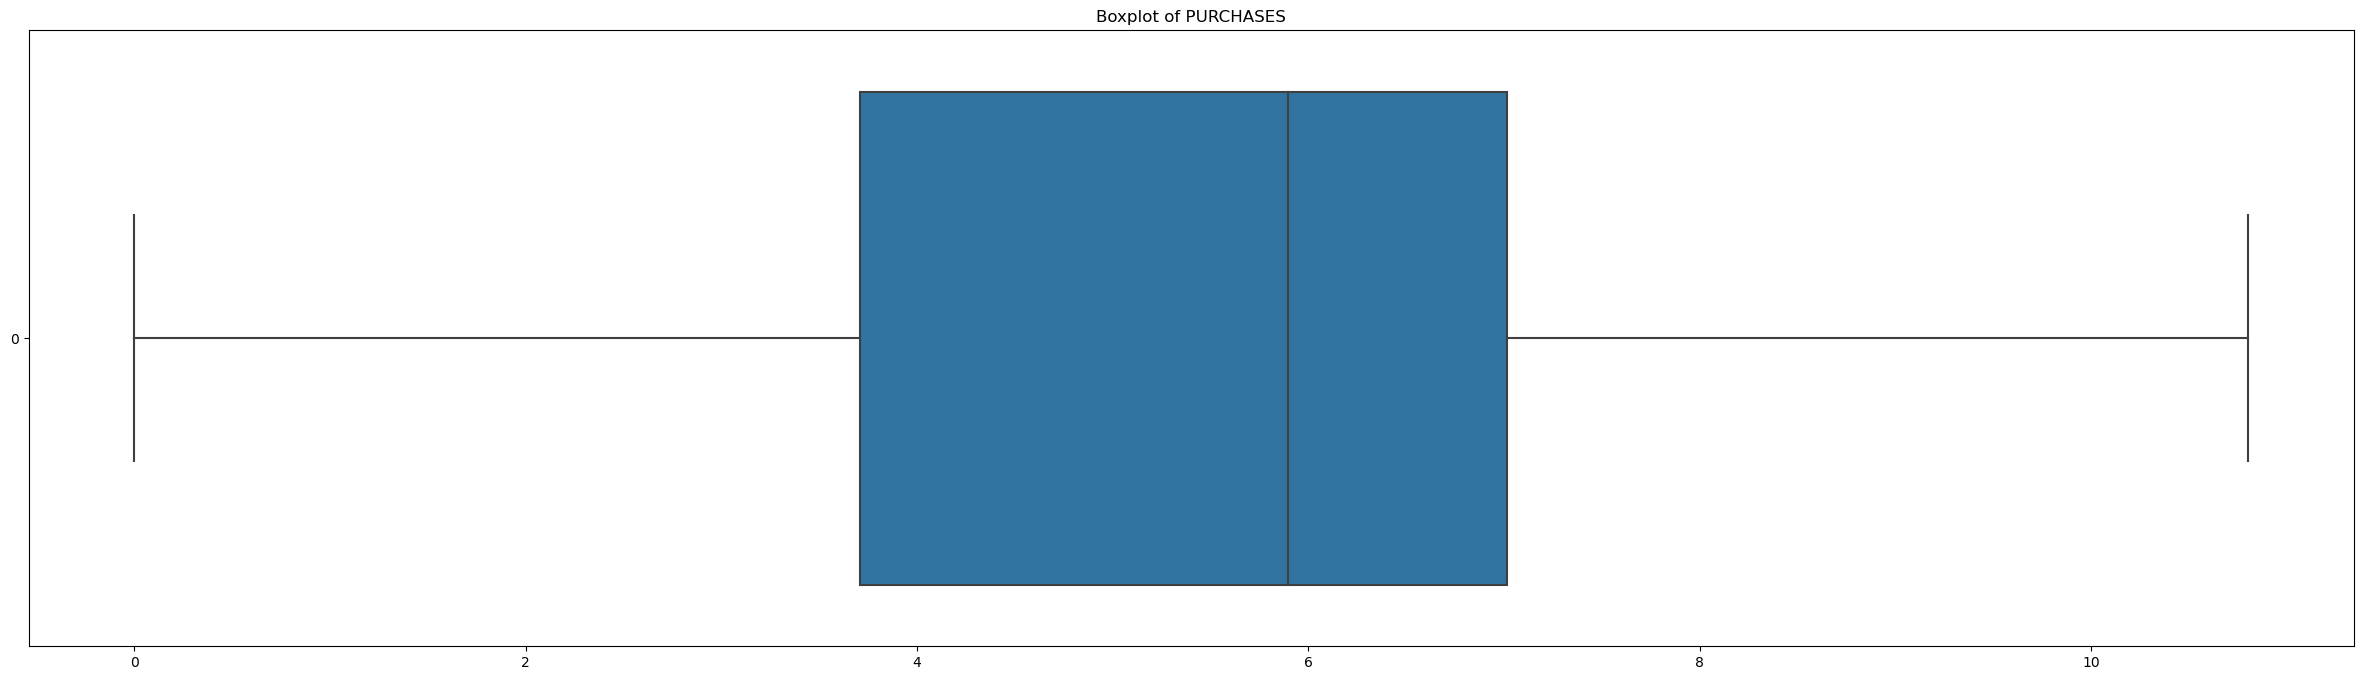

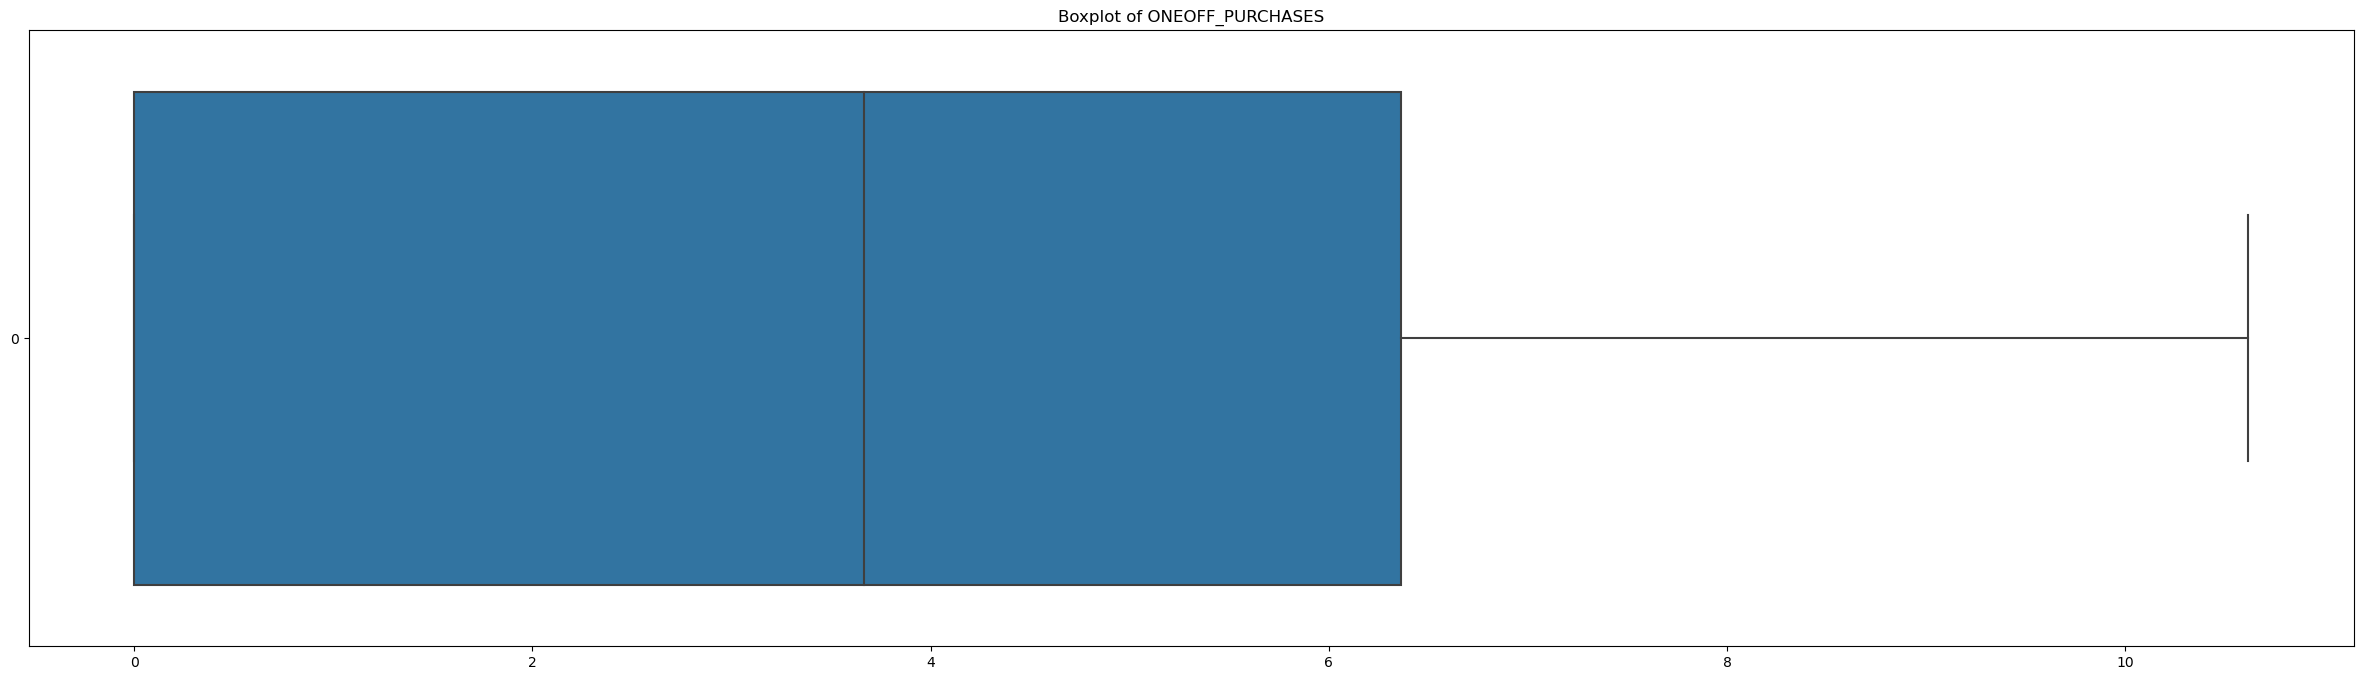

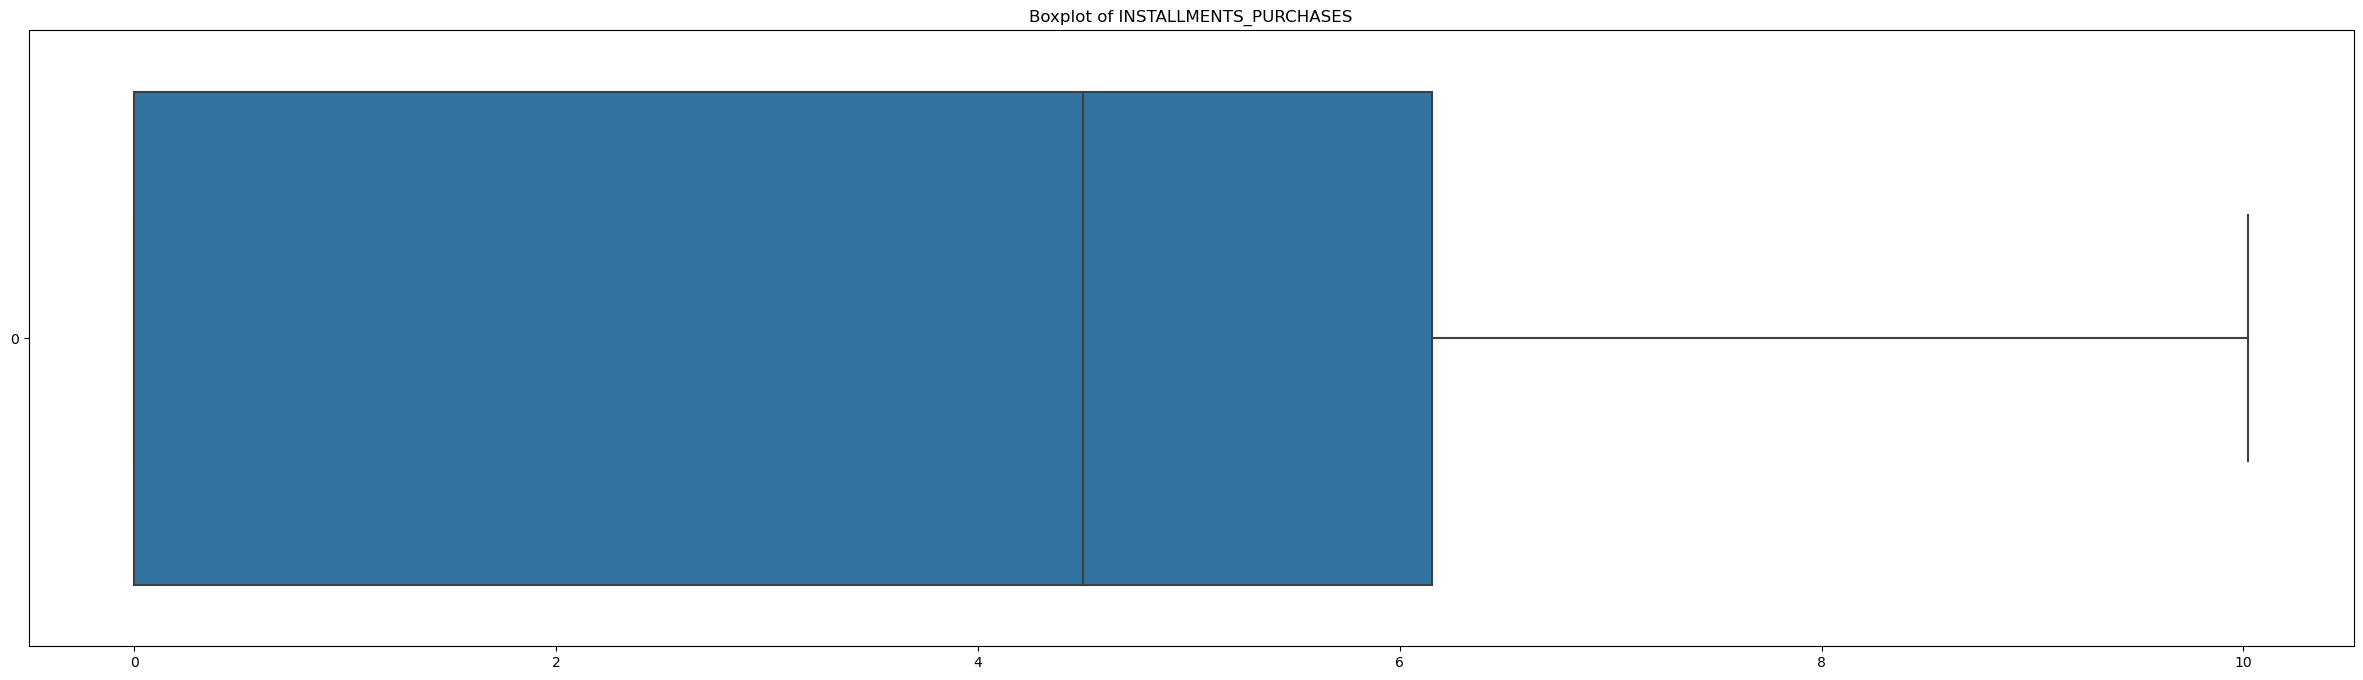

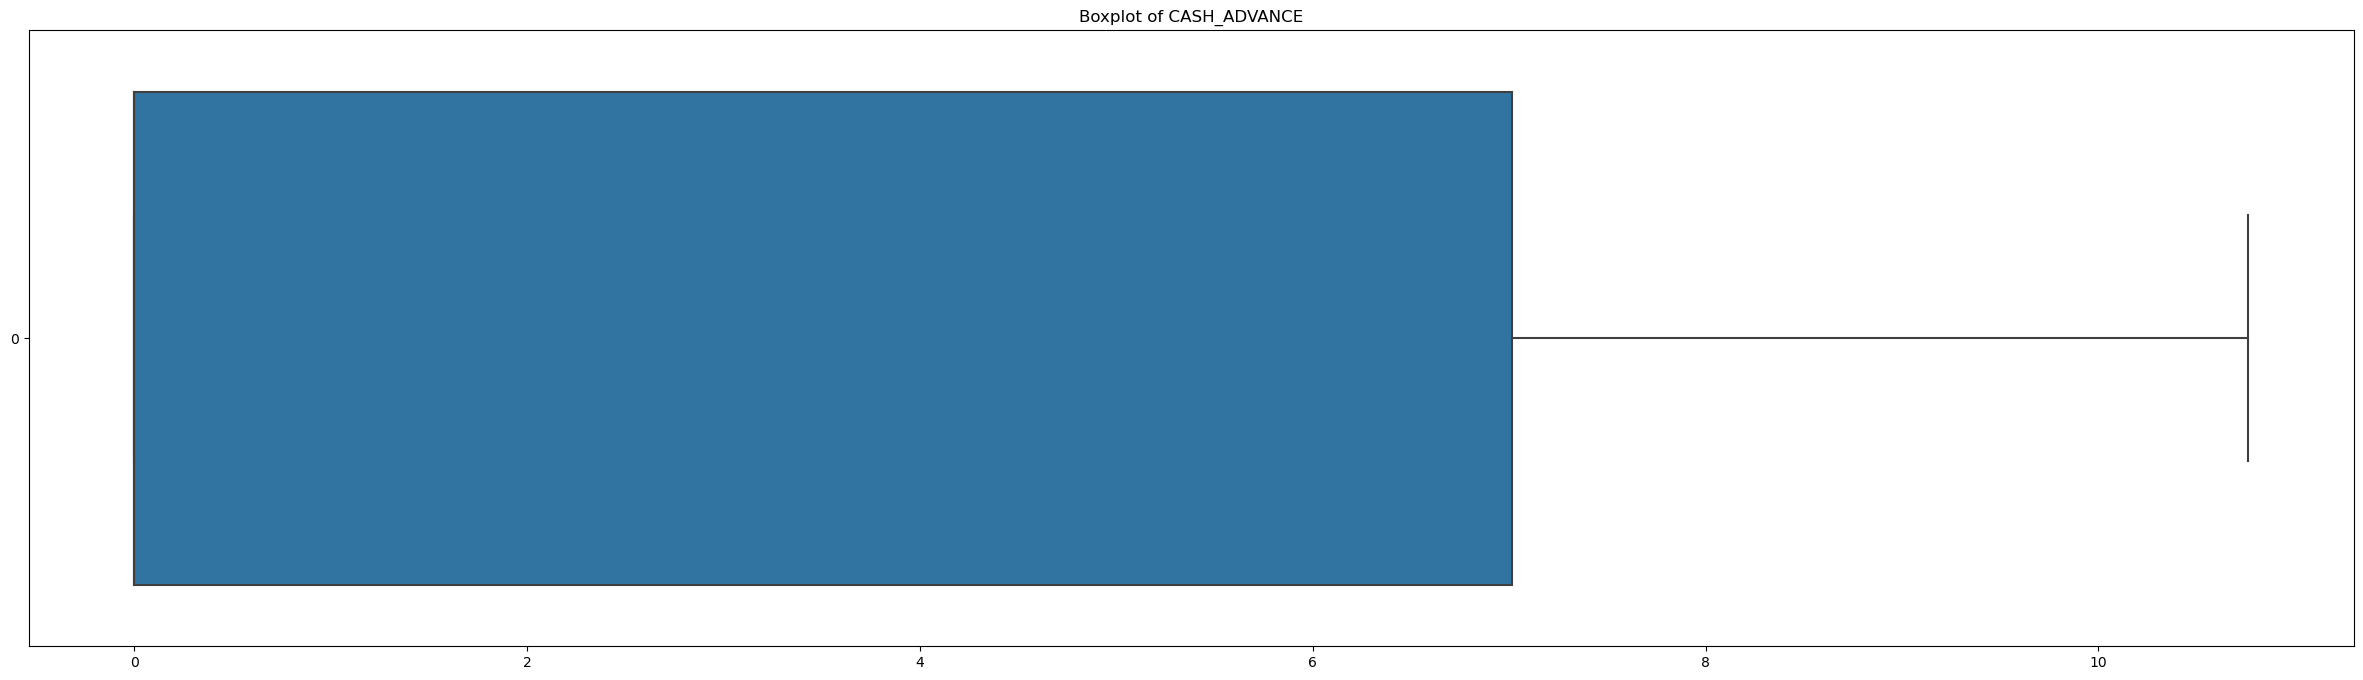

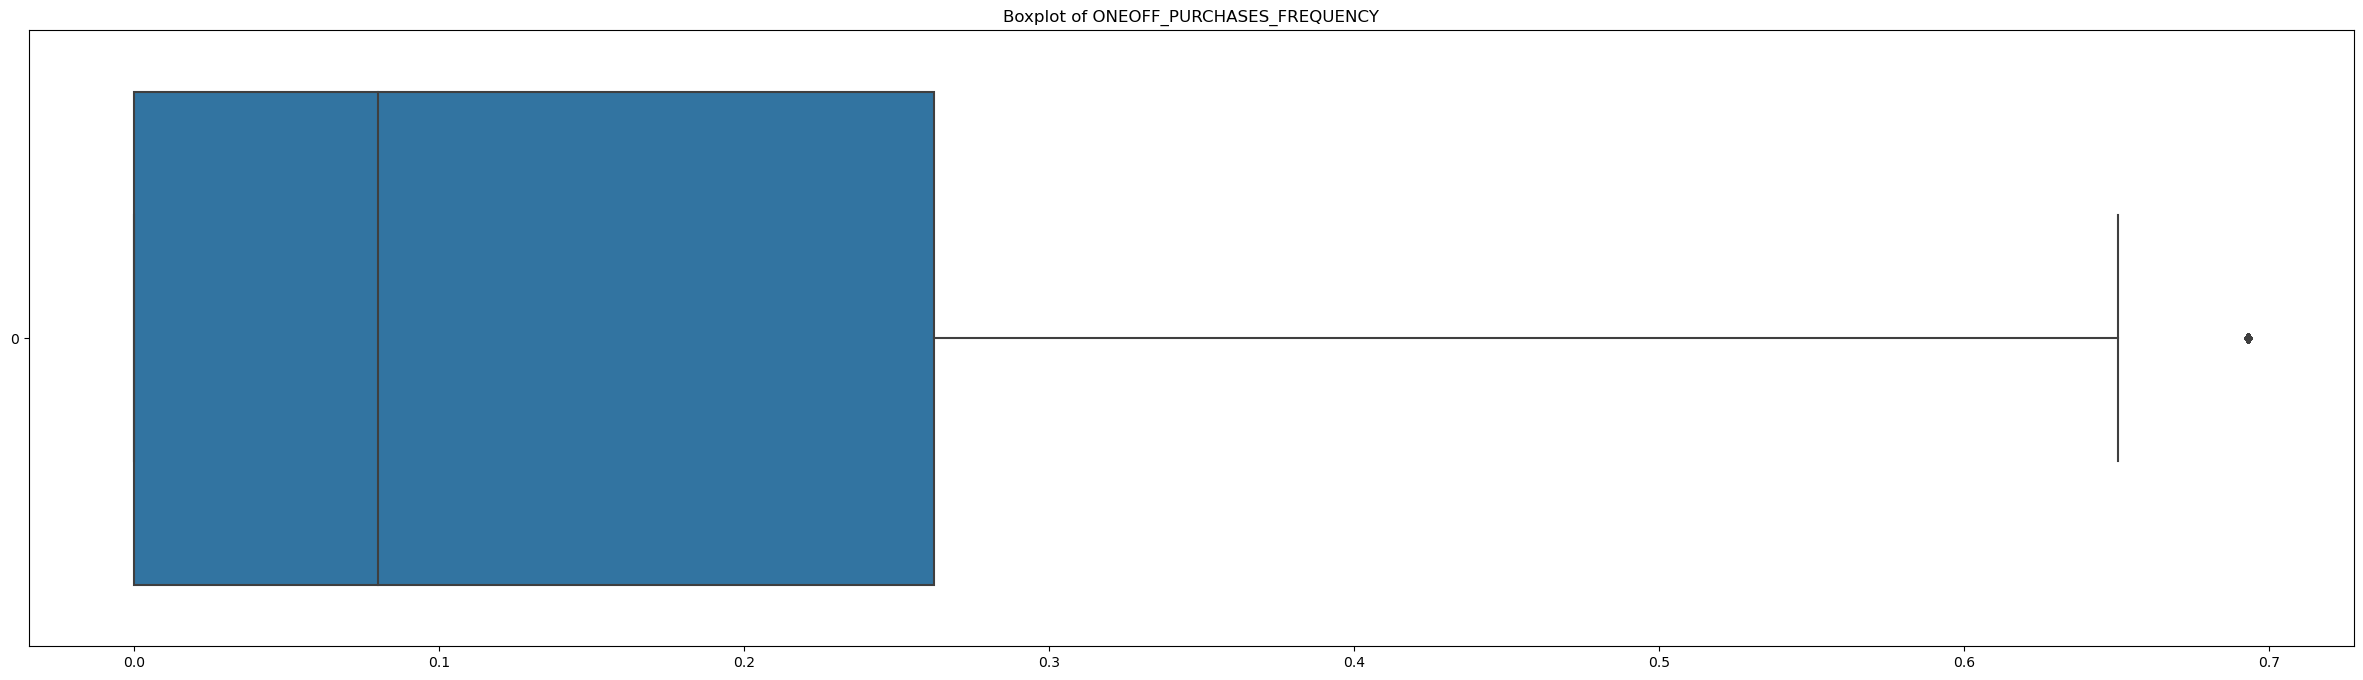

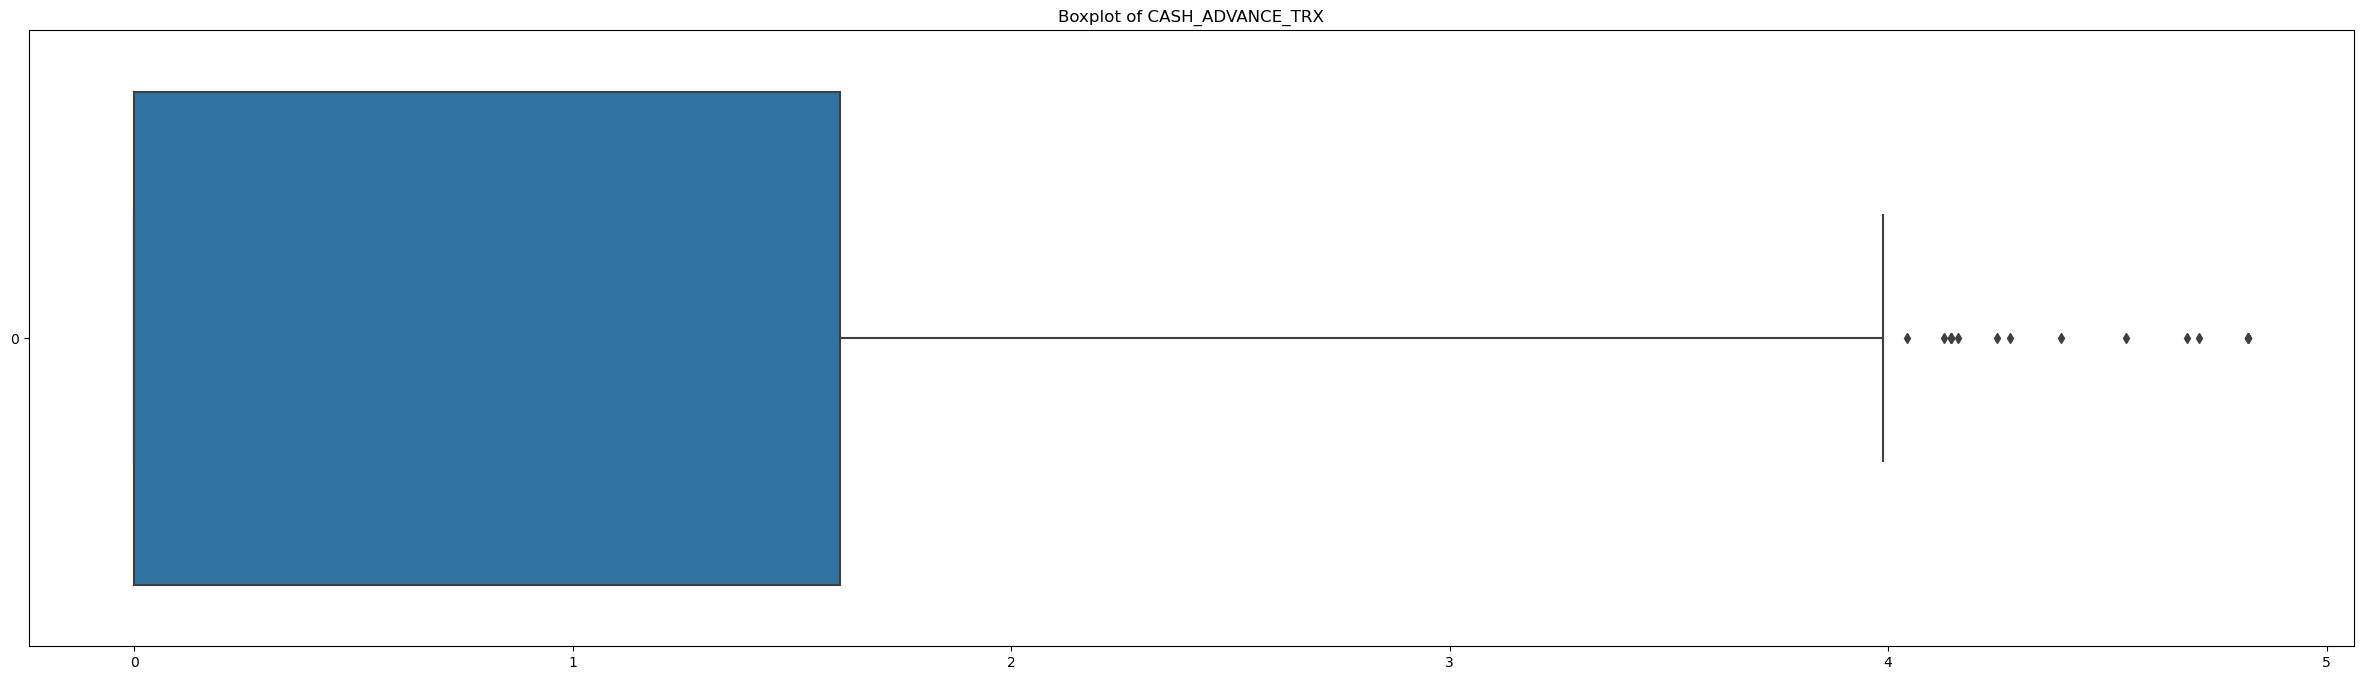

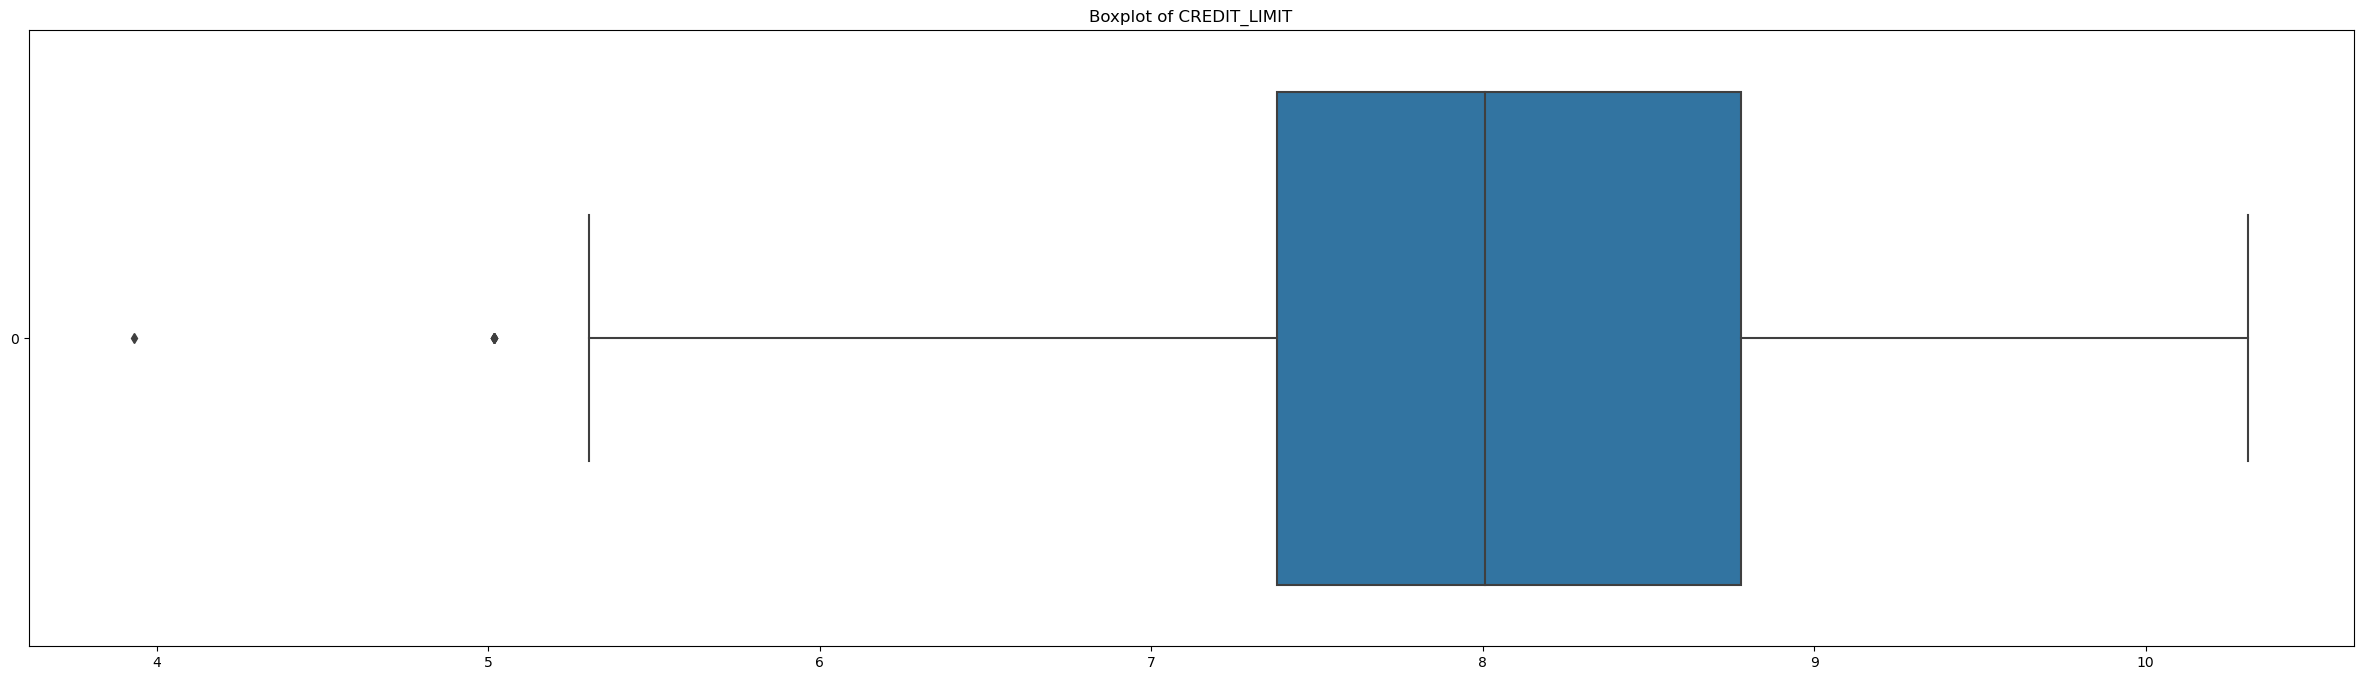

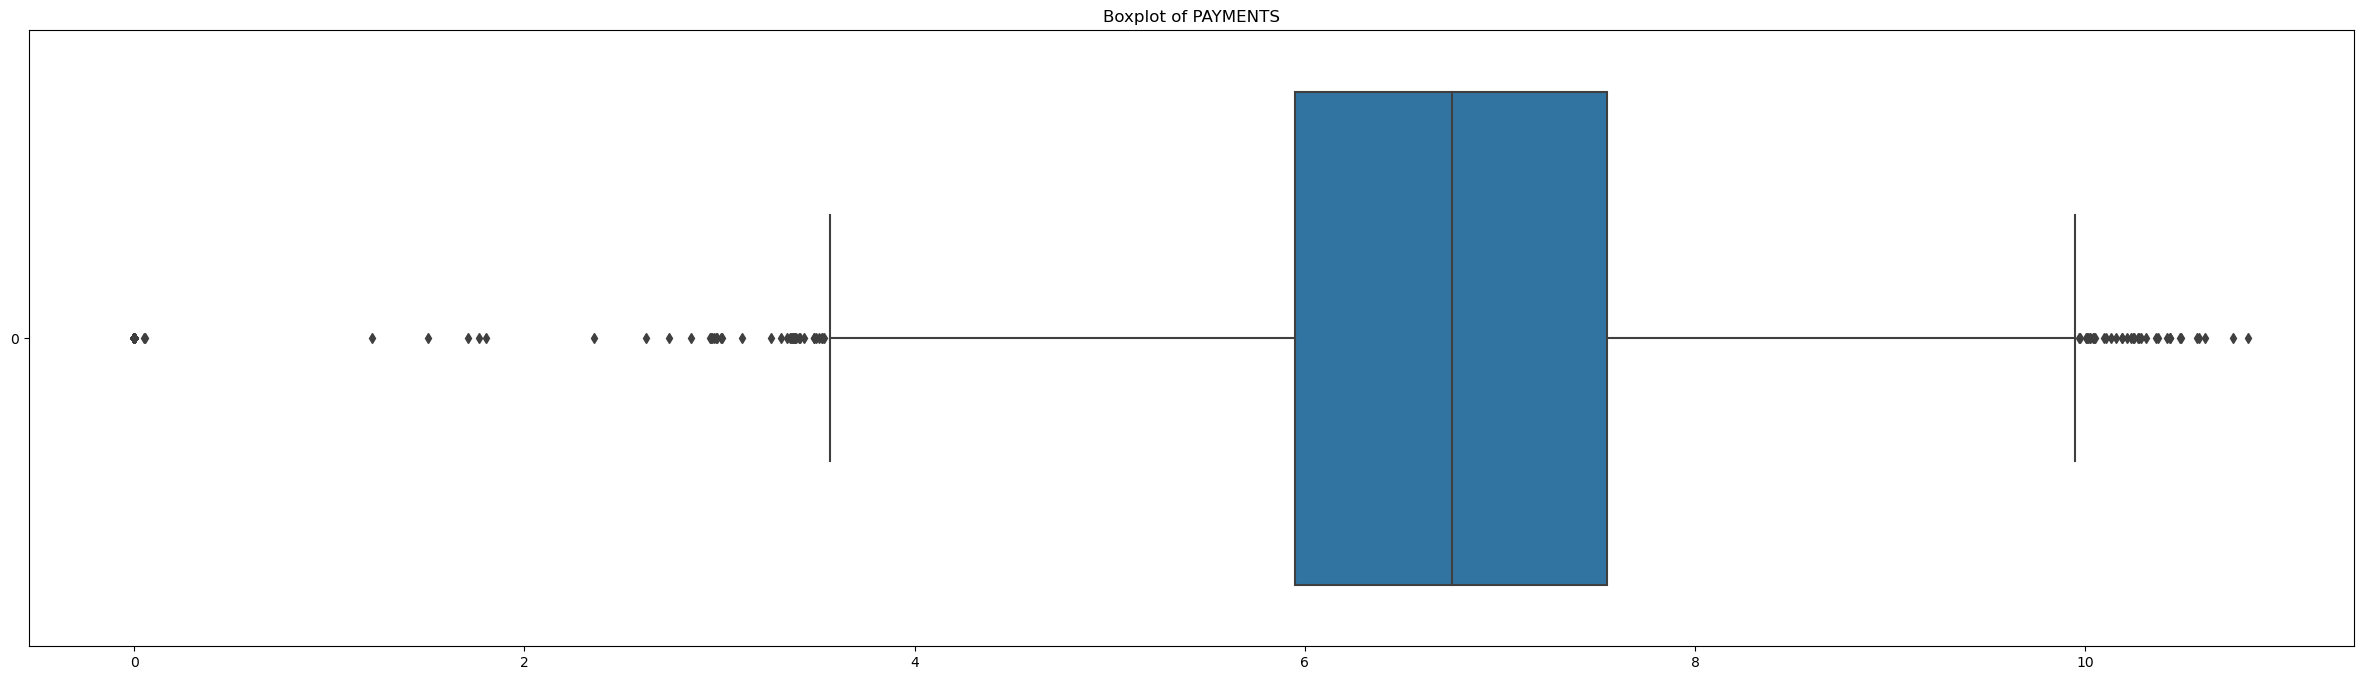

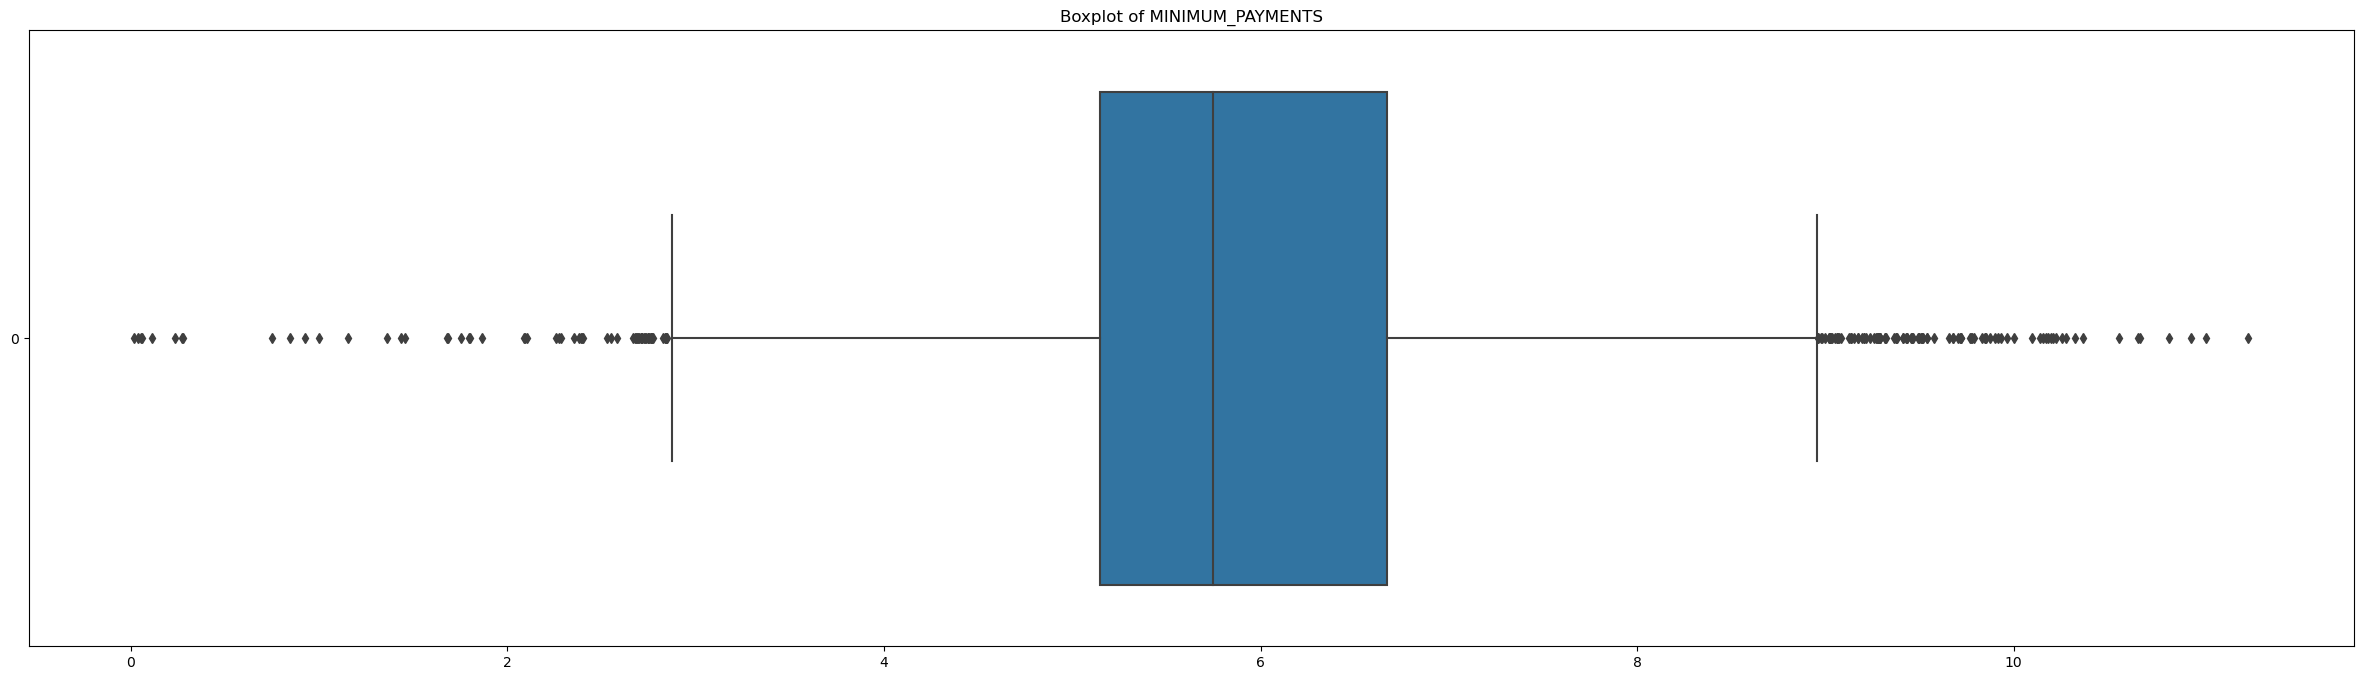

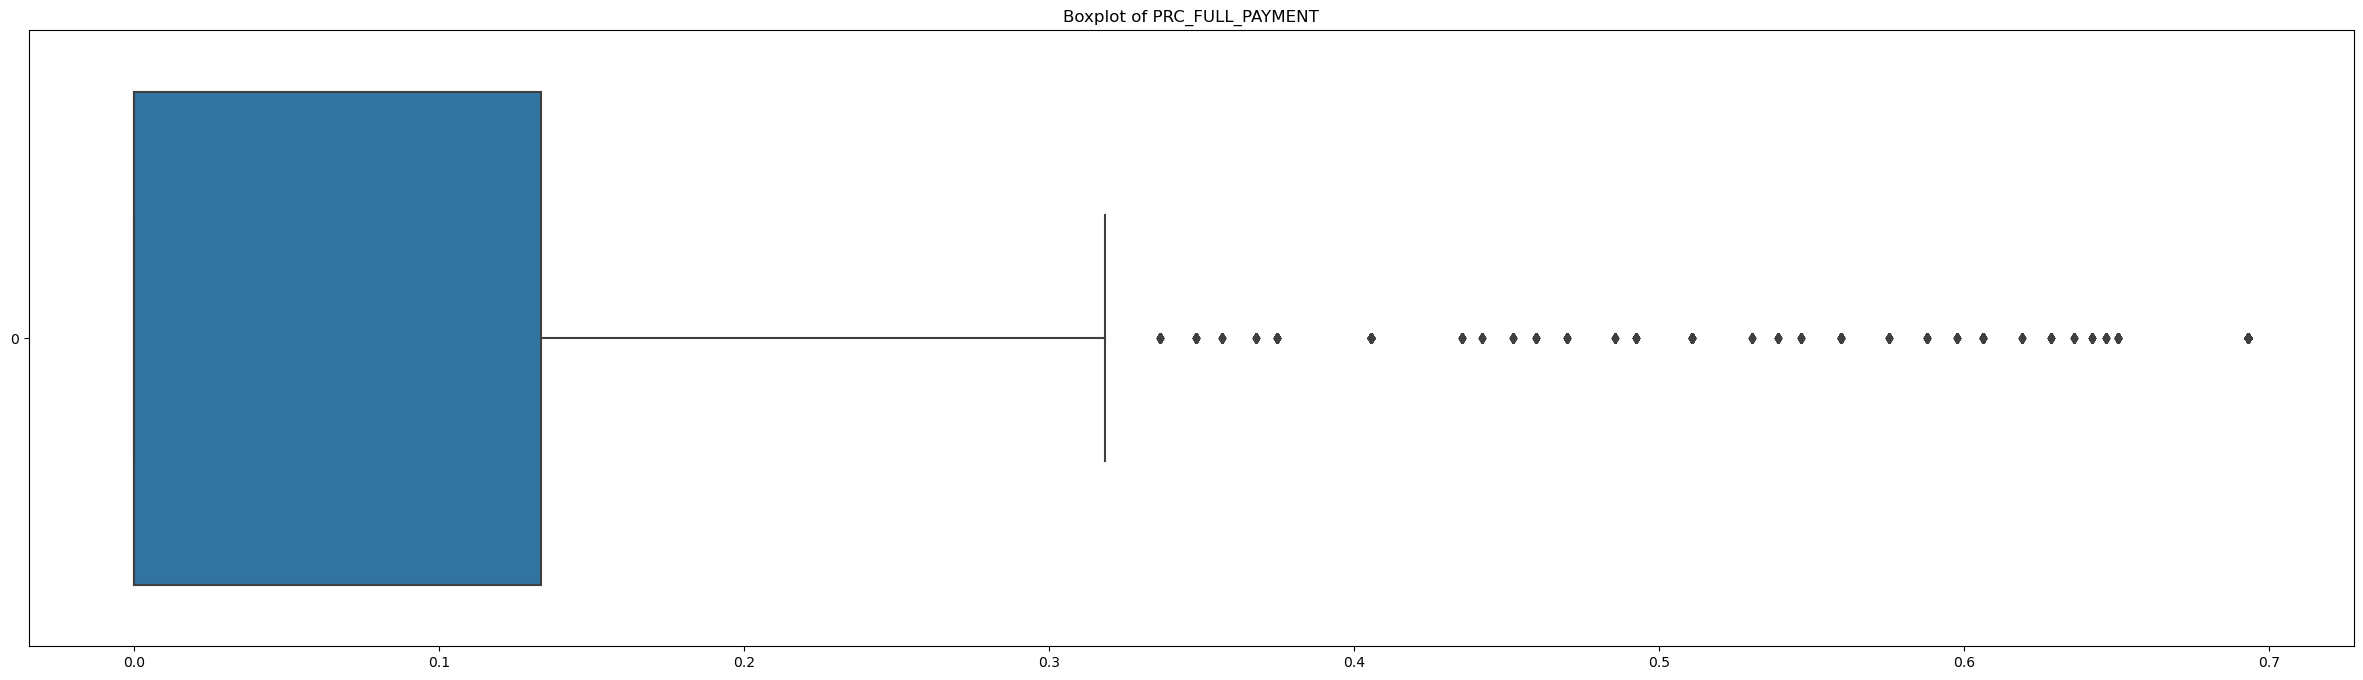

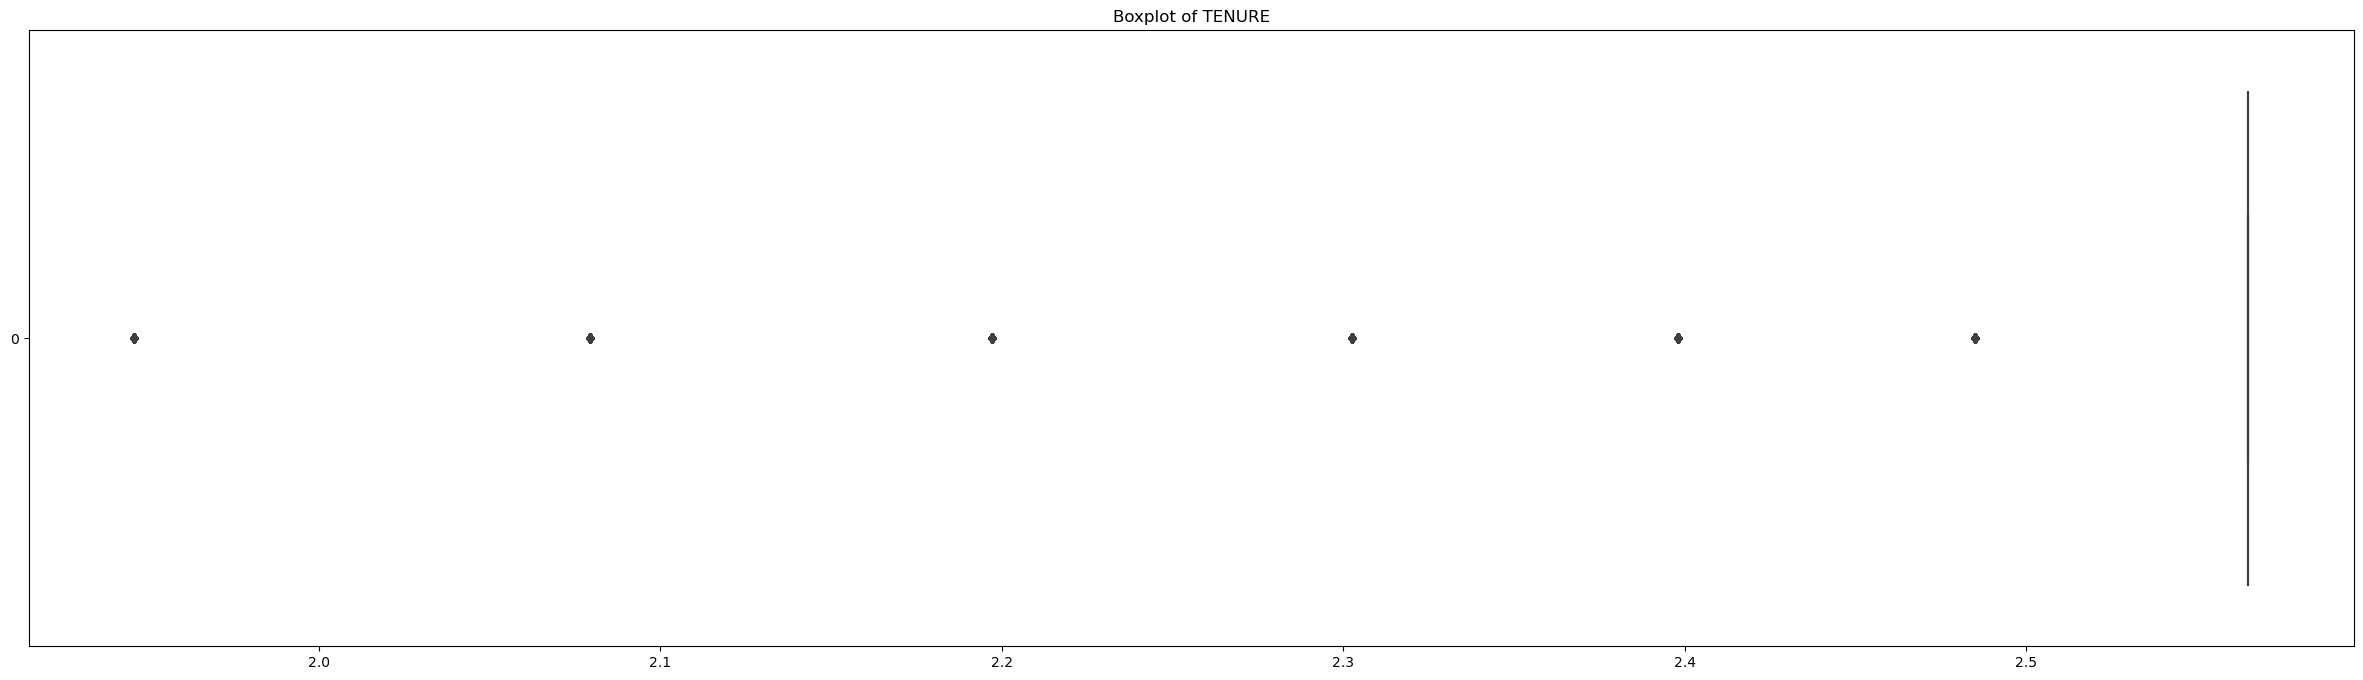

In [13]:
for column in df.columns:
    plt.figure(figsize = (30,8))
    sns.boxplot(df[column], orient='h')
    plt.title("Boxplot of {}".format(column), fontsize=12) 
    plt.show()

Lets drop any outliers more than 3&#x03C3; from the mean.

In [14]:
threshold = 3

def remove_outliers(col):
    z_scores = (col - col.mean()) / col.std()
    return col[abs(z_scores) <= threshold]

df = df.apply(remove_outliers)
df = df.dropna()

print(df)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
4     6.707735           0.693147   2.833213          2.833213   
5     7.501540           0.693147   7.196147          0.000000   
...        ...                ...        ...               ...   
8876  4.806432           0.559616   5.956511          5.956511   
8877  4.027986           0.628609   5.101755          0.000000   
8878  6.768870           0.559616   0.000000          0.000000   
8879  4.932637           0.693147   6.091310          0.000000   
8880  5.805346           0.559616   4.409155          4.409155   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
0                   4.568506      0.000000                    0.000000   
1                   0.000000      8.770896                 

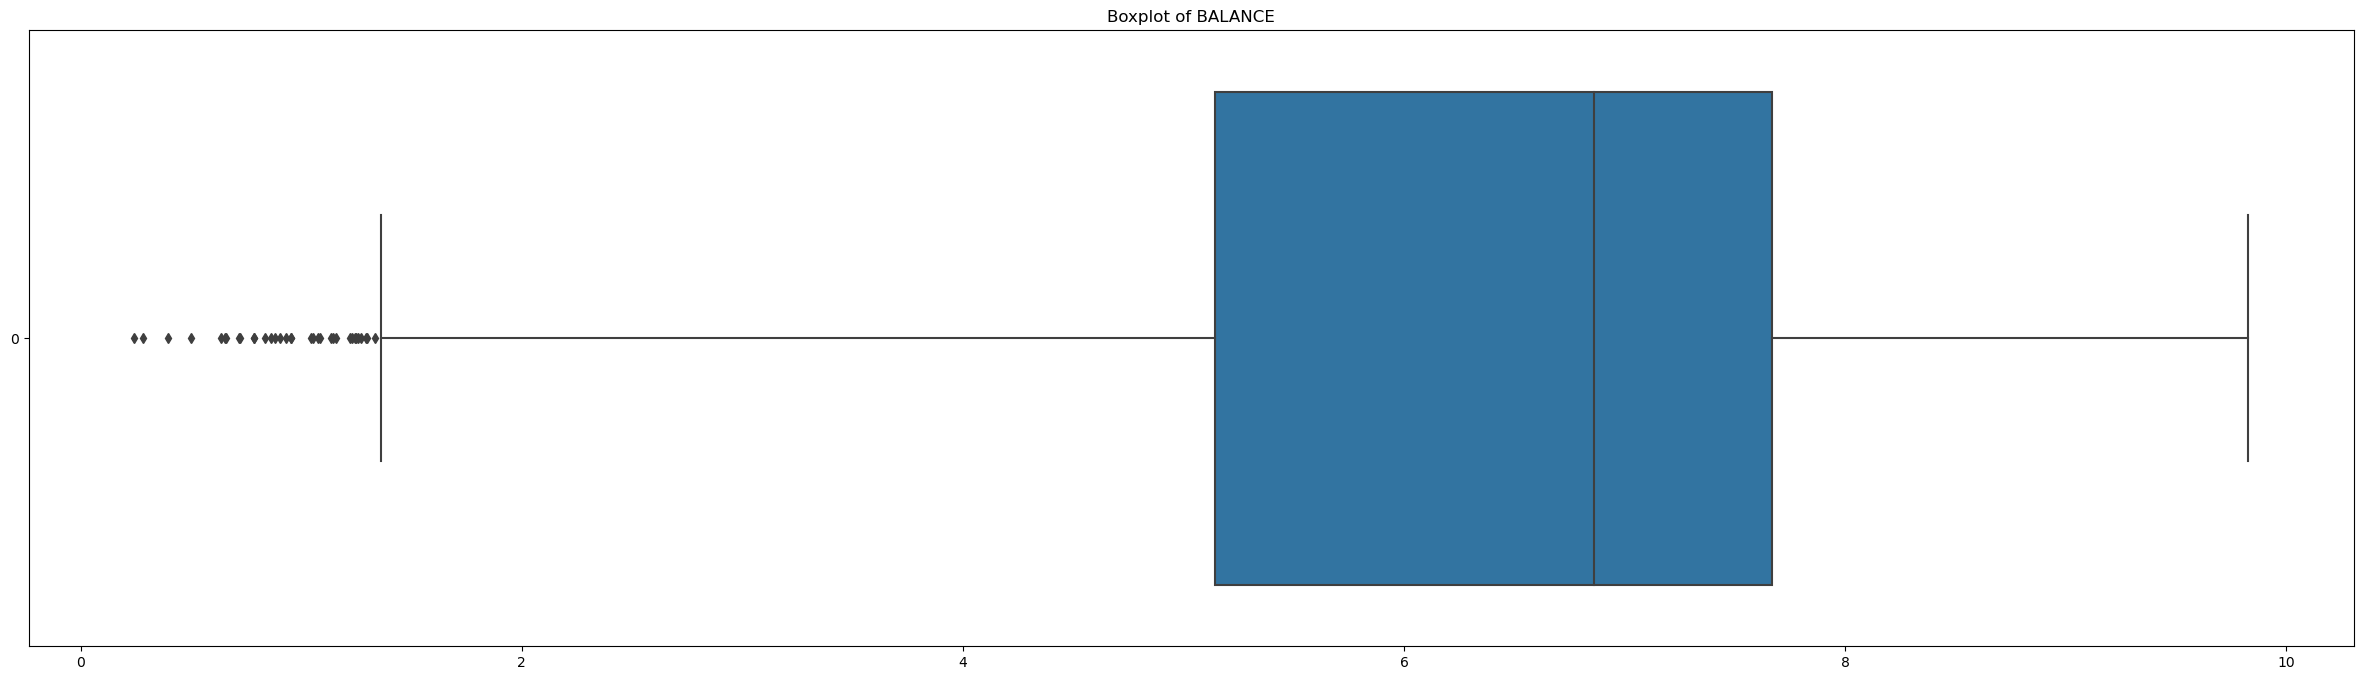

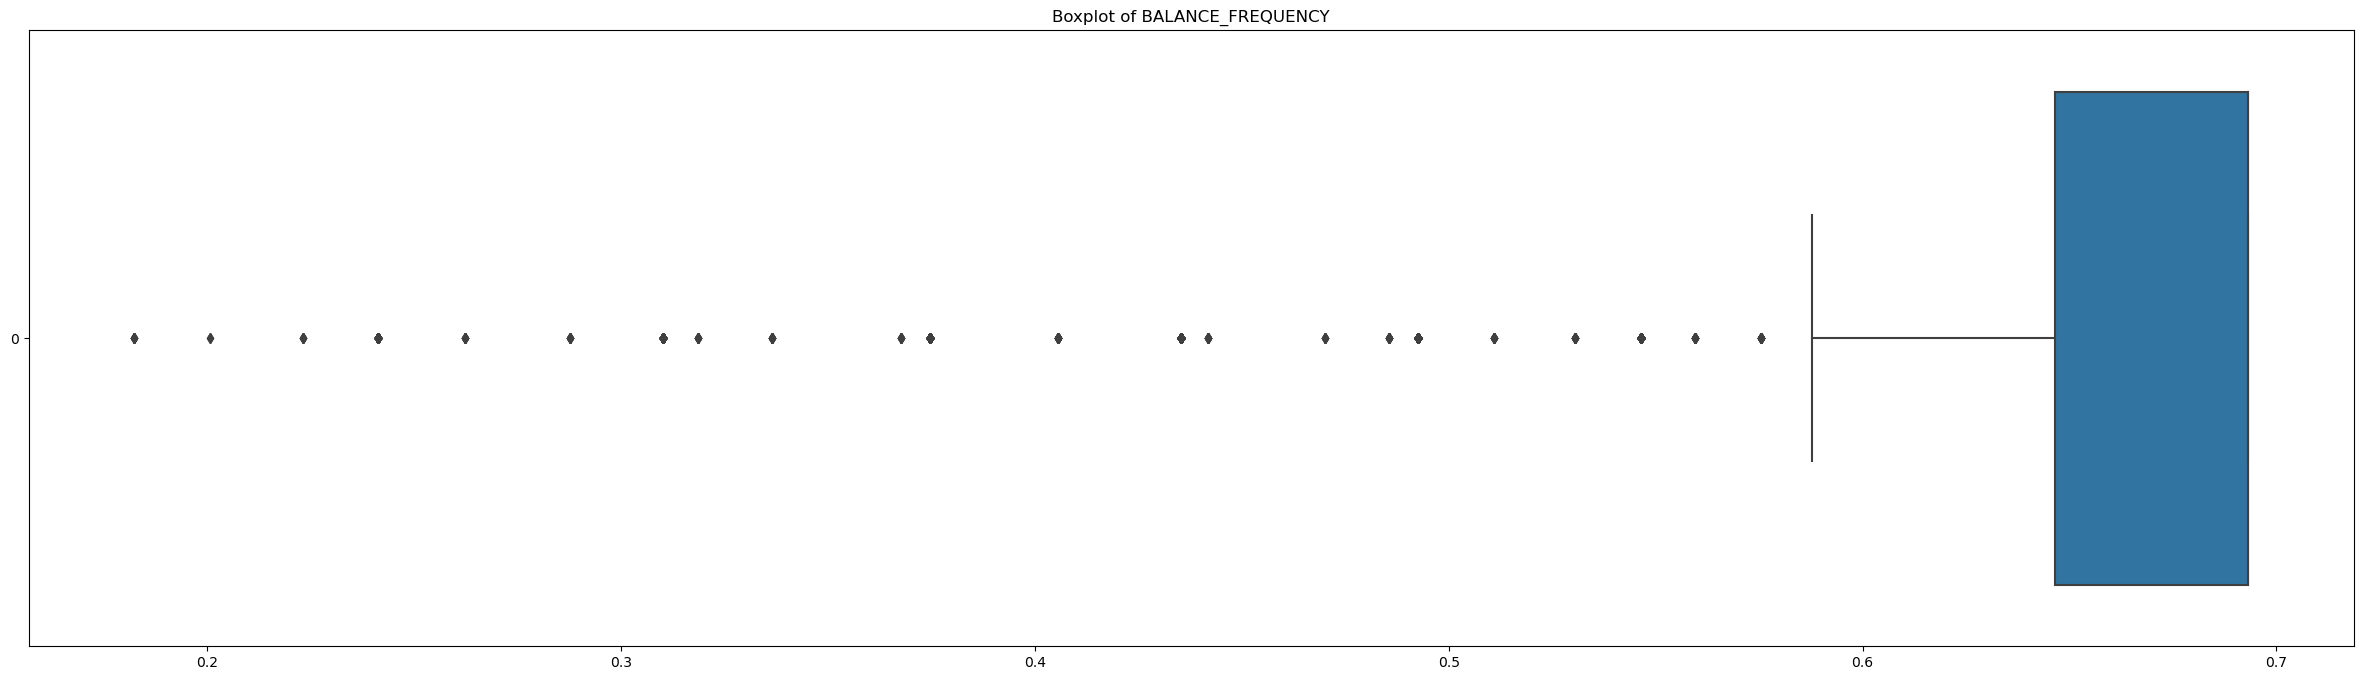

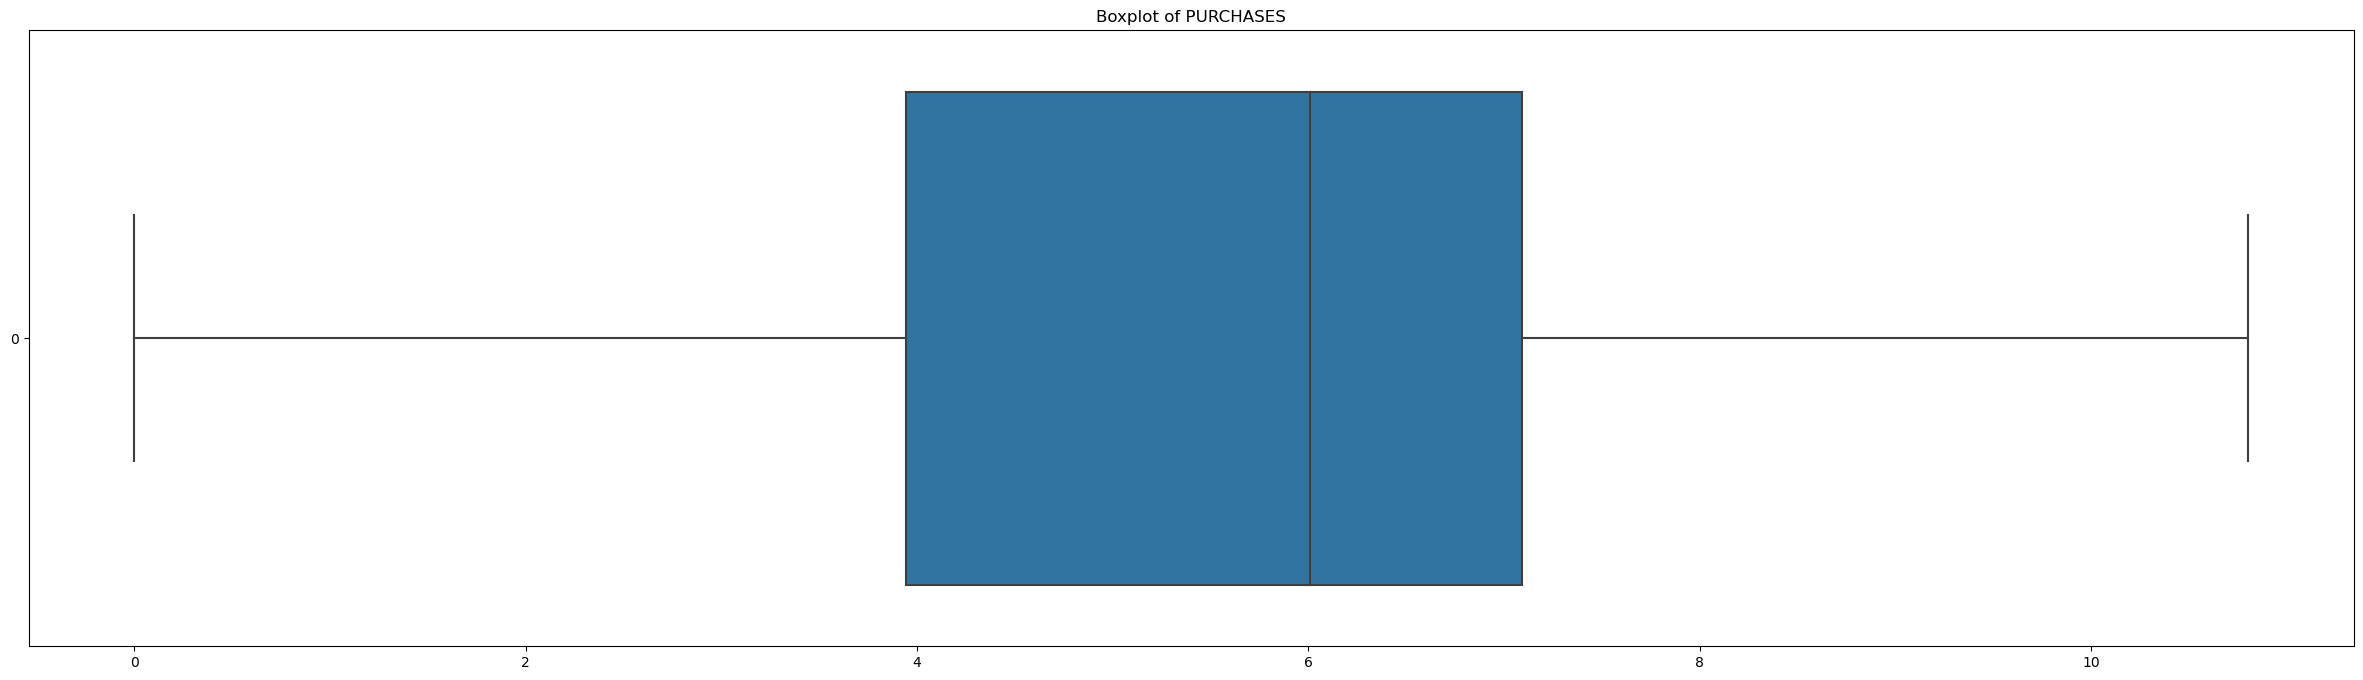

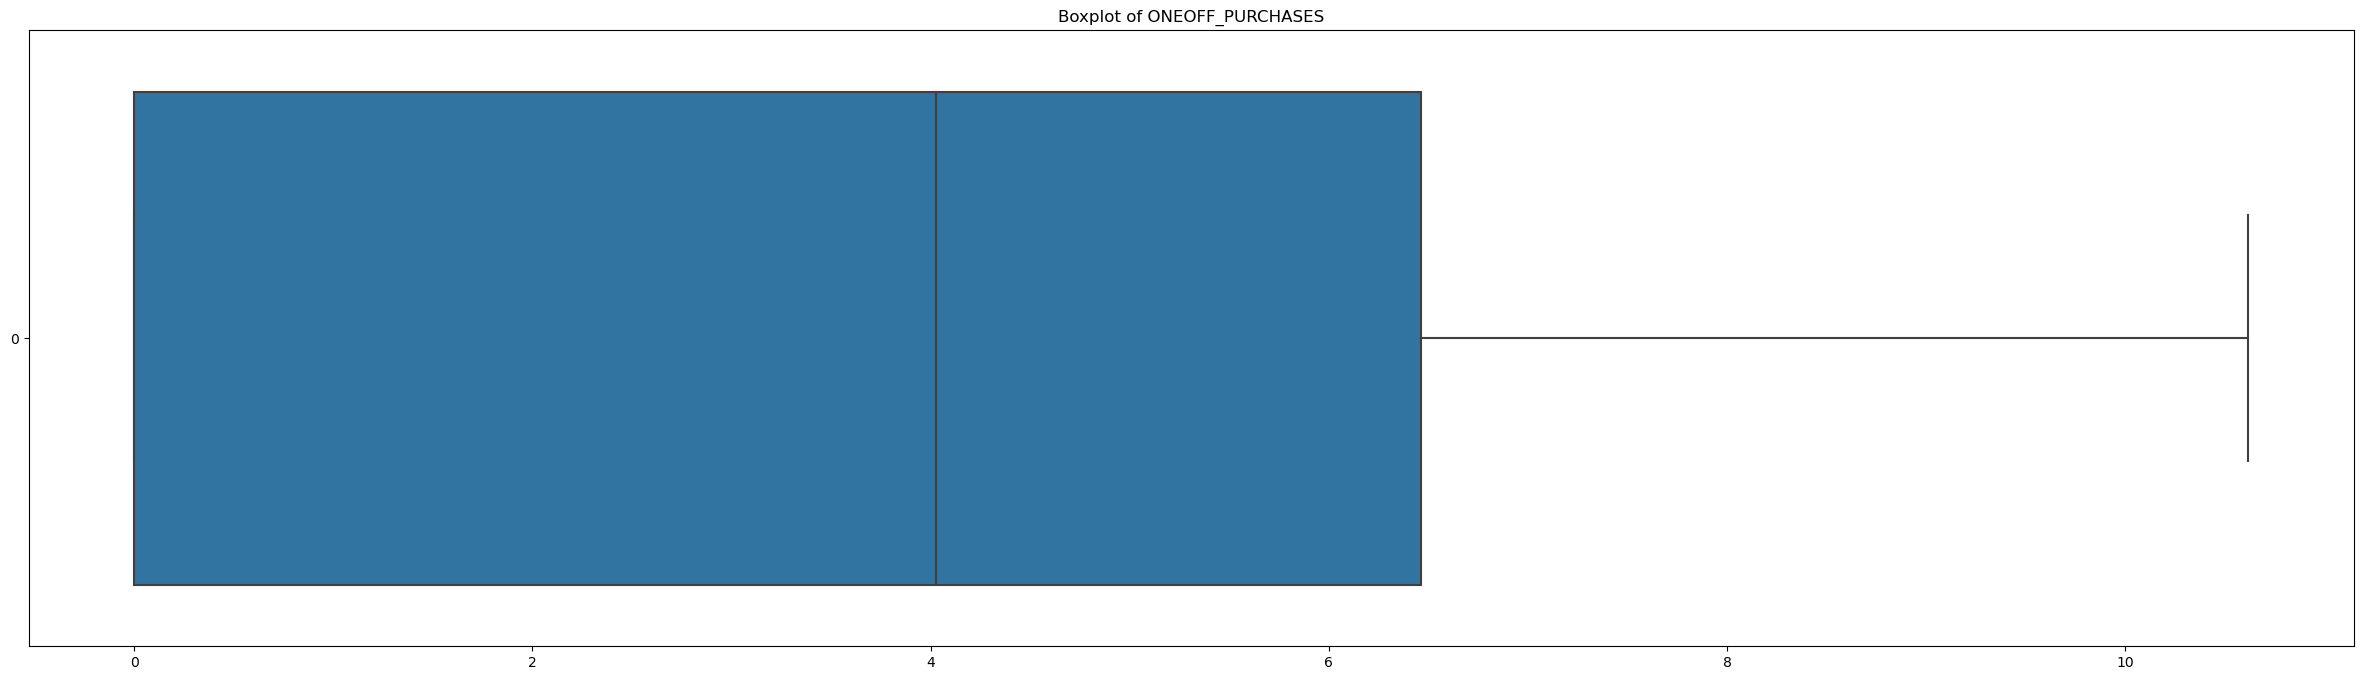

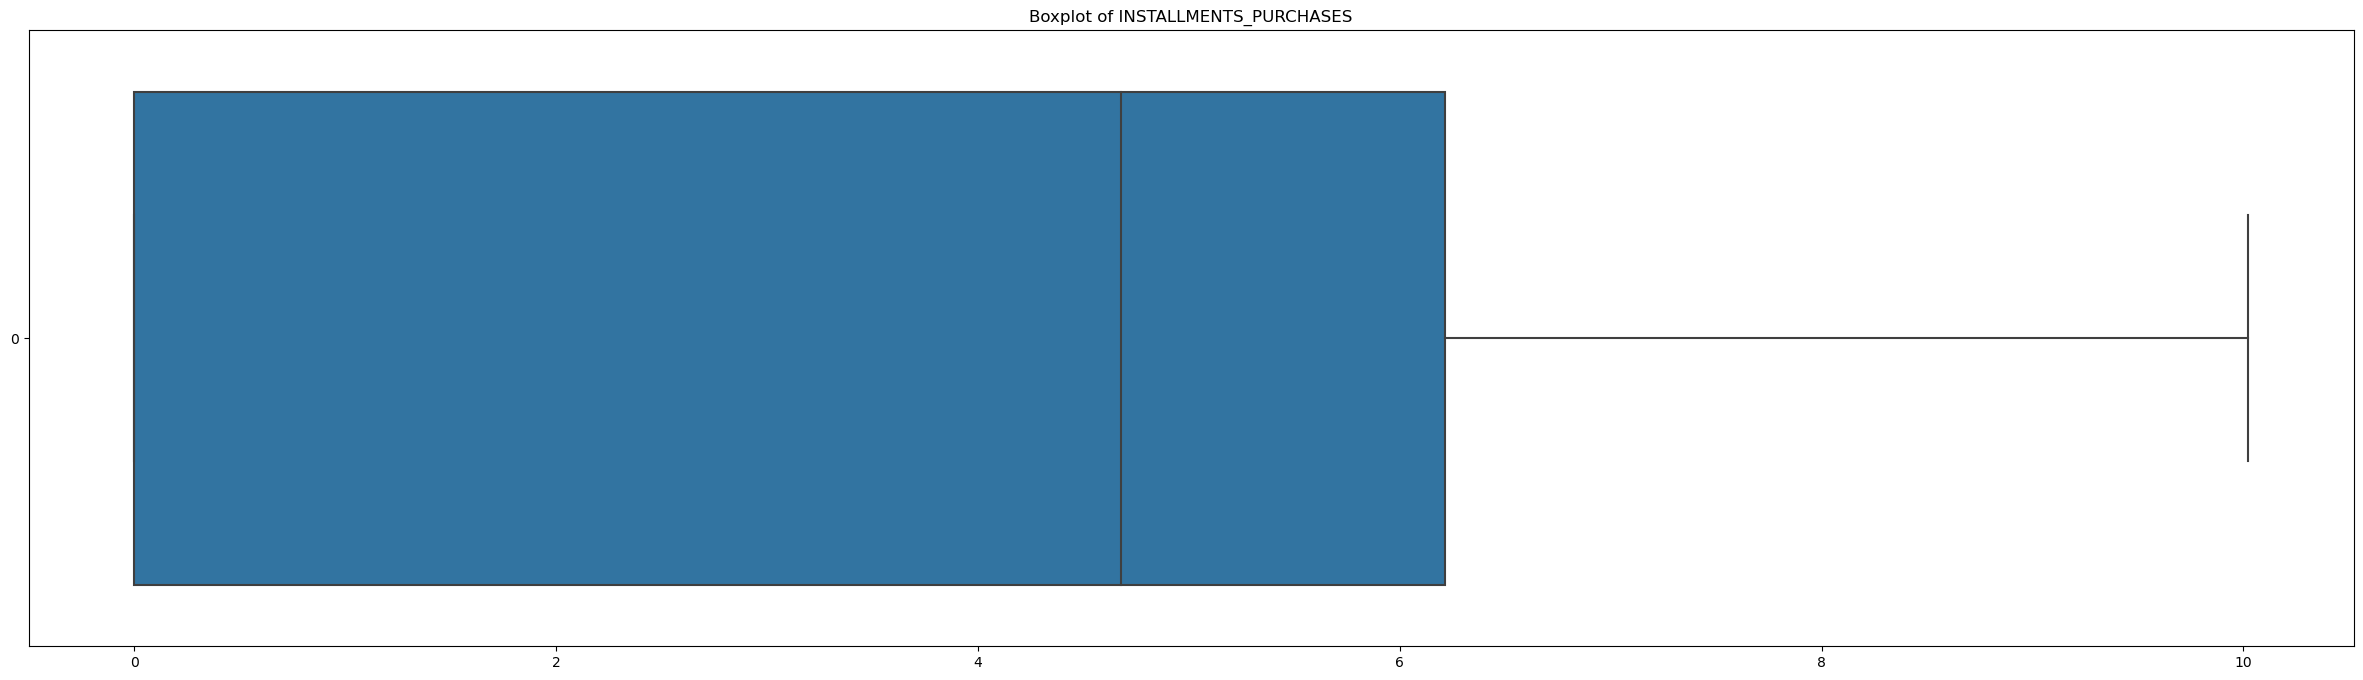

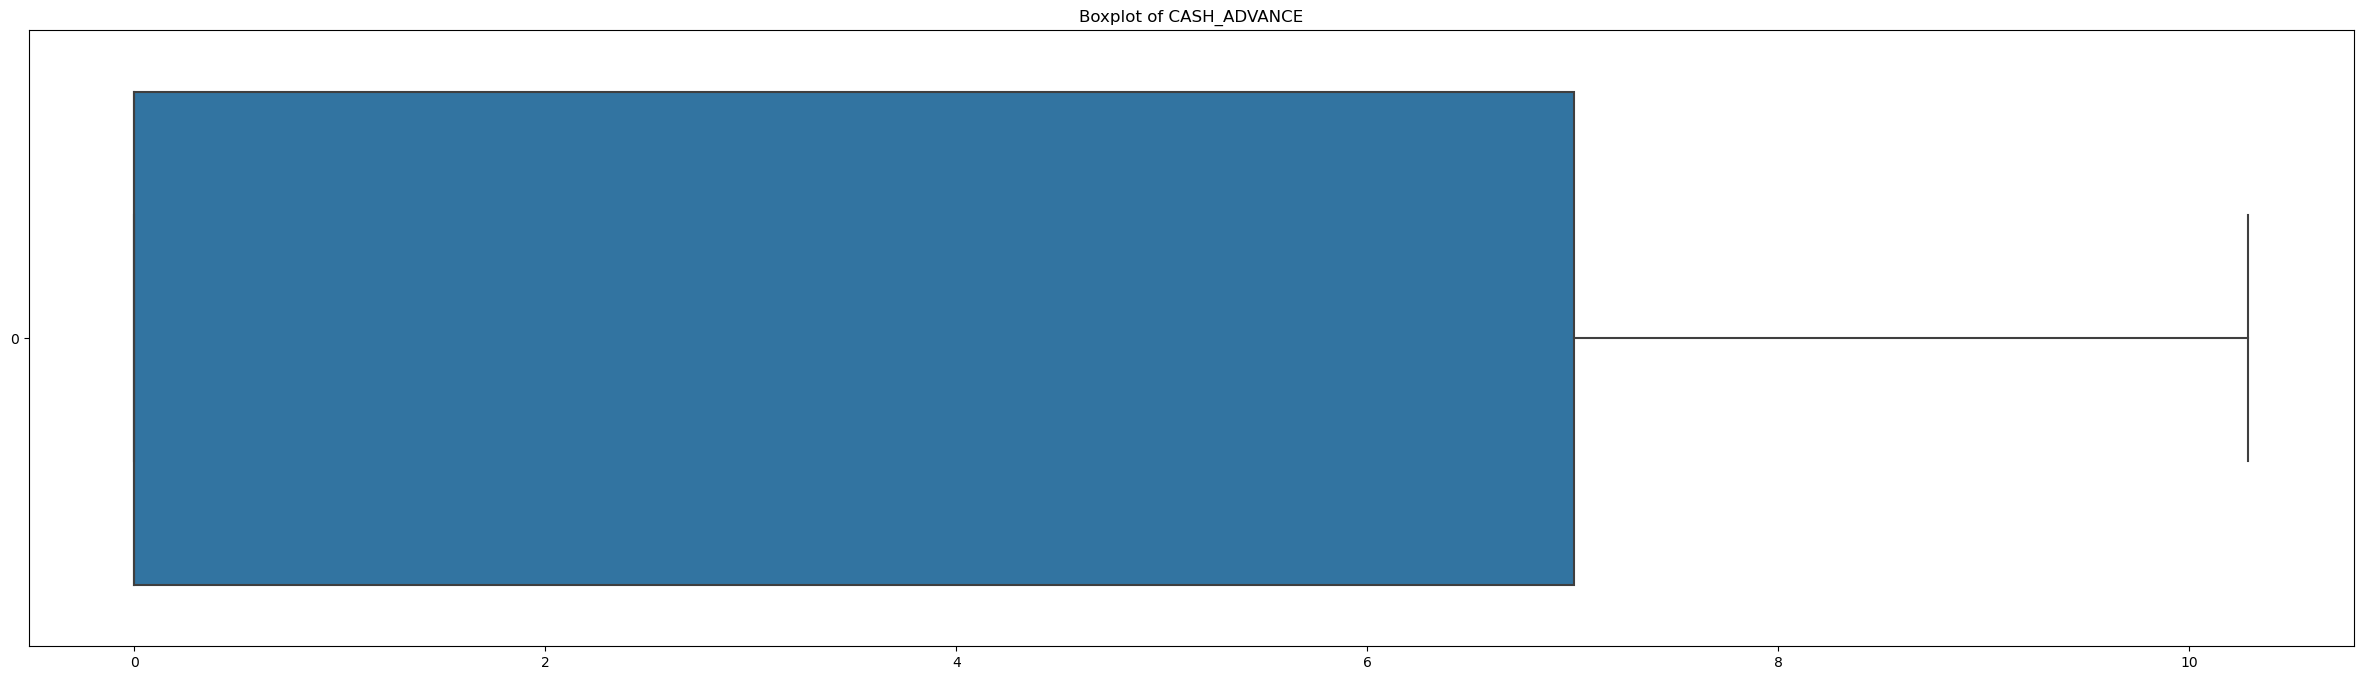

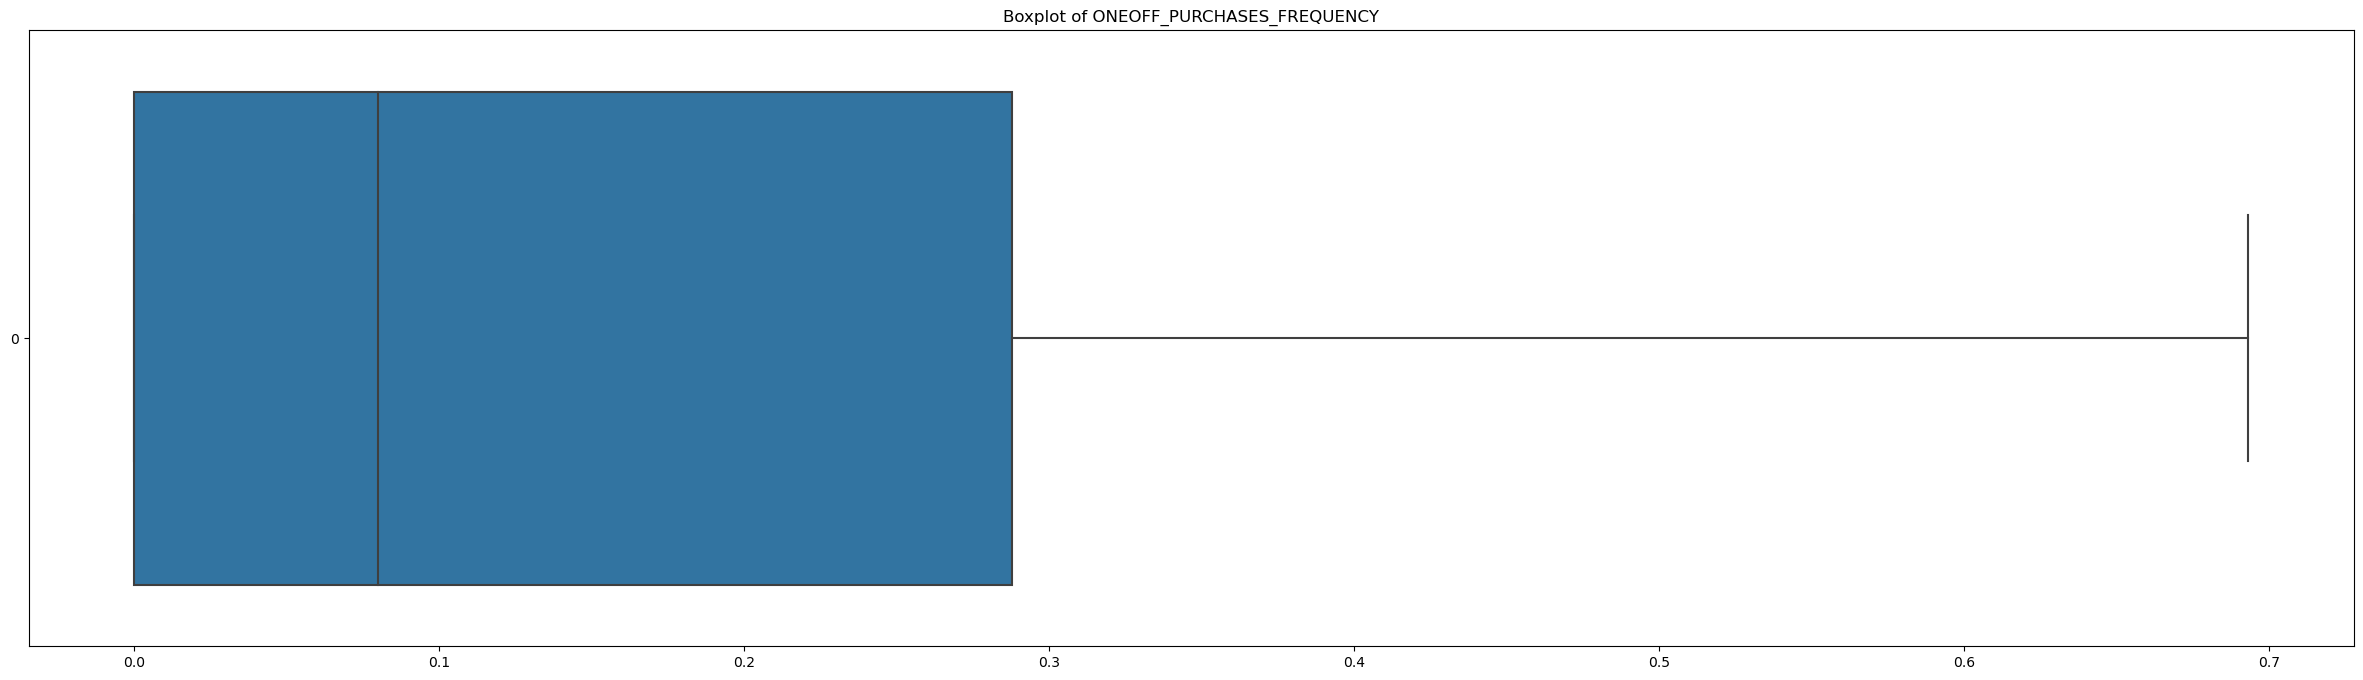

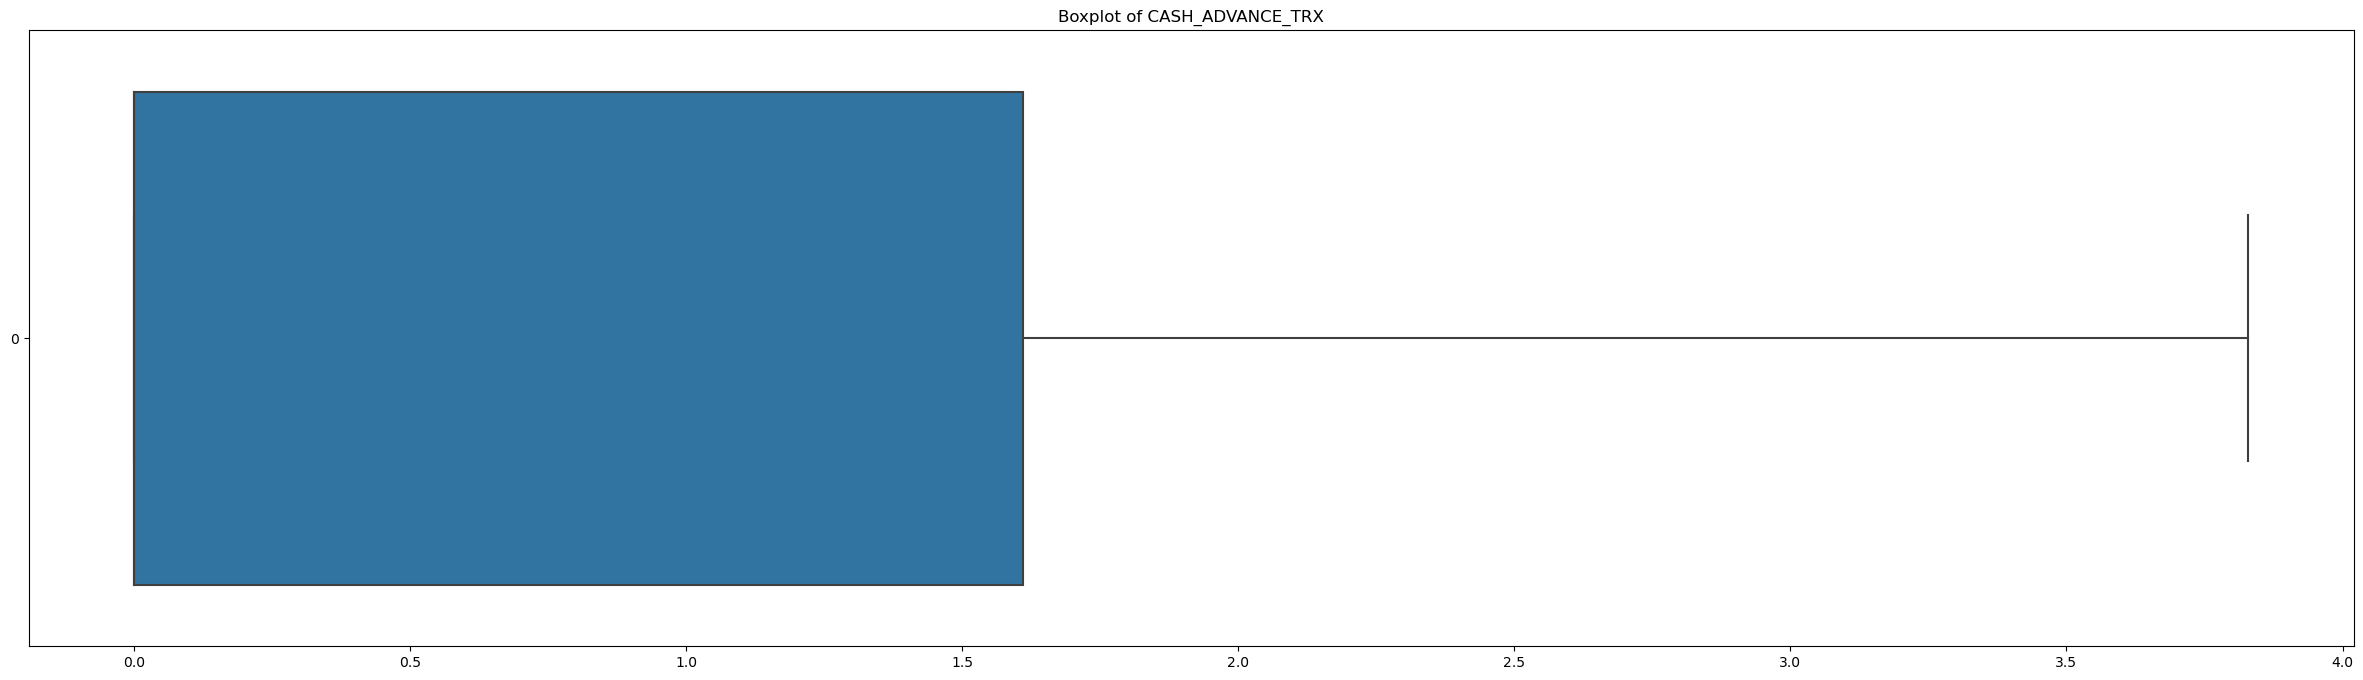

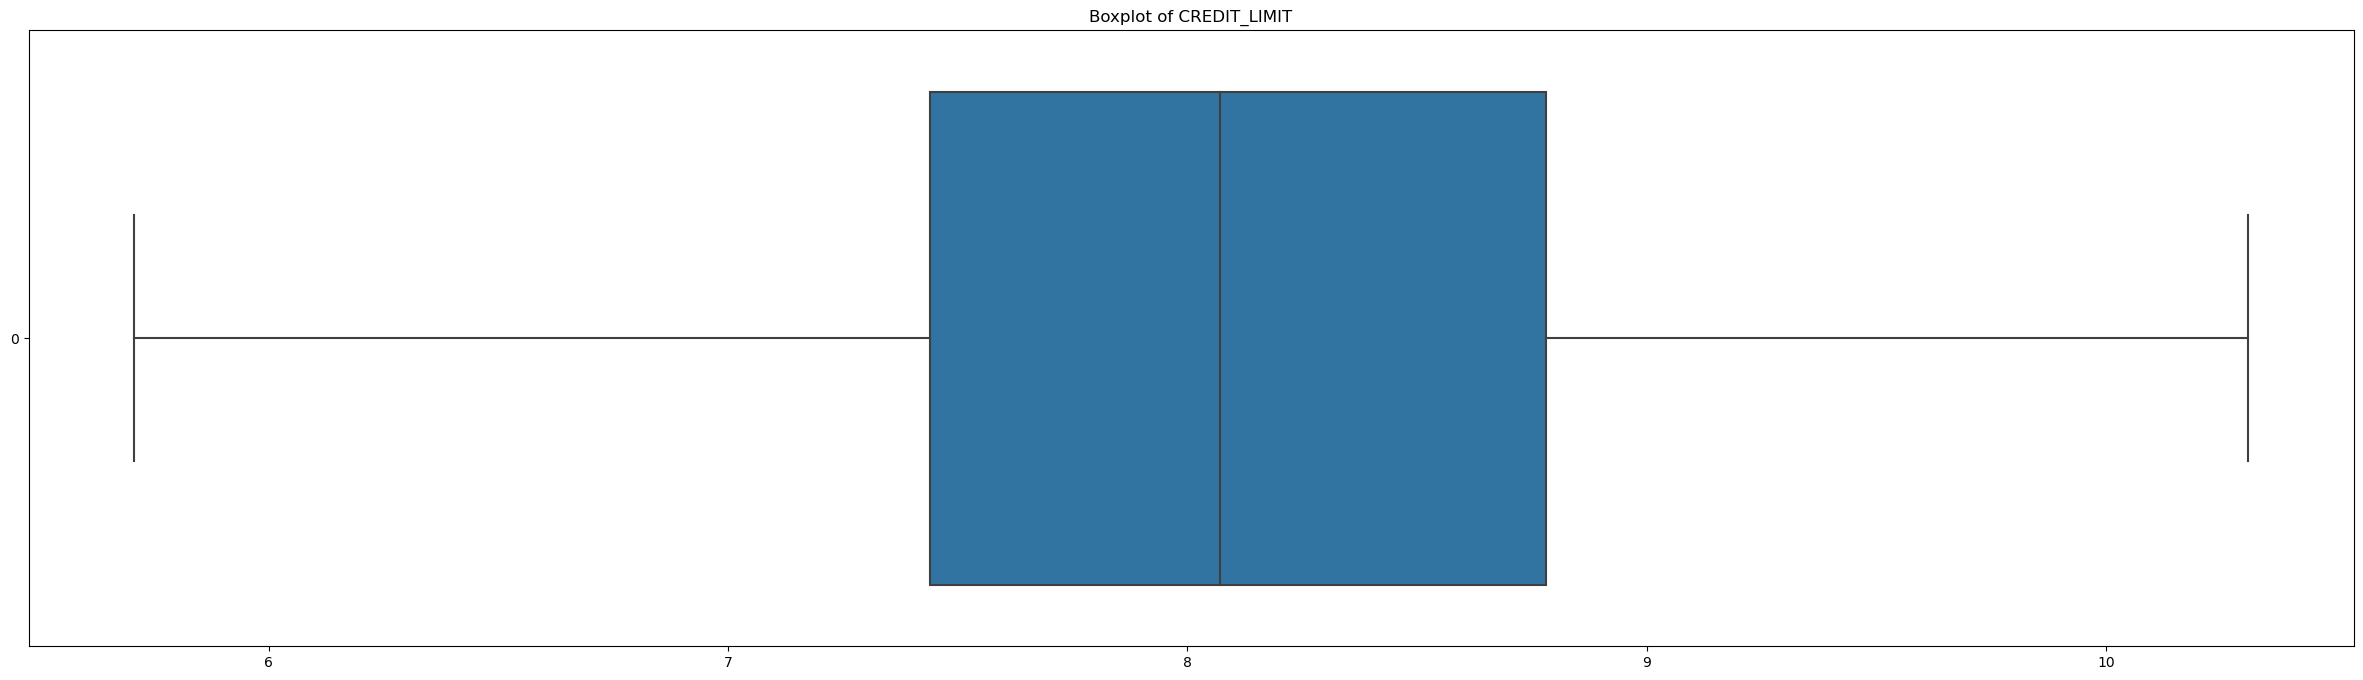

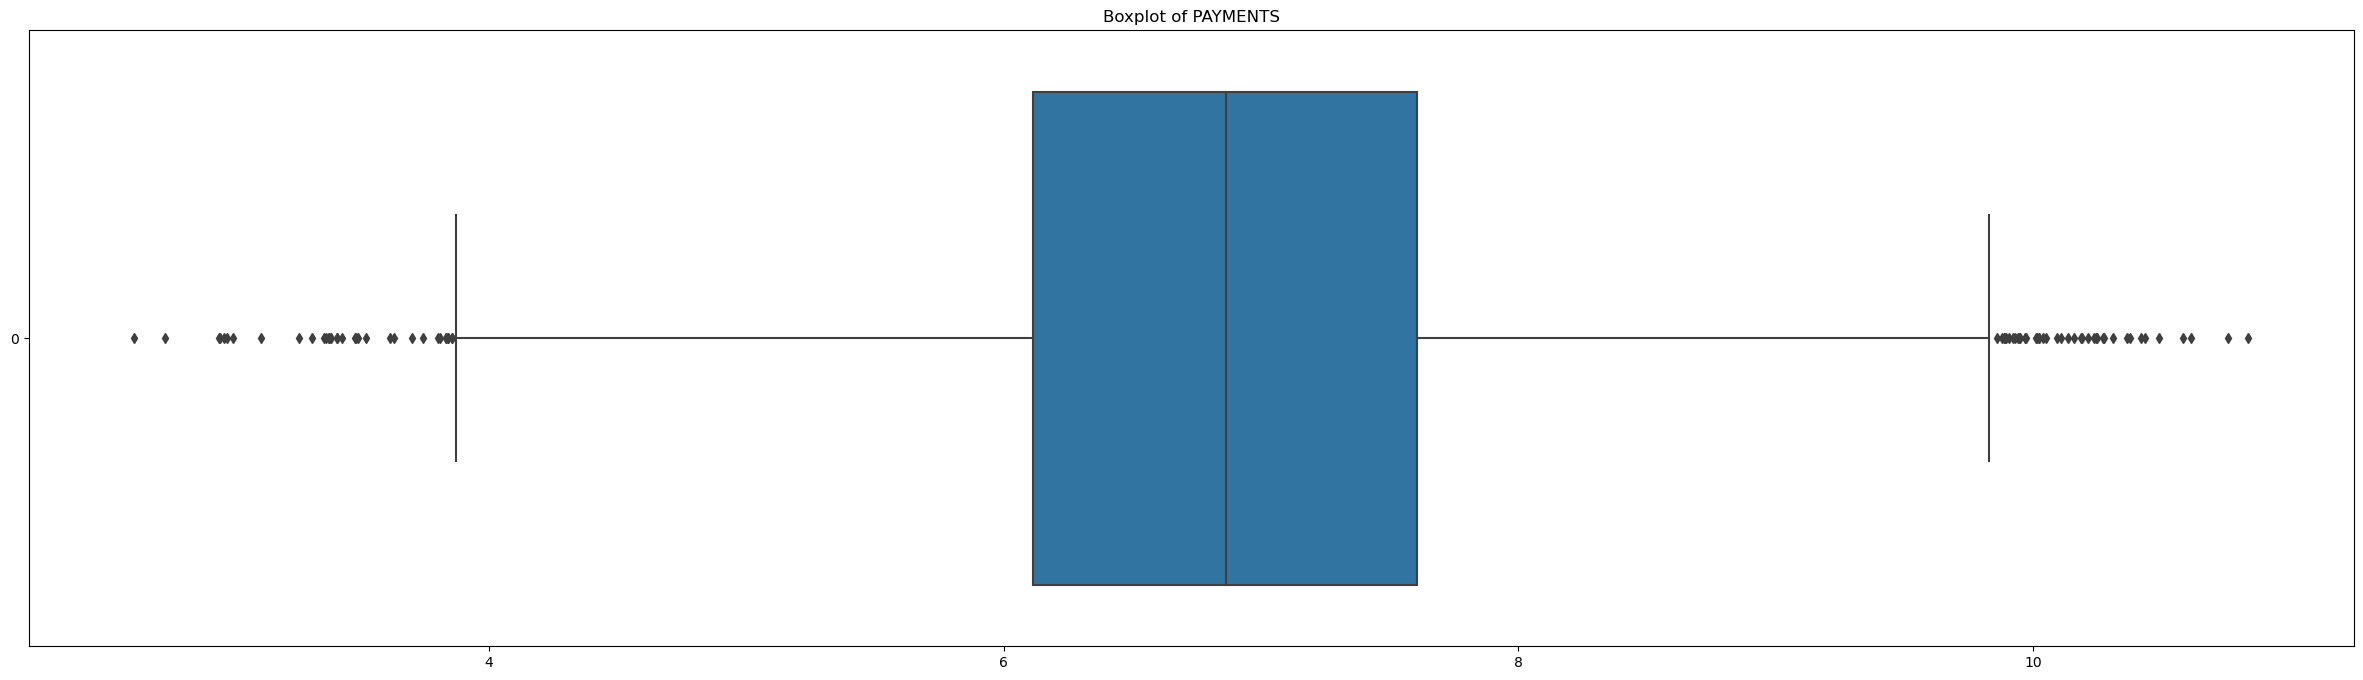

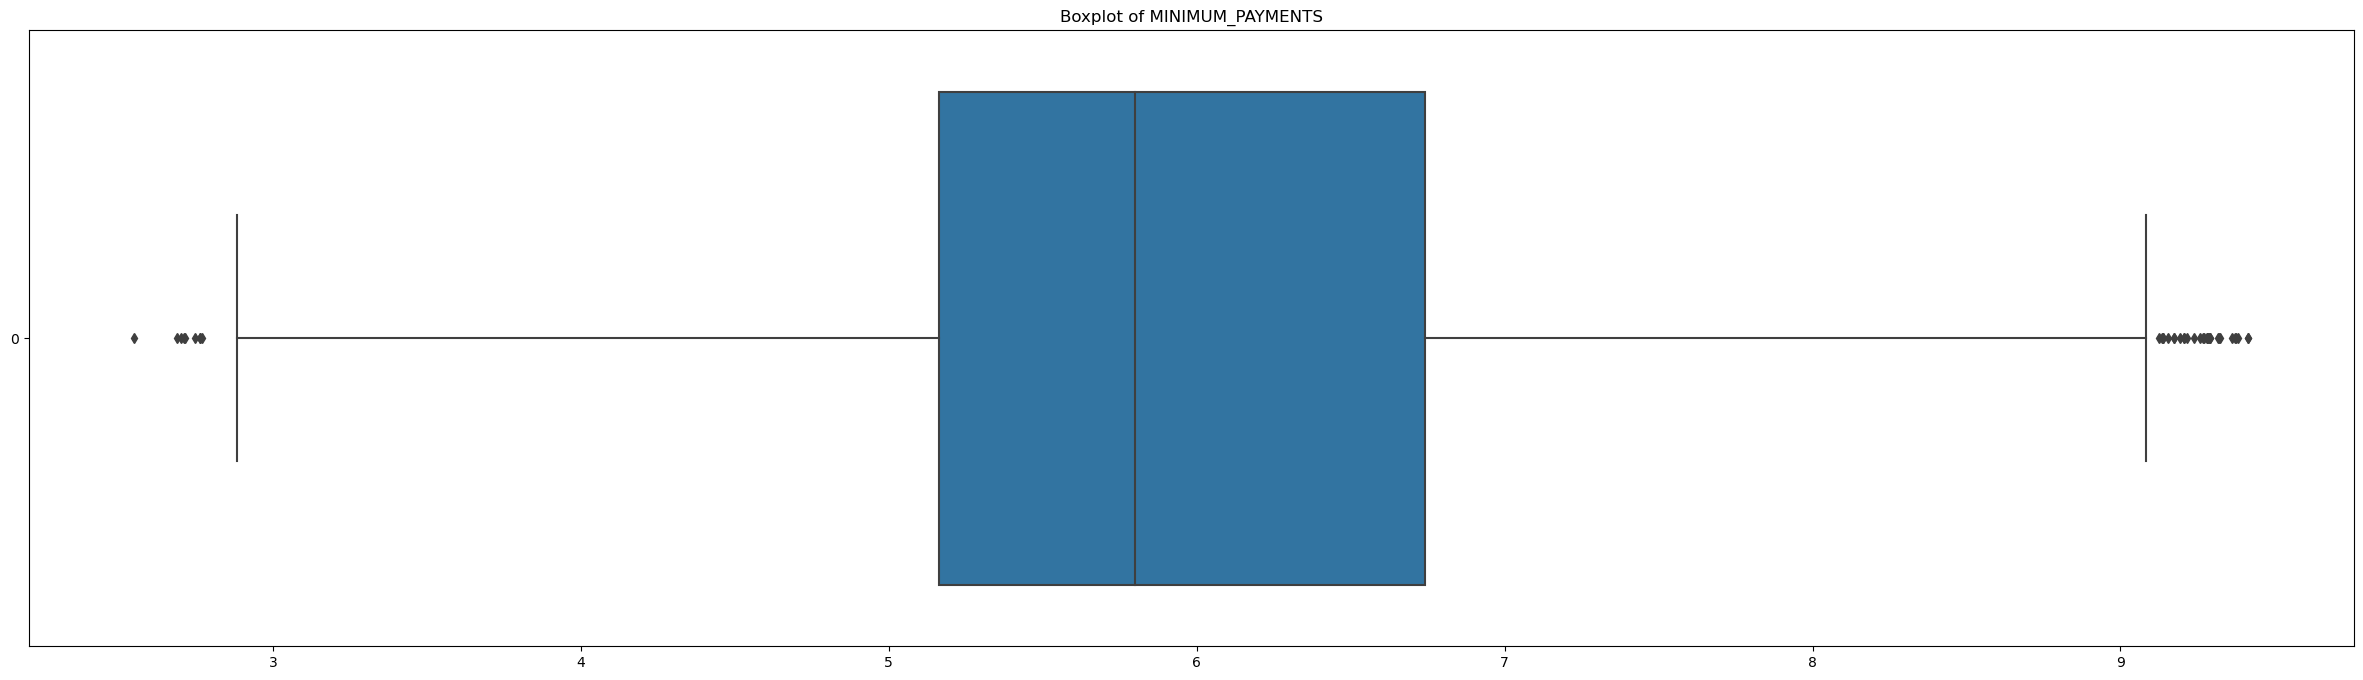

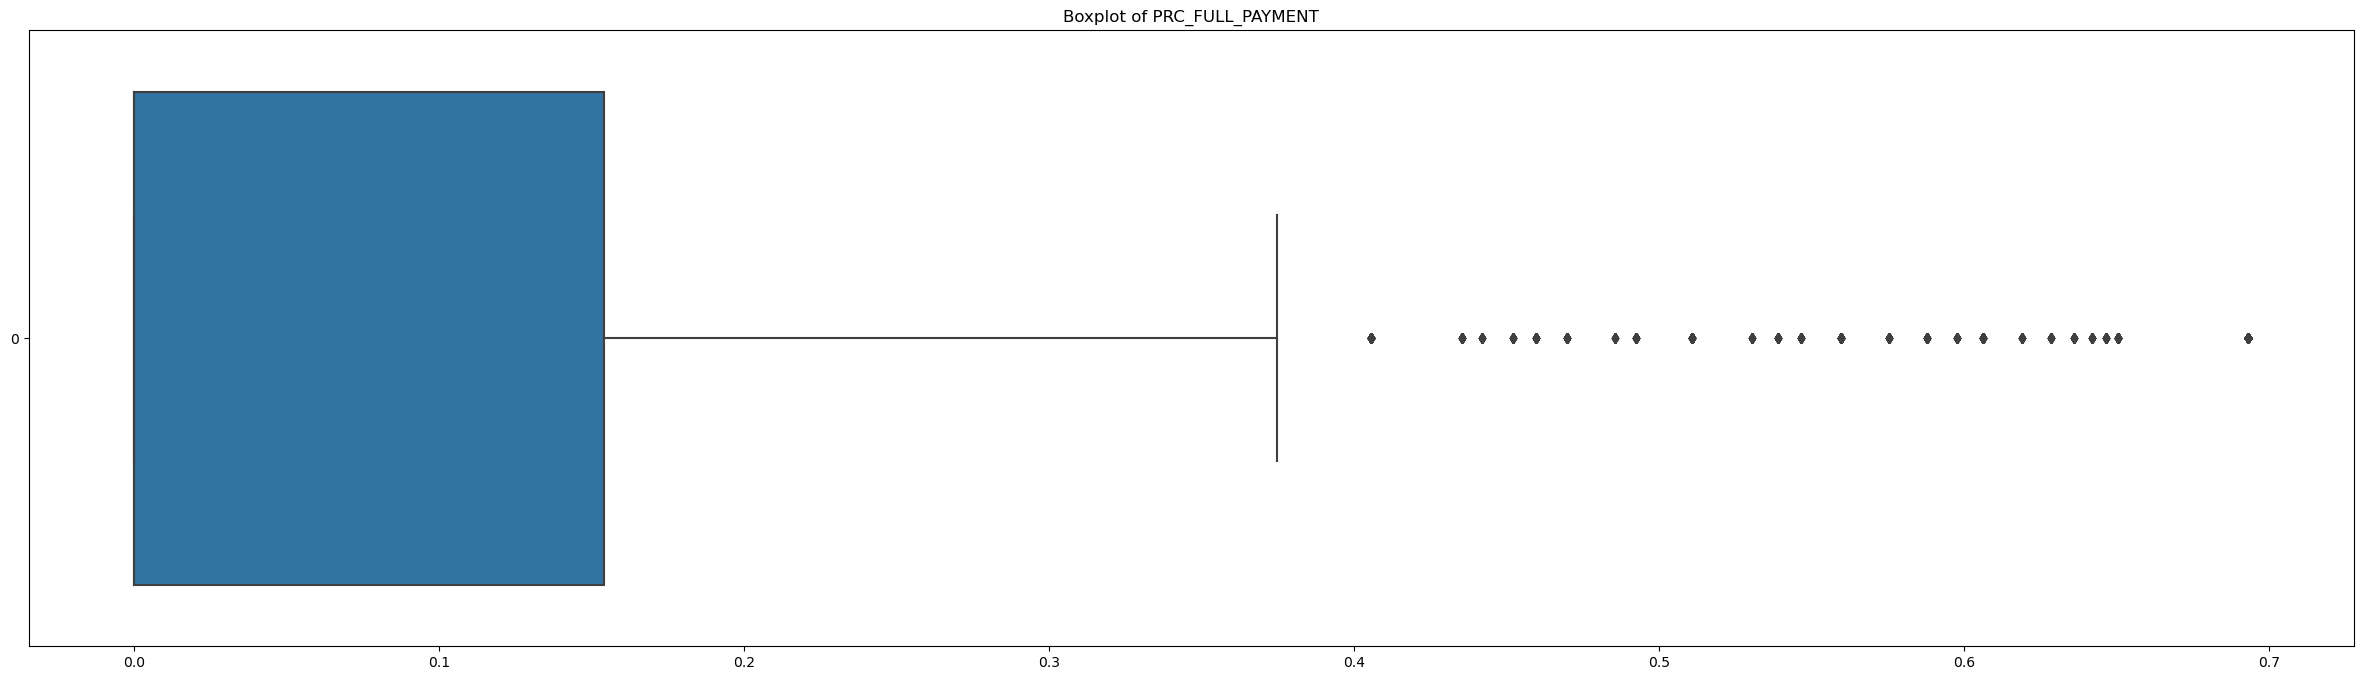

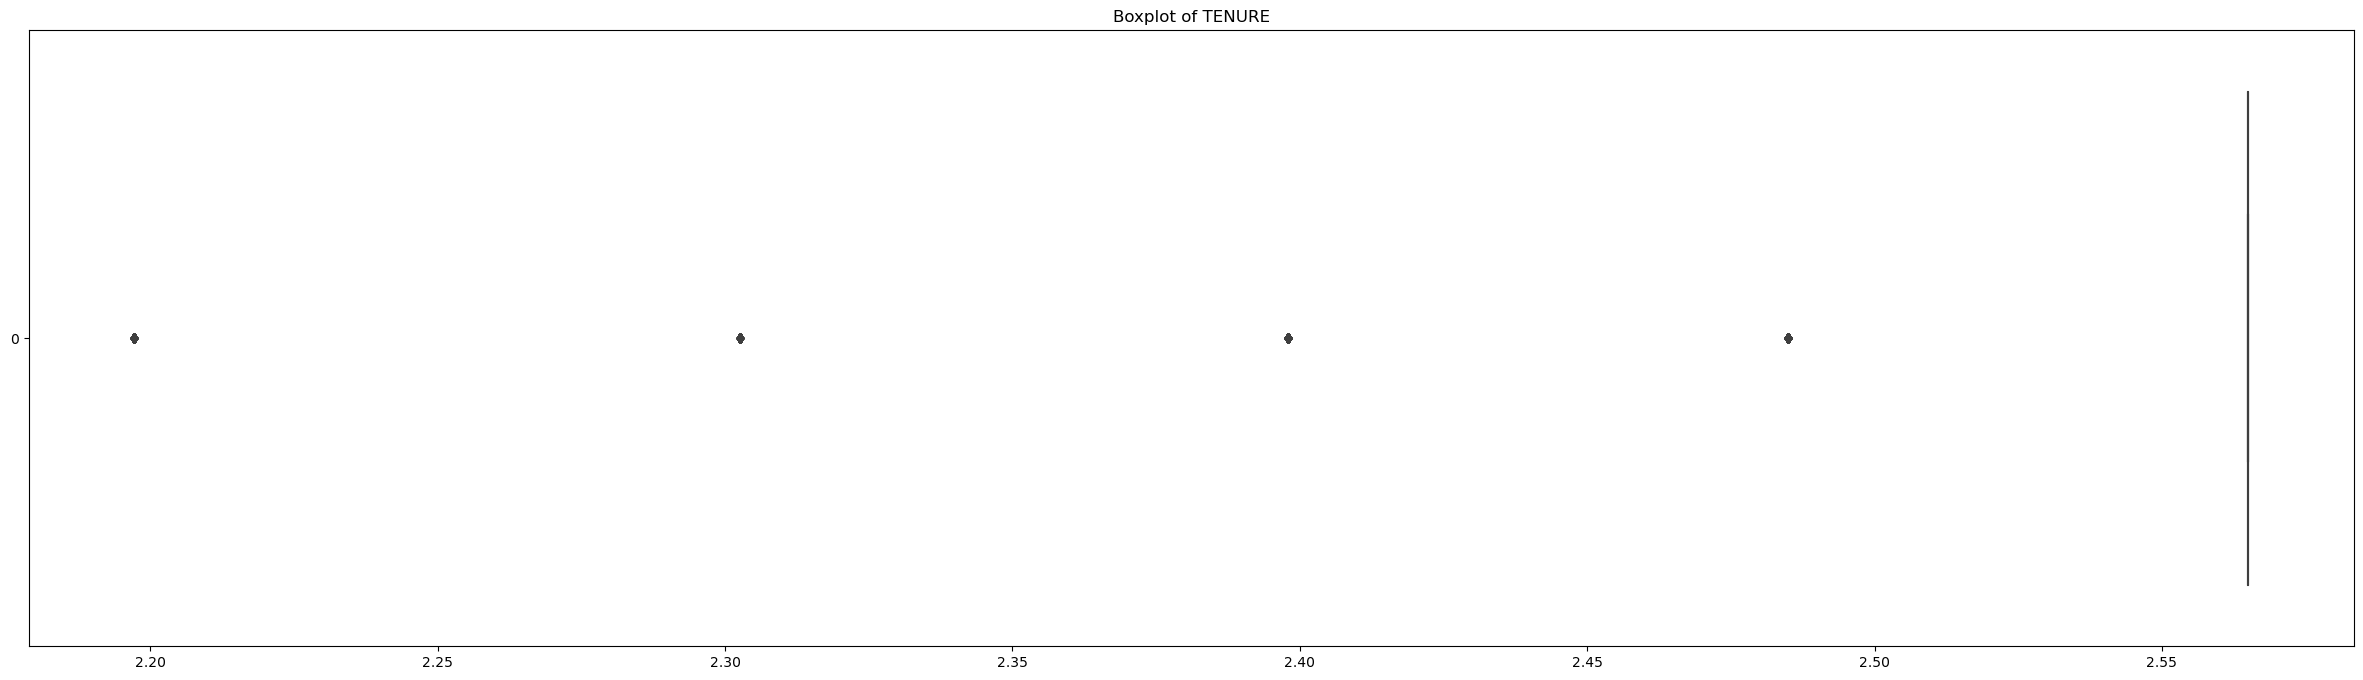

In [15]:
for column in df.columns:
    plt.figure(figsize = (30,8))
    sns.boxplot(df[column], orient='h')
    plt.title("Boxplot of {}".format(column), fontsize=12) 
    plt.show()

Normalizing input values.

In [16]:
X = np.asarray(df)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(8017, 13)

In [17]:
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'

# --- Hopkins Test (code by Matevž Kunaver) ---
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

# --- Perform Hopkins Test ---
hopkins_value = hopkins(df)
hopkins_result = 'Result: '+clr.start+'{:.4f}'.format(hopkins_value)+clr.end
print(clr.start+'.: Hopkins Test :.'+clr.end)
print(clr.color+'*' * 19+clr.end)
print(hopkins_result)
if  0.7 < hopkins_value < 0.99:
    print('>> From the result above,'+clr.color+' it has a high tendency to cluster (contains meaningful clusters)'+clr.end)
    print('\n'+clr.color+'*' * 31+clr.end)
    print(clr.start+'.:. Conclusions: Accept H0 .:.'+clr.end)
    print(clr.color+'*' * 31+clr.end)
else:
    print('>> From the result above,'+clr.color+' it has no meaningful clusters'+clr.end)
    print('\n'+clr.color+'*' * 31+clr.end)
    print(clr.start+'.:. Conclusions: Reject H0 .:.'+clr.end)
    print(clr.color+'*' * 31+clr.end)

.: Hopkins Test :.
*******************
Result: 0.8746
>> From the result above, it has a high tendency to cluster (contains meaningful clusters)

*******************************
.:. Conclusions: Accept H0 .:.
*******************************


## MODELING

#### Clustering using Kmeans

In [18]:
num_clusters=31
cost=[]
sil_scores=[]

for i in range(2,num_clusters):
    kmeans = KMeans(n_clusters= i, init='k-means++', algorithm = 'full', random_state=42)
    kmeans.fit(X)
    label= kmeans.labels_
    cost.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, label))

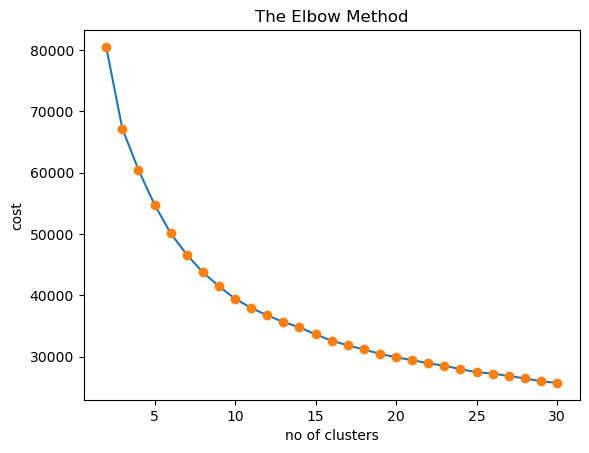

In [19]:
plt.plot(range(2,num_clusters), cost)
plt.plot(range(2,num_clusters), cost, 'o')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('cost')
plt.show()

There really isn't a clear choice looking at the elbow method of the number of clusters to choose.  Any number of clusters between 3 and 15 could be chosen.

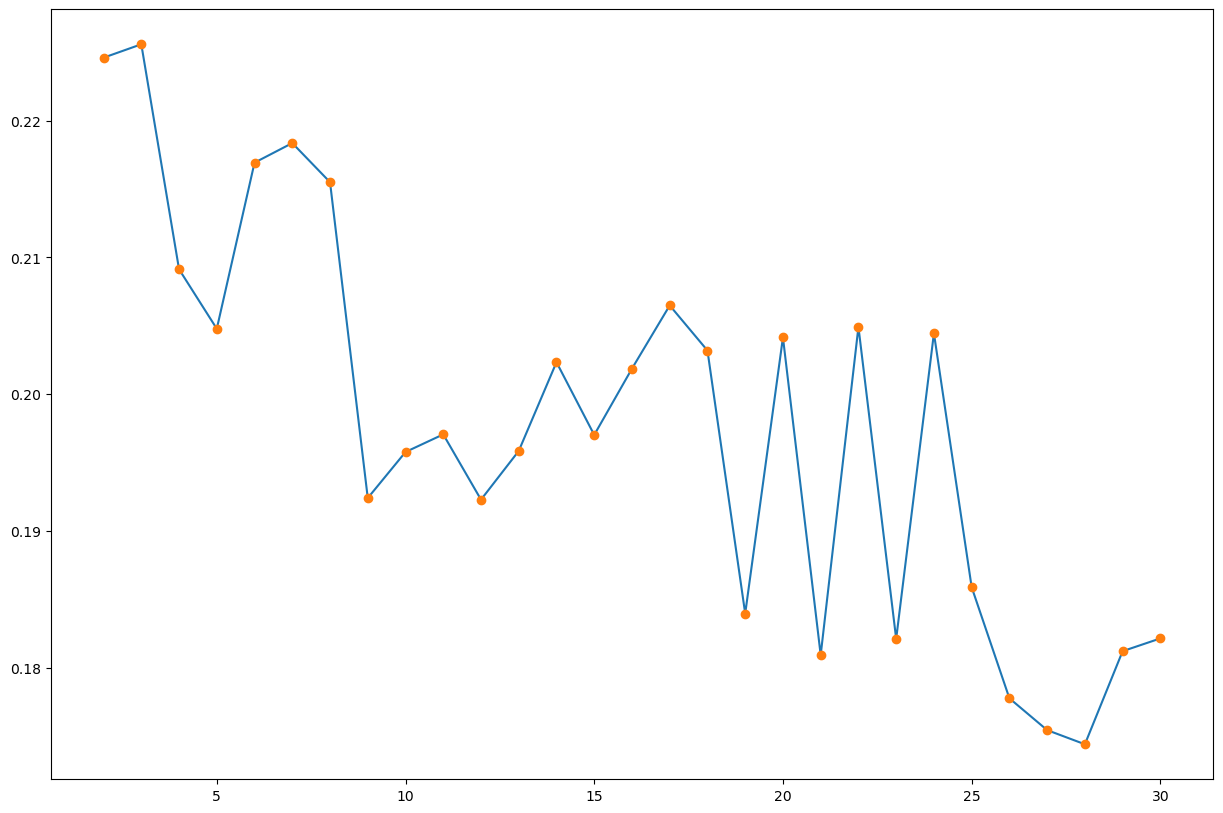

In [20]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(2,31,1), sil_scores)
plt.plot(np.arange(2,31,1), sil_scores, 'o')
plt.show()

The highest silhouette score looks to be 3 then 7 clusters so lets try those.

In [21]:
kmean7= KMeans(n_clusters = 7, random_state = 42, algorithm = 'full')
kmean7.fit(X)
labels7=kmean7.labels_

In [22]:
df_to_concat = df
for col in df_to_concat.columns:
    df_to_concat[col]= np.expm1(df_to_concat[col])

clusters7=pd.concat([df_to_concat, pd.DataFrame({'cluster':labels7})], axis=1)
clusters7.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
0                   95.40      0.000000                    0.000000   
1                    0.00   6442.945483                    0.000000   
2                    0.00      0.000000                    1.000000   
4                    0.00      0.000000                    0.083333   
5                 1333.28      0.000000                    0.000000   

   CASH_ADVANCE_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0               0.0        1000.0   201.802084        139.509787   
1               4.0        7000.0  4103.032597       1072.340217   
2               0.0        7500.0   622.066742        627.284787   
4               0.0        1200.0   678.334763        244.791237   
5               0.0        1800.0  1400.057770       2407.246035   

   PRC_FULL_PAYMENT  TENURE  cluster  
0          0.000000    12.0      0.0  
1          0.222222    12.0      1.0  
2          0.000000    12.0      2.0  
4          0.000000    12.0      4.0  
5          0.000000    12.0      2.0

## Interpretation of Clusters

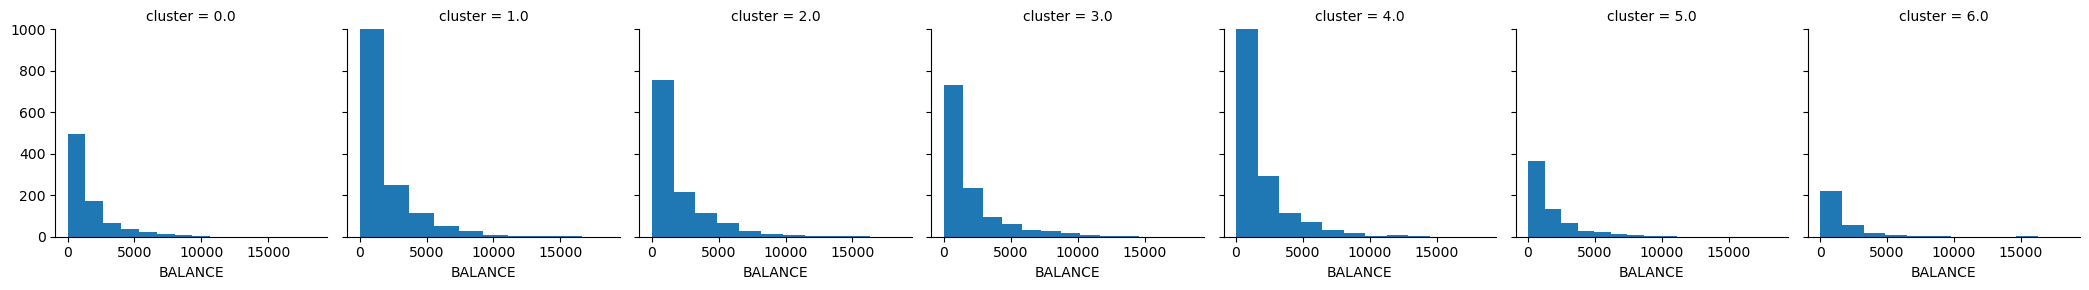

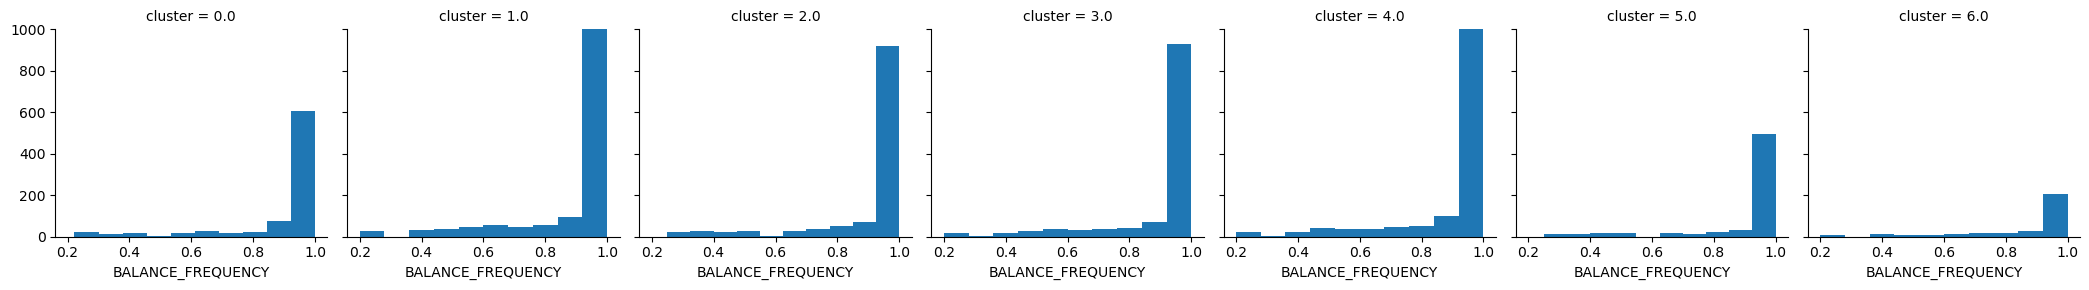

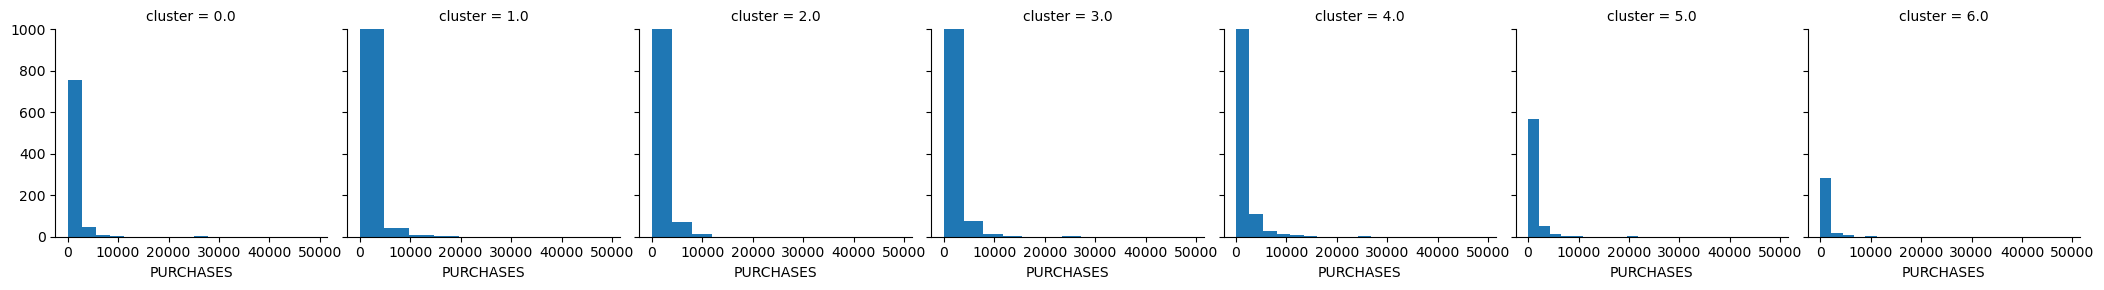

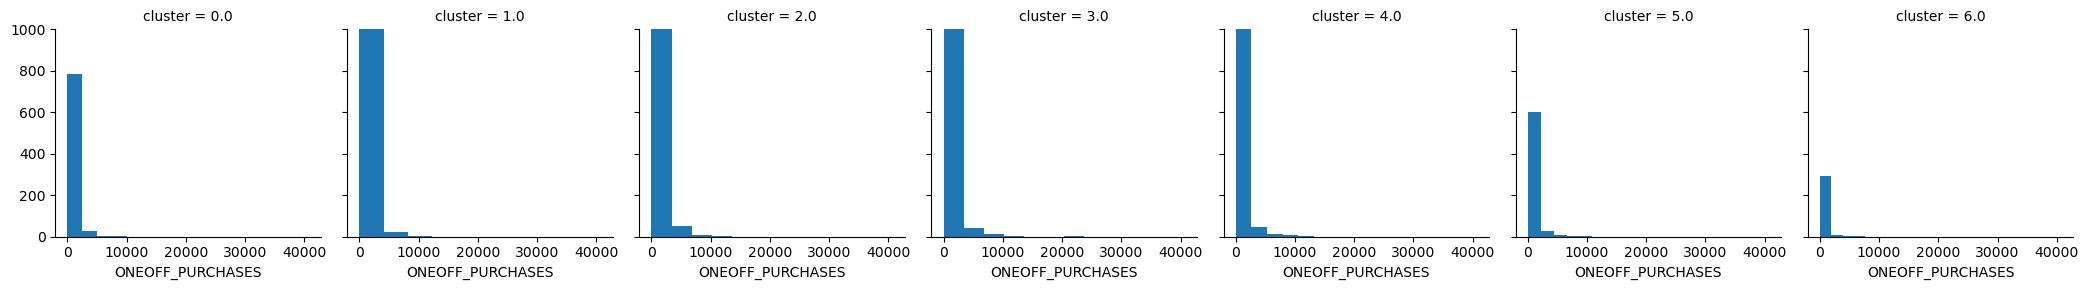

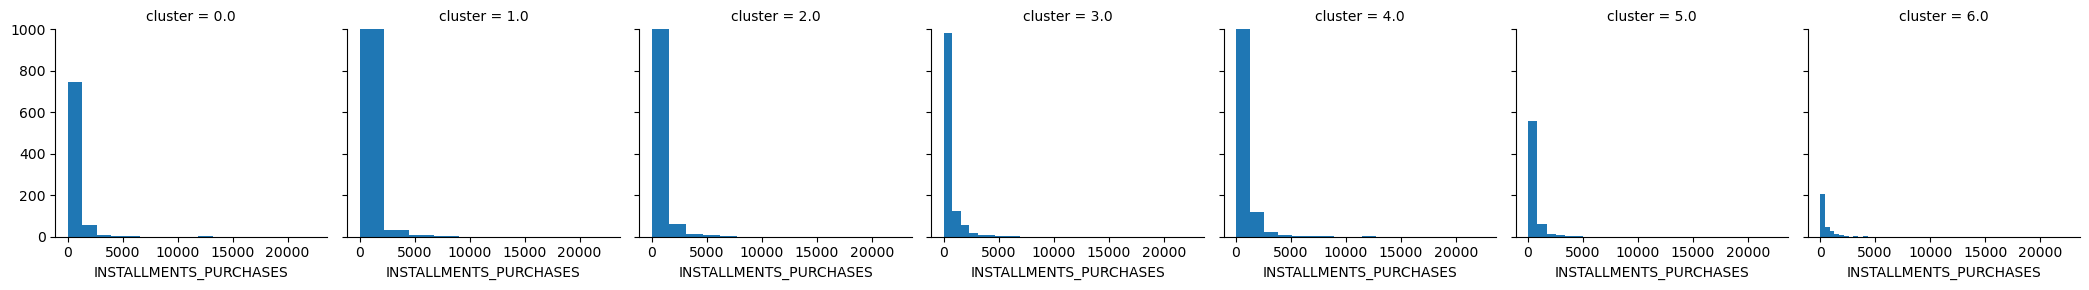

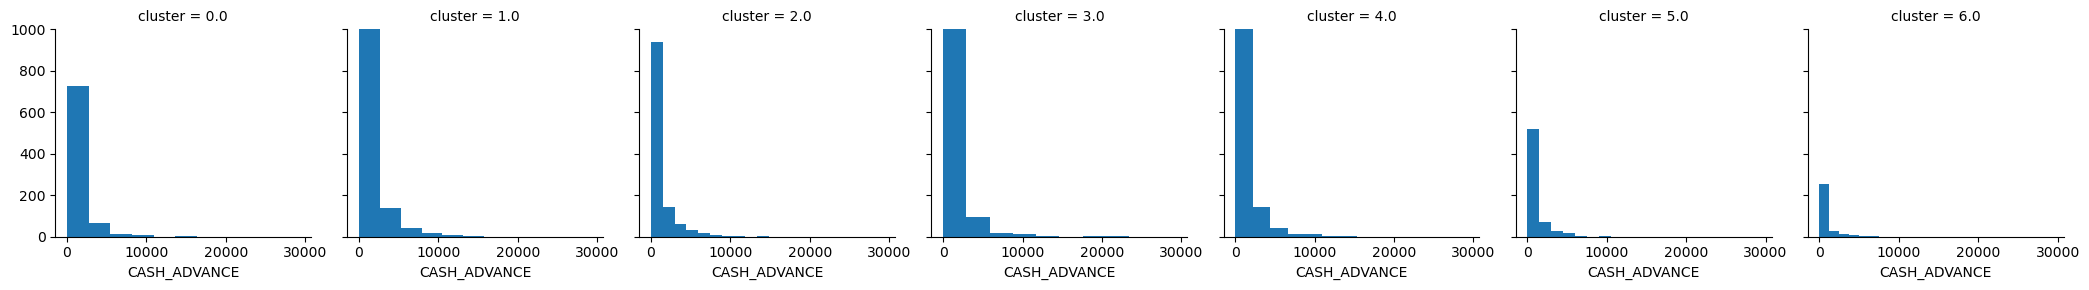

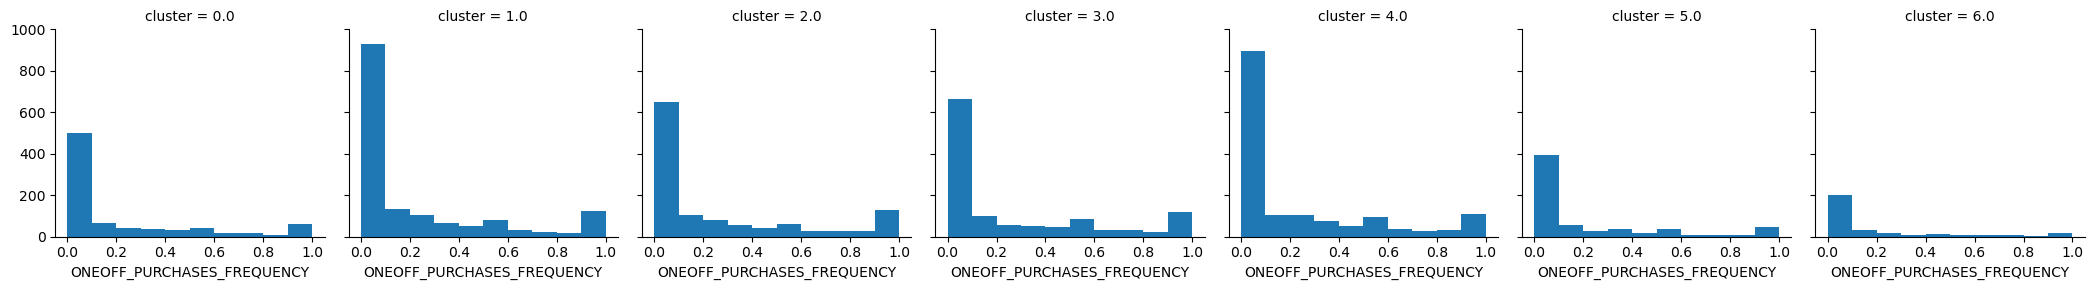

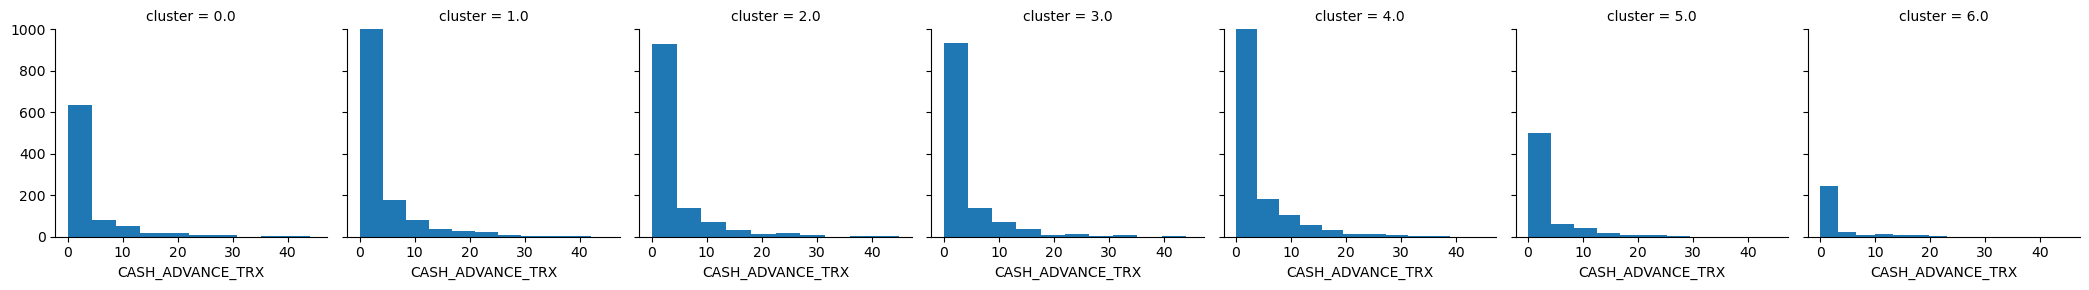

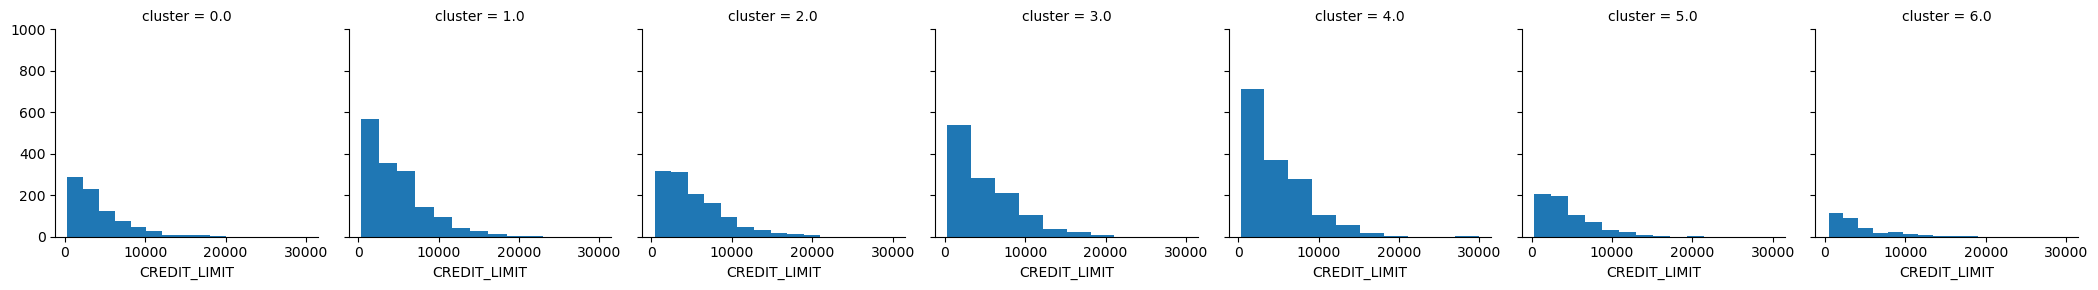

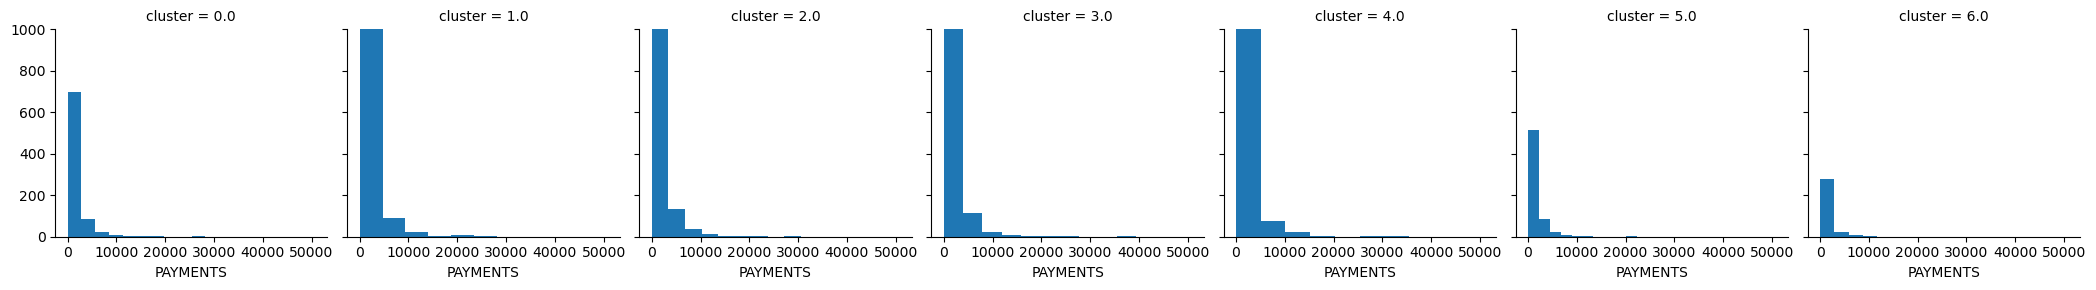

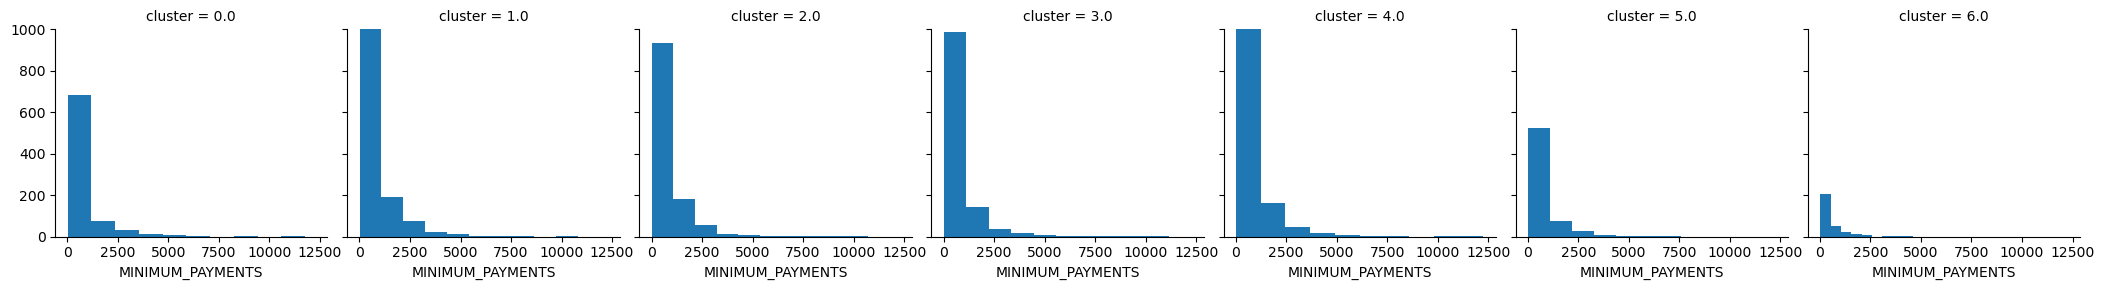

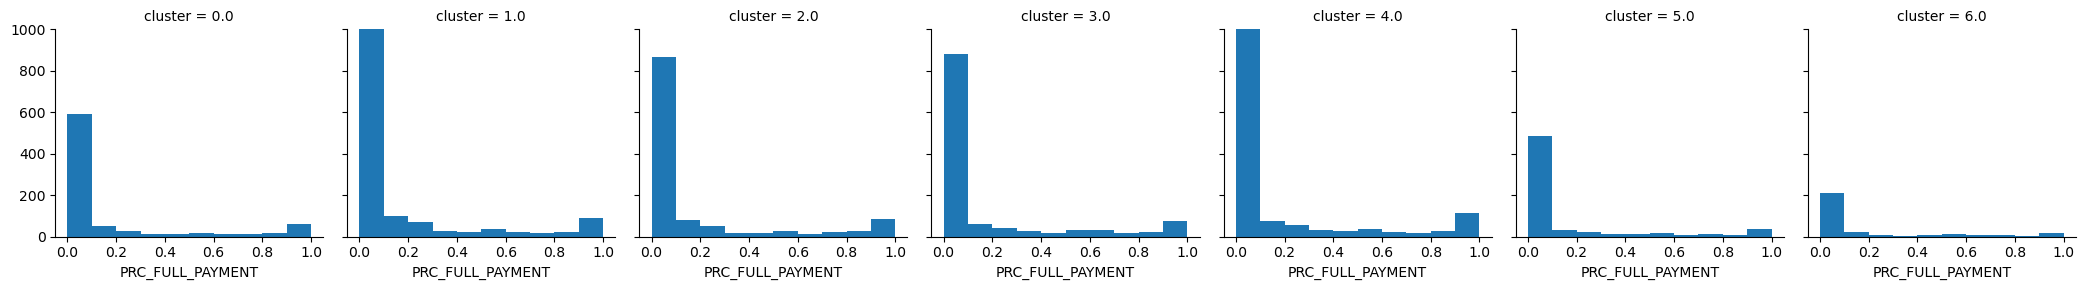

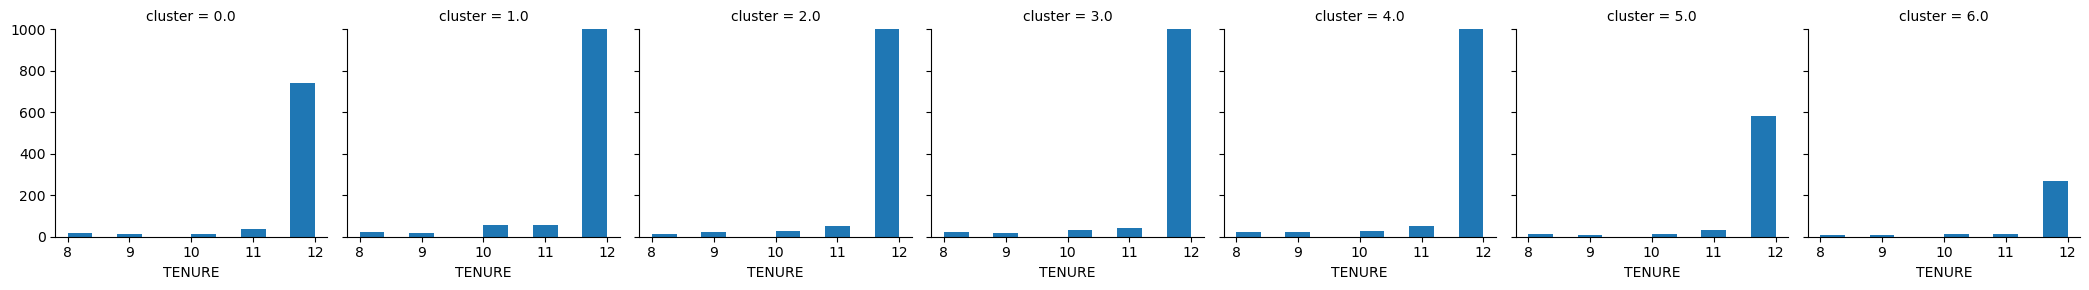

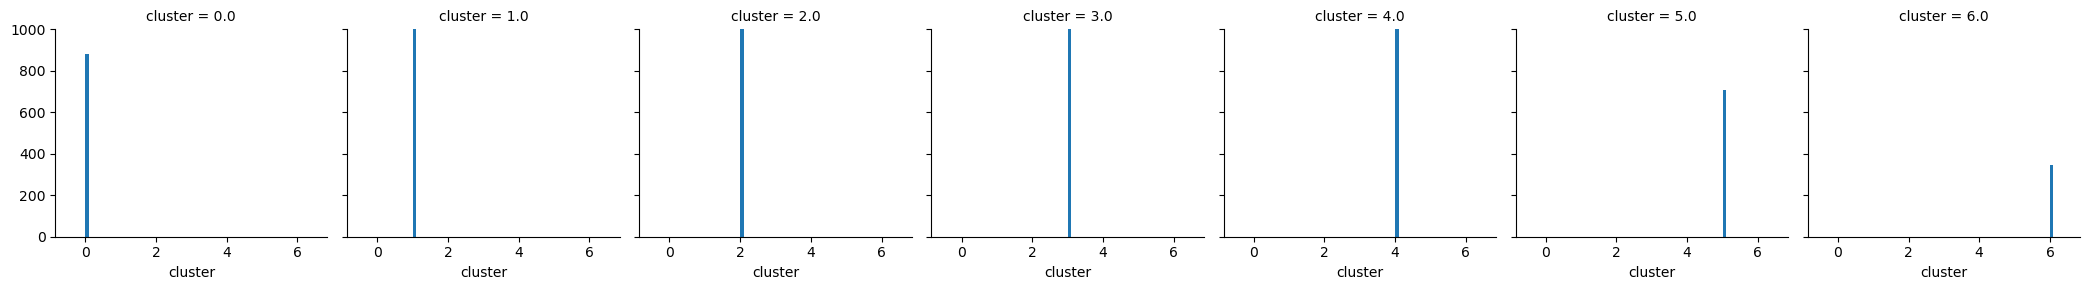

In [23]:
for c in clusters7:
    grid= sns.FacetGrid(clusters7, col='cluster')
    grid.map(plt.hist, c)
    grid.set(ylim=(0,1000))

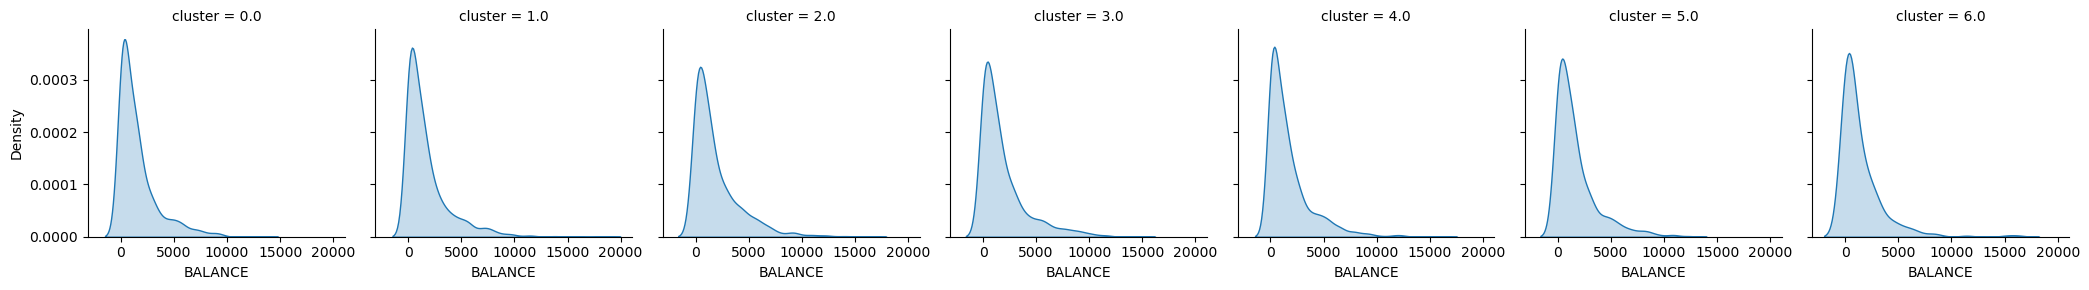

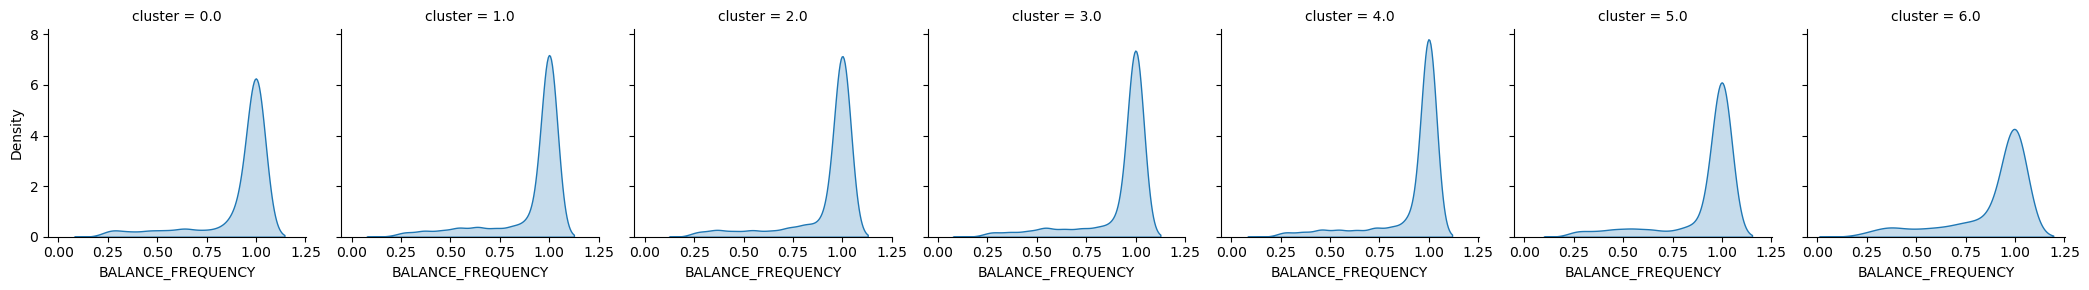

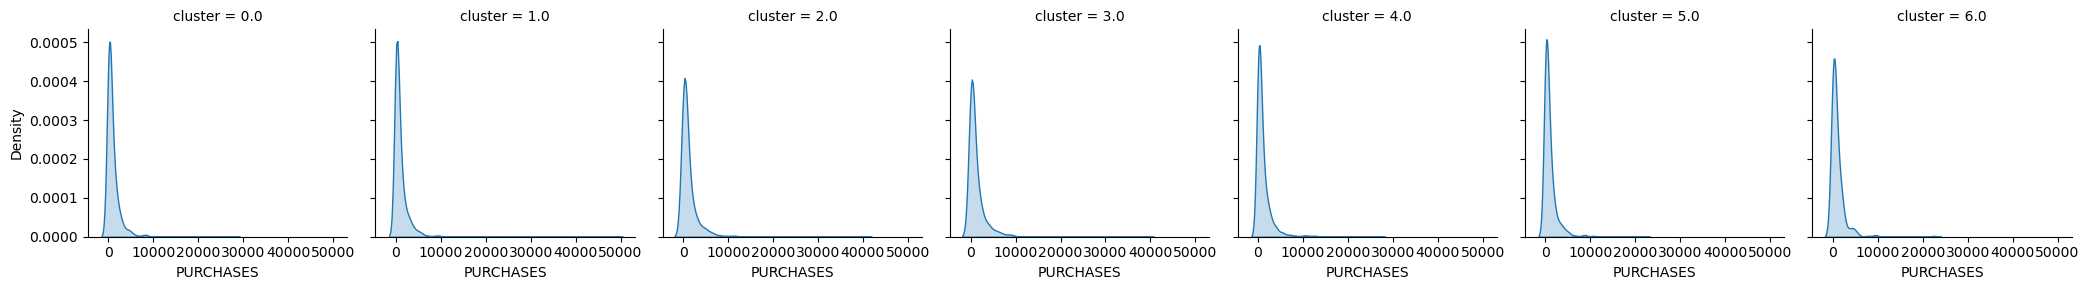

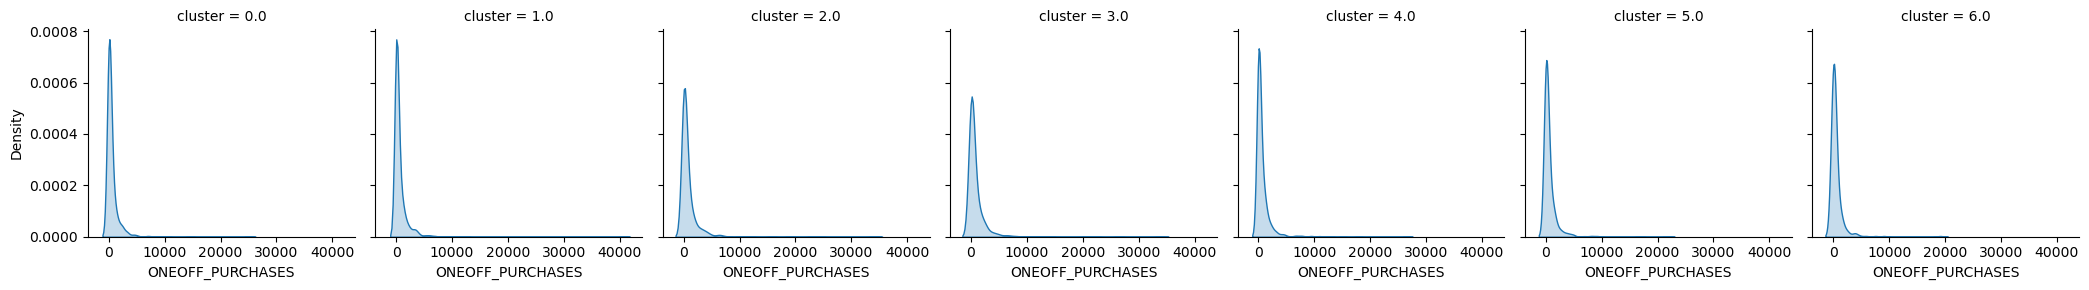

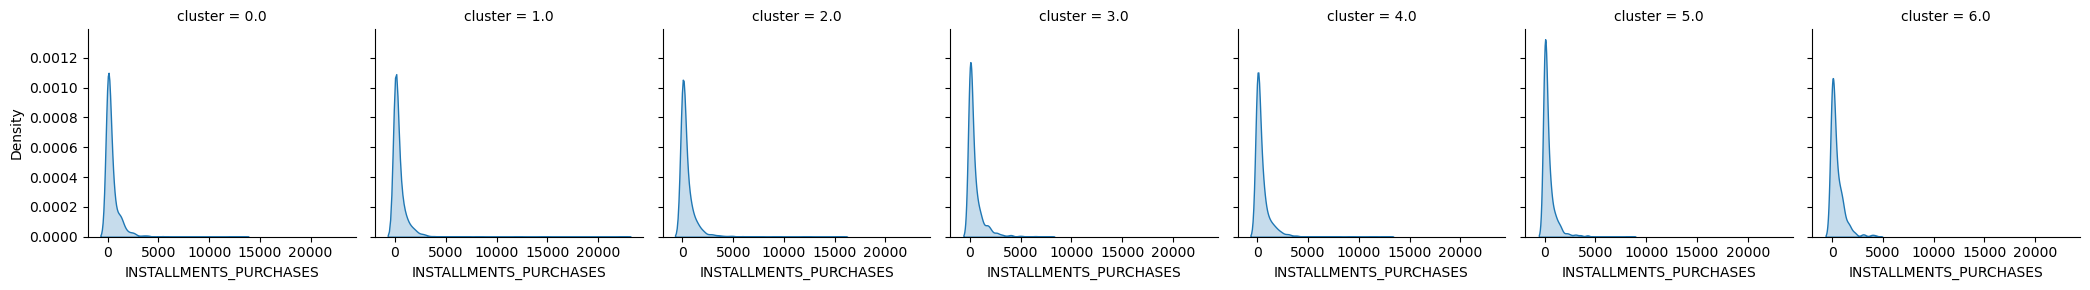

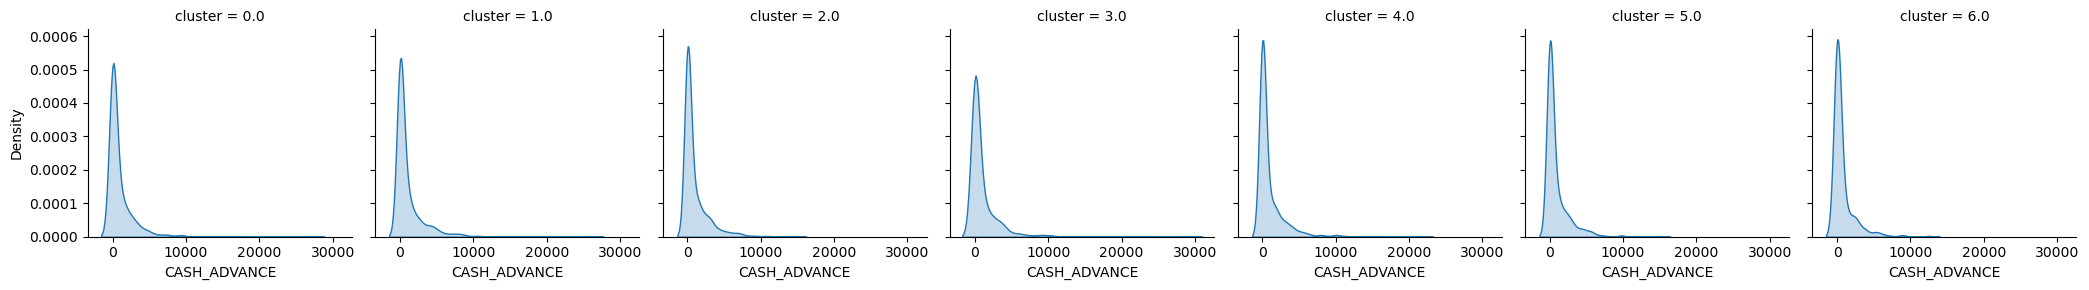

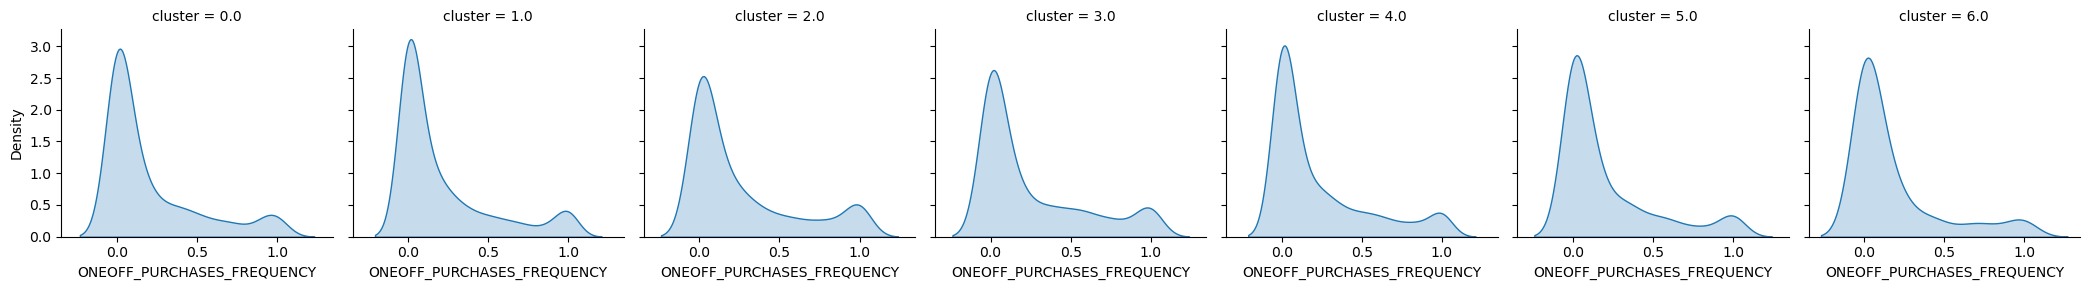

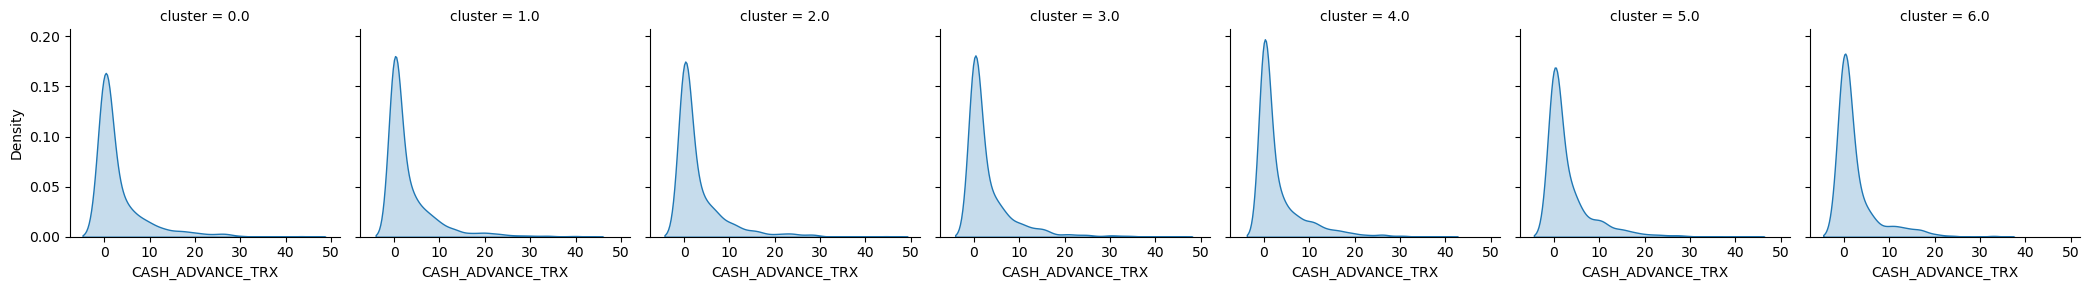

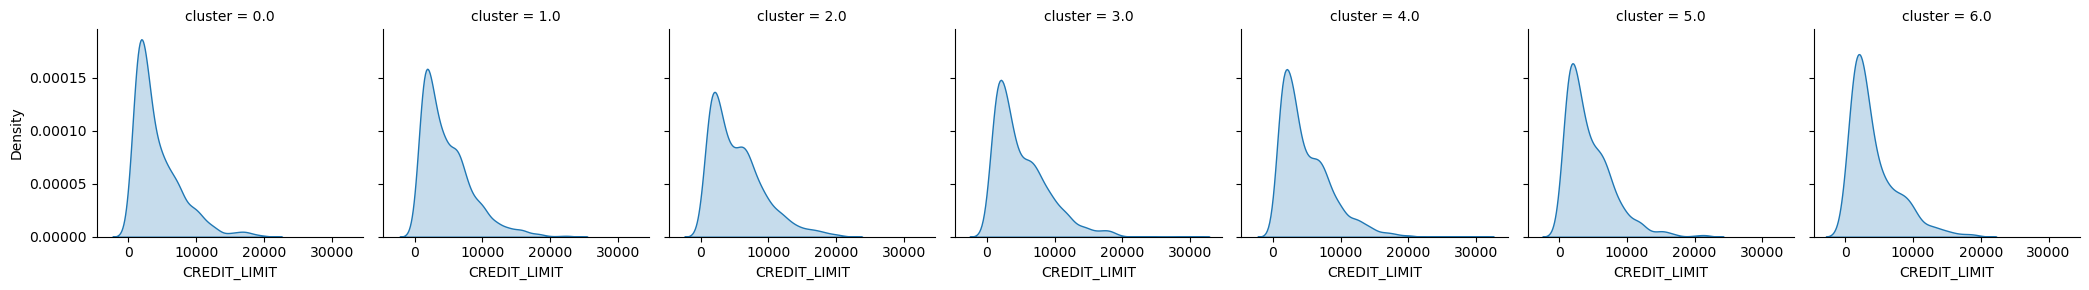

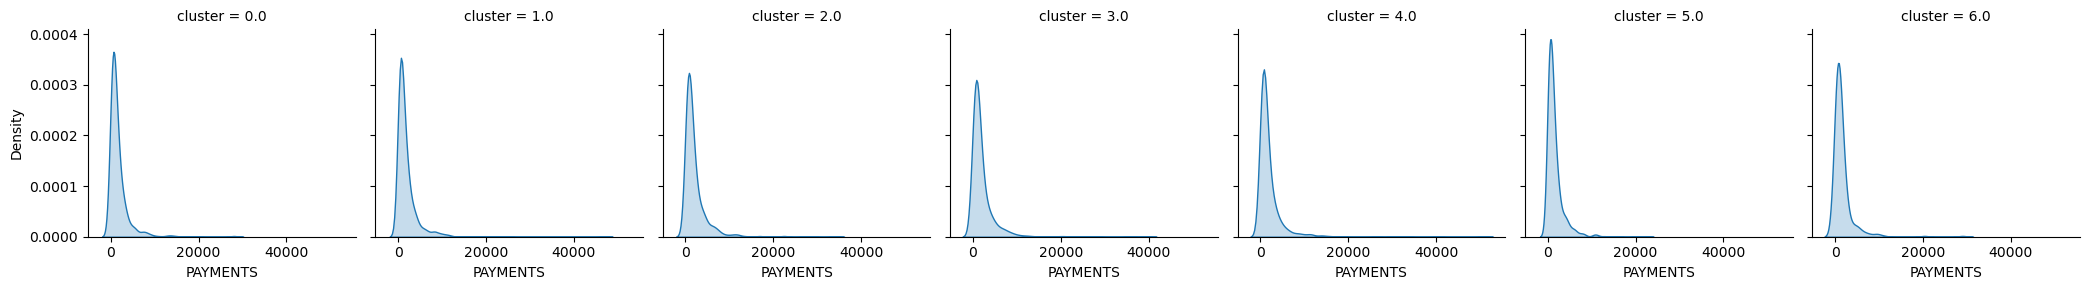

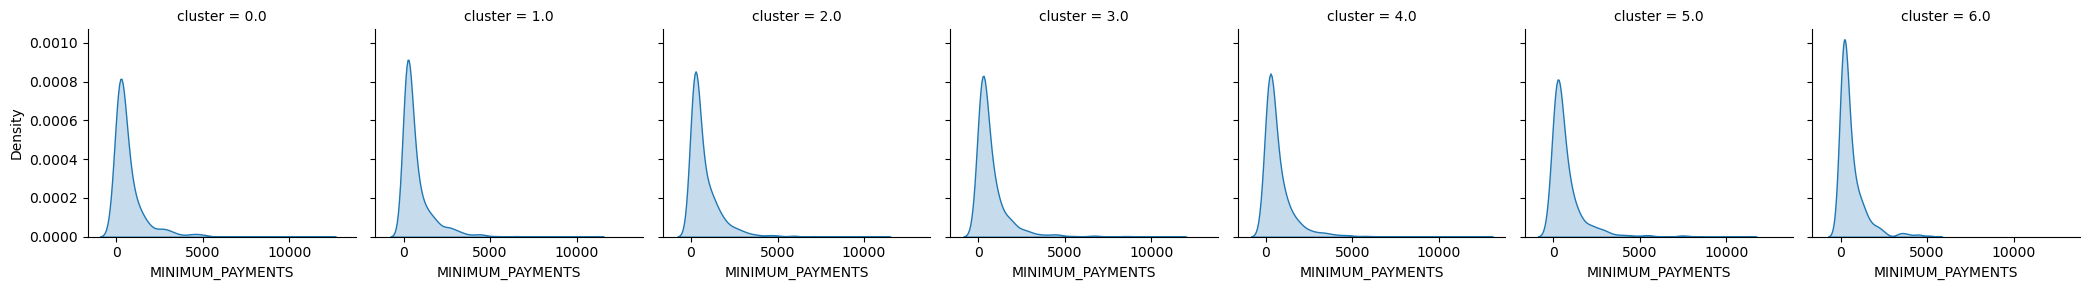

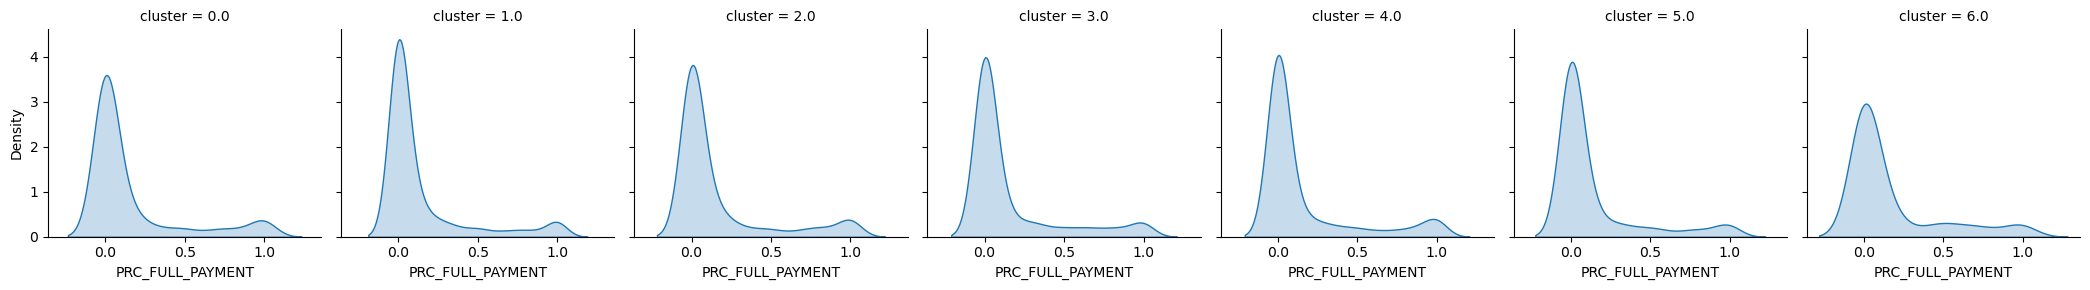

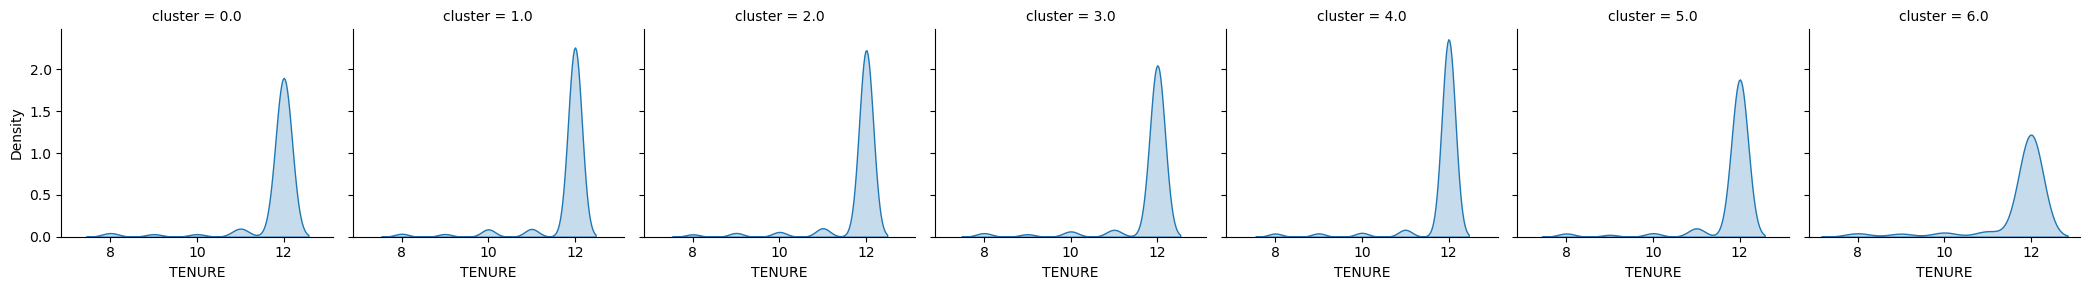

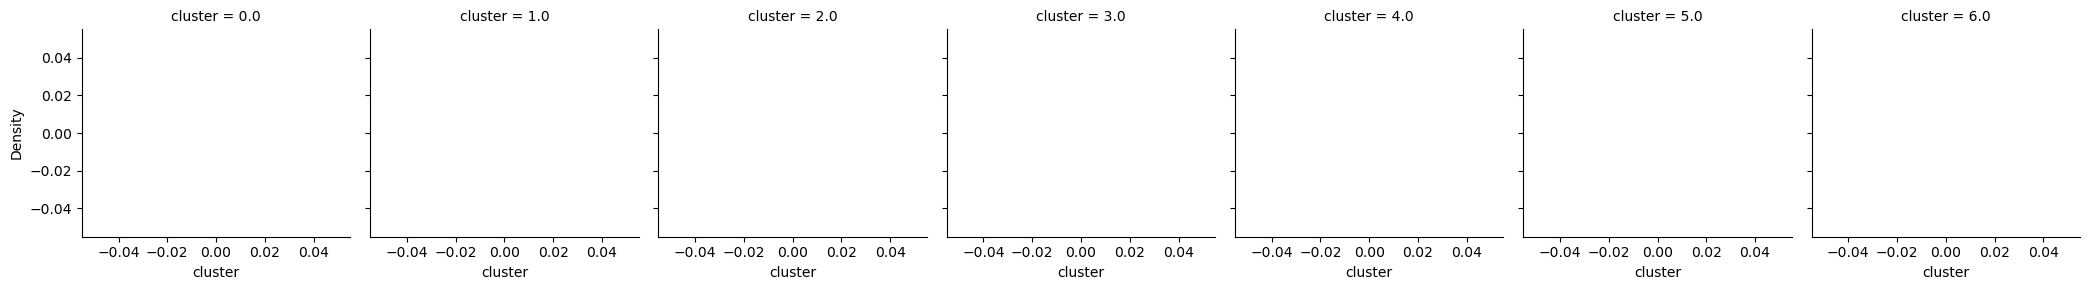

In [24]:
for c in clusters7:
    g = sns.FacetGrid(clusters7, col='cluster')
    g.map(sns.scatterplot, c)
    g.map(sns.kdeplot, c, fill=True)

* **Cluster0** People with average to high credit limit who make all type of purchases

* **Cluster1** This group has more people with due payments who take advance cash more often

* **Cluster2** Less money spenders with average to high credit limits who purchases mostly in installments 

* **Cluster3** People with high credit limit who take more cash in advance 

* **Cluster4** High spenders with high credit limit who make expensive purchases

* **Cluster5** People who don't spend much money and who have average to high credit limit

* **Cluster6** People who make expensive purchases and with payments due


## Visualization of Clusters

#### Using PCA to transform data to 2 dimensions for visualization

In [25]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8017, 2)

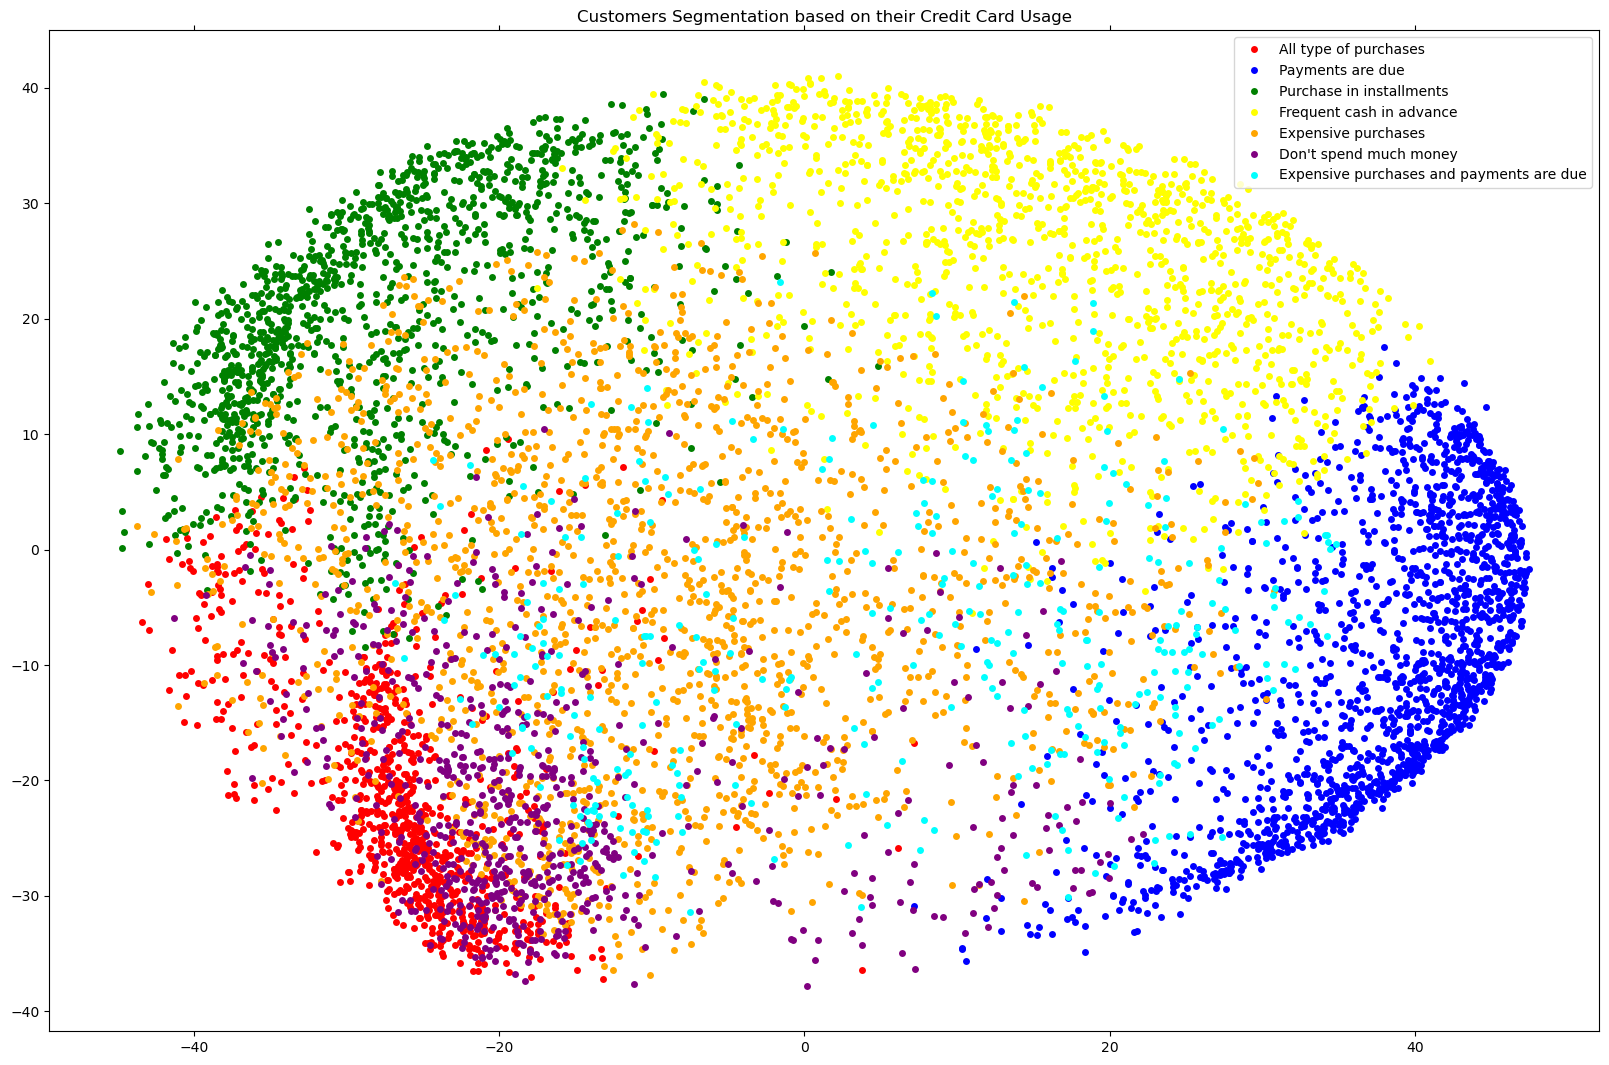

In [26]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6: 'aqua'}

names = {0: 'All type of purchases', 
         1: 'Payments are due', 
         2: 'Purchase in installments', 
         3: 'Frequent cash in advance', 
         4: 'Expensive purchases',
         5:'Don\'t spend much money',
         6: 'Expensive purchases and payments are due'}
  
df_7labels = pd.DataFrame({'x': x, 'y':y, 'label':labels7}) 
groups_7 = df_7labels.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups_7:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card Usage")
plt.show()

This looks to be too many clusters.  There is a lot of overlap between the red and purple clusters while the aqua cluster is really spread out and doesn't seem to cluster at all.

Lets try 3 Clusters now.

In [27]:
kmean3= KMeans(3)
kmean3.fit(X)
labels3=kmean3.labels_

In [28]:
clusters3=pd.concat([df_to_concat, pd.DataFrame({'cluster':labels3})], axis=1)
clusters3.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
0                   95.40      0.000000                    0.000000   
1                    0.00   6442.945483                    0.000000   
2                    0.00      0.000000                    1.000000   
4                    0.00      0.000000                    0.083333   
5                 1333.28      0.000000                    0.000000   

   CASH_ADVANCE_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0               0.0        1000.0   201.802084        139.509787   
1               4.0        7000.0  4103.032597       1072.340217   
2               0.0        7500.0   622.066742        627.284787   
4               0.0        1200.0   678.334763        244.791237   
5               0.0        1800.0  1400.057770       2407.246035   

   PRC_FULL_PAYMENT  TENURE  cluster  
0          0.000000    12.0      2.0  
1          0.222222    12.0      0.0  
2          0.000000    12.0      1.0  
4          0.000000    12.0      1.0  
5          0.000000    12.0      1.0

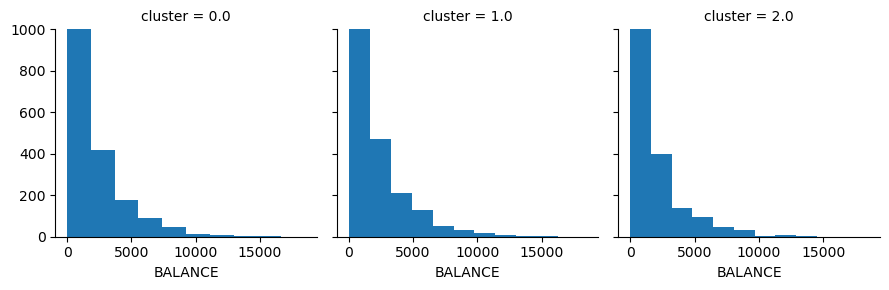

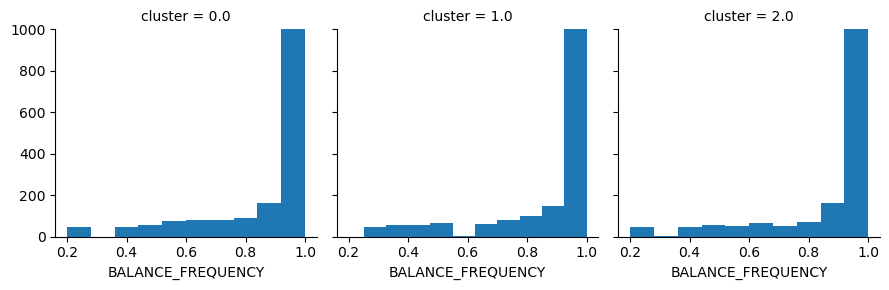

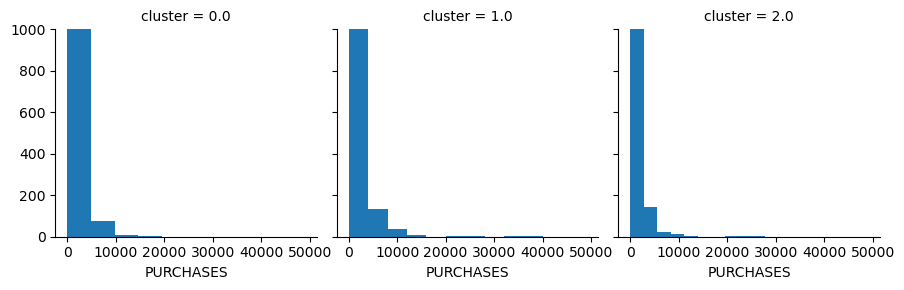

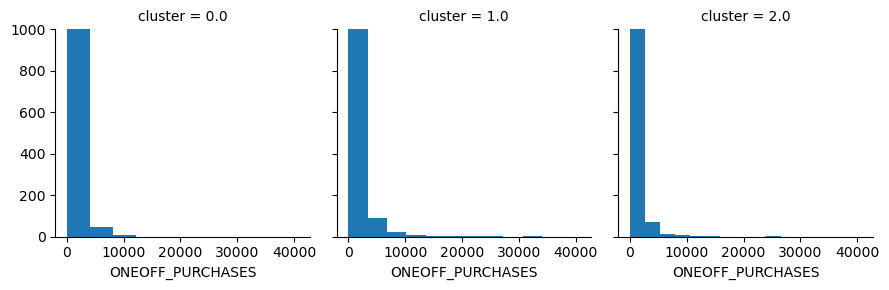

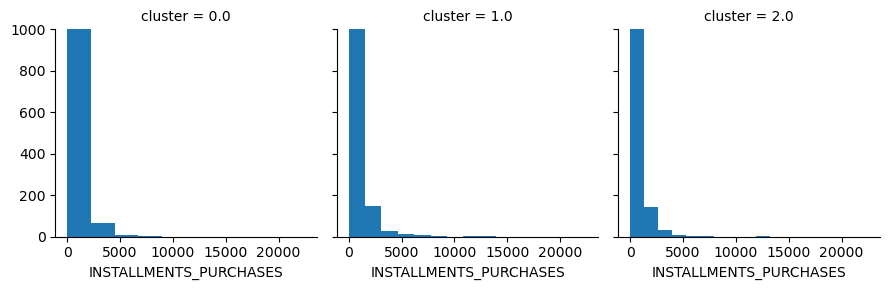

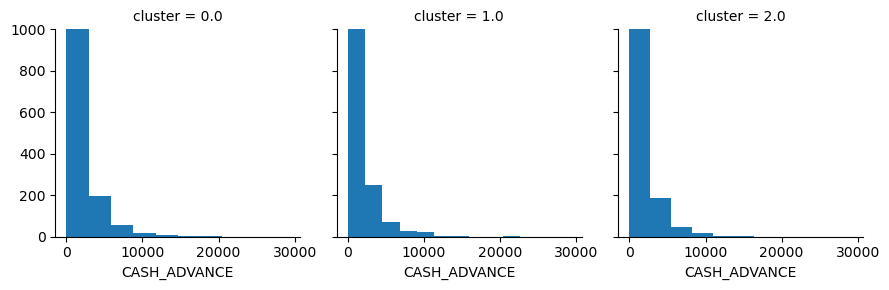

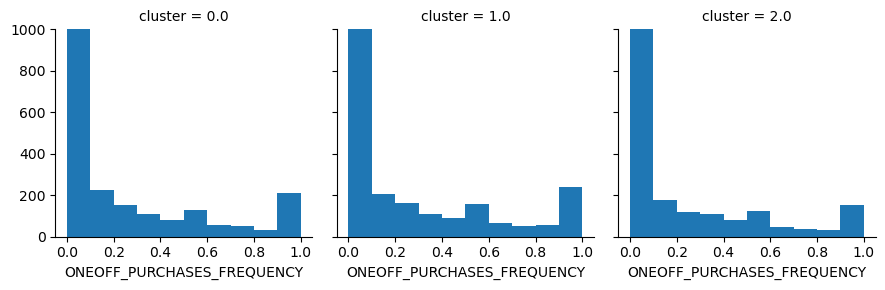

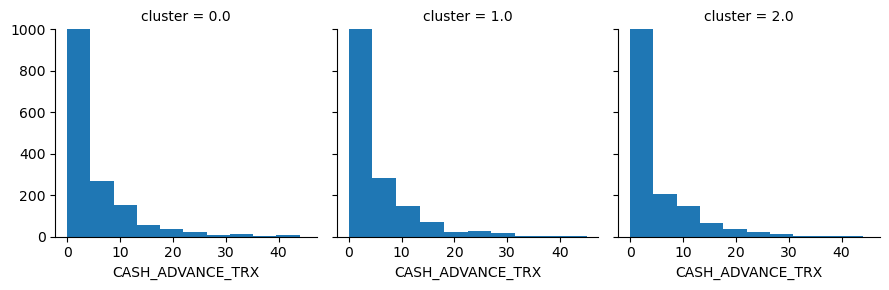

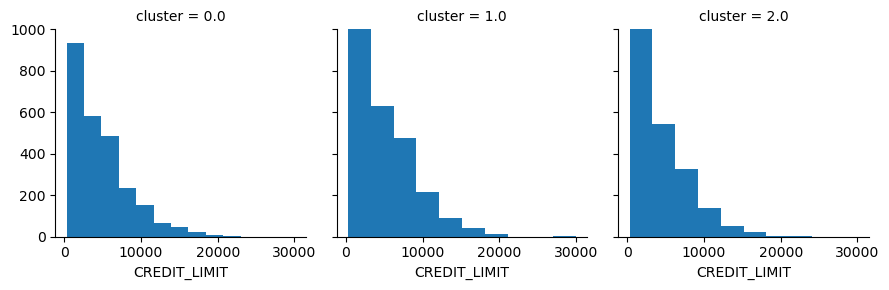

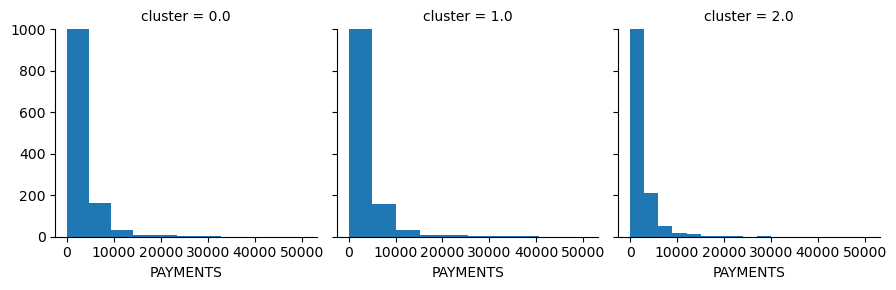

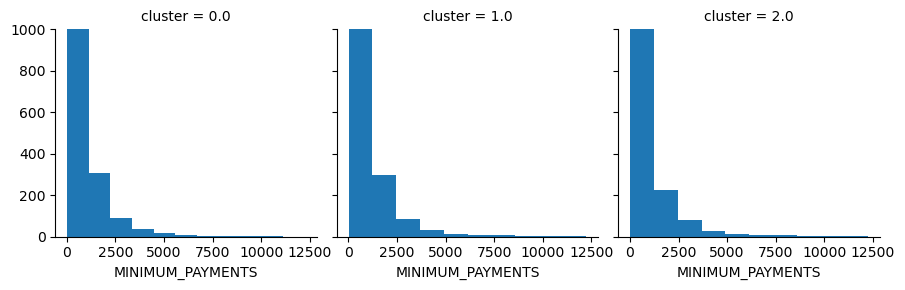

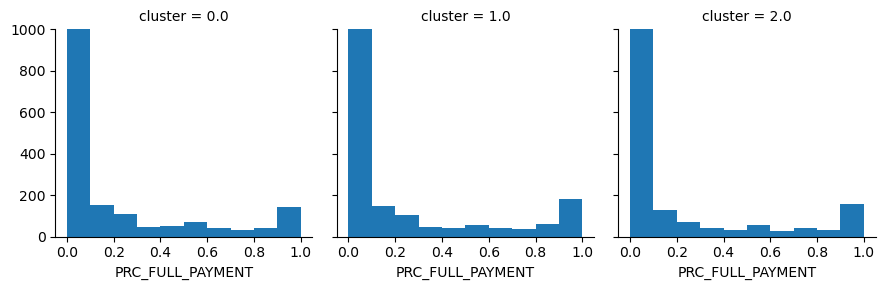

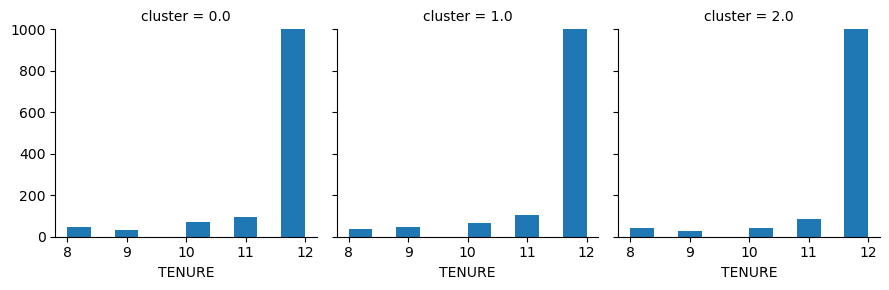

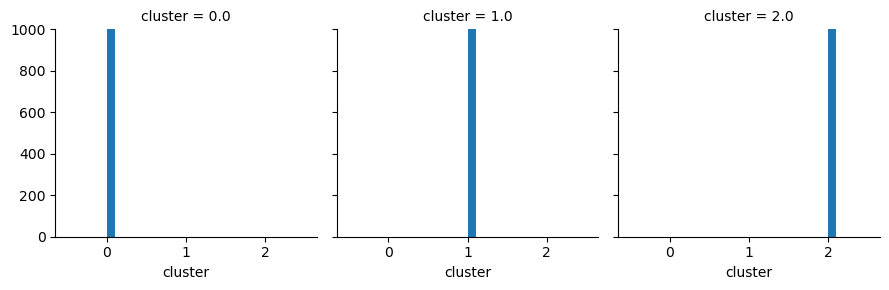

In [29]:
for c in clusters3:
    grid= sns.FacetGrid(clusters3, col='cluster')
    grid.map(plt.hist, c)
    grid.set(ylim=(0,1000))

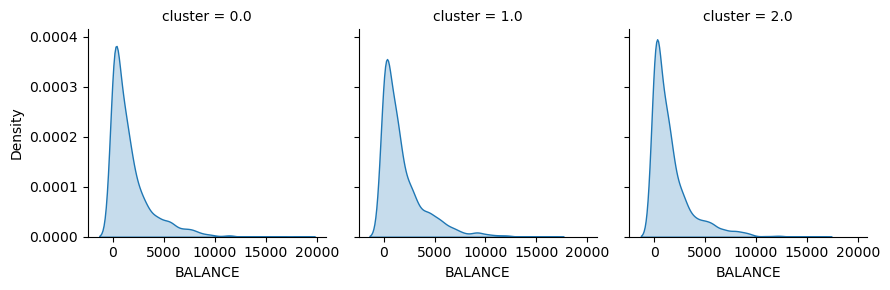

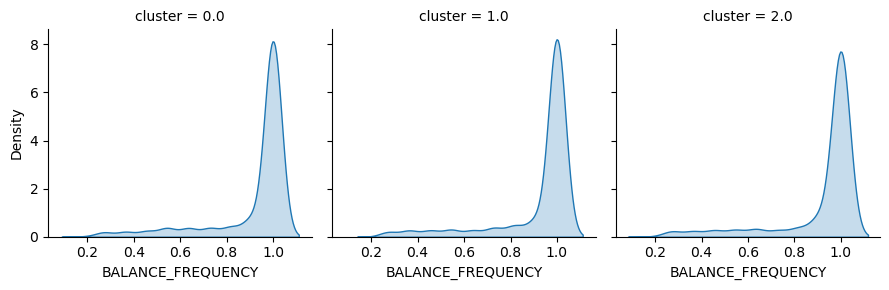

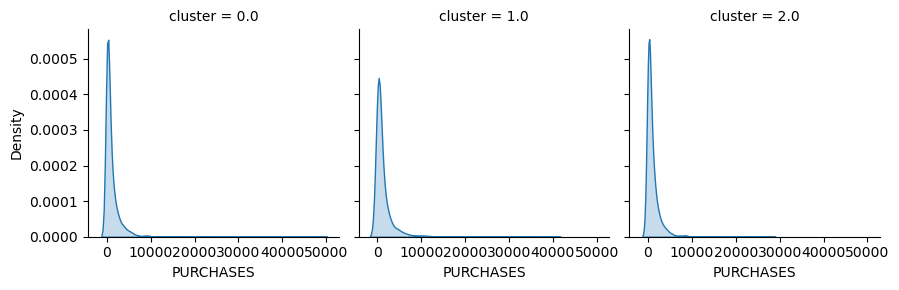

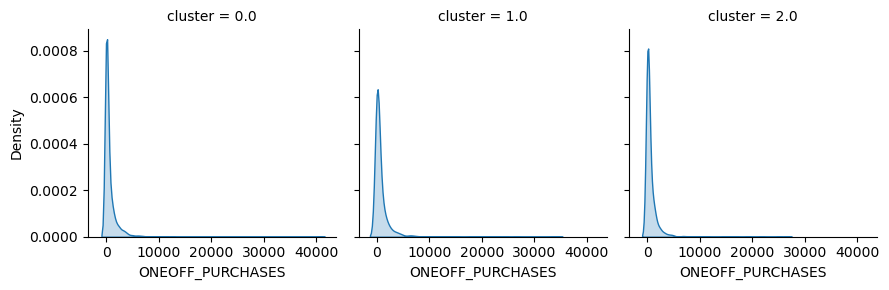

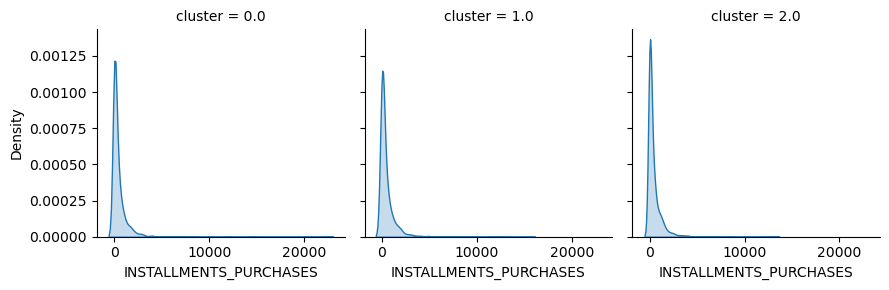

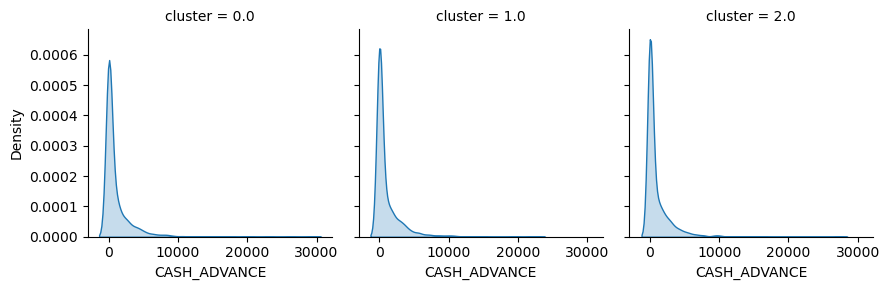

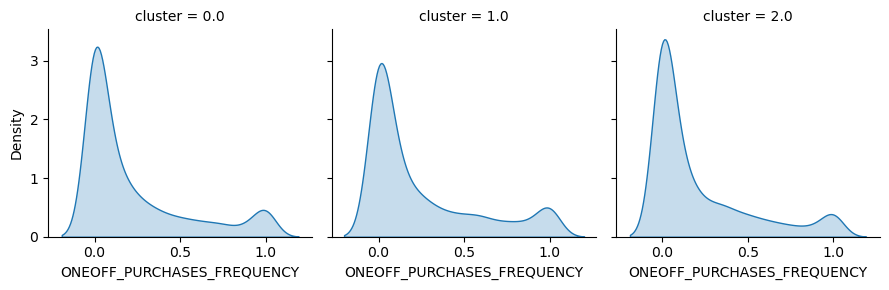

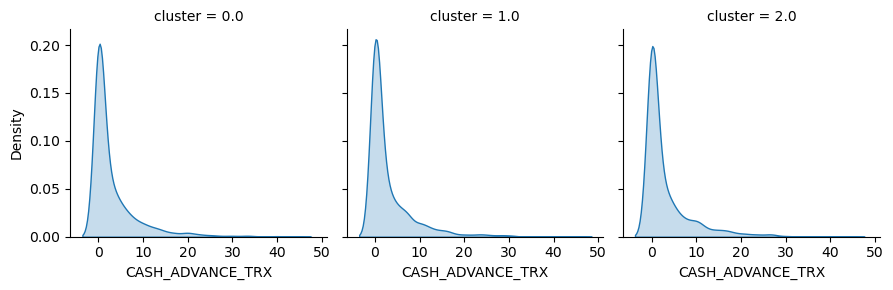

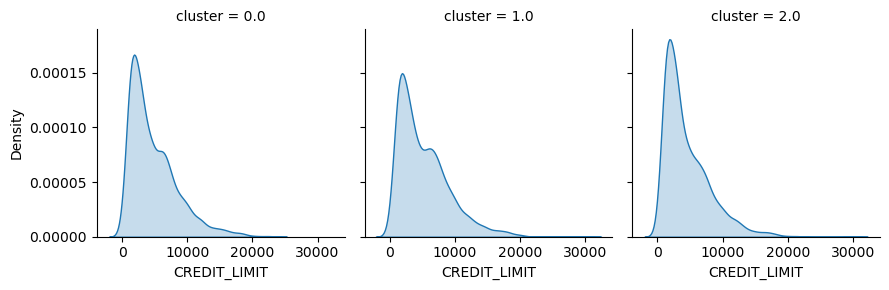

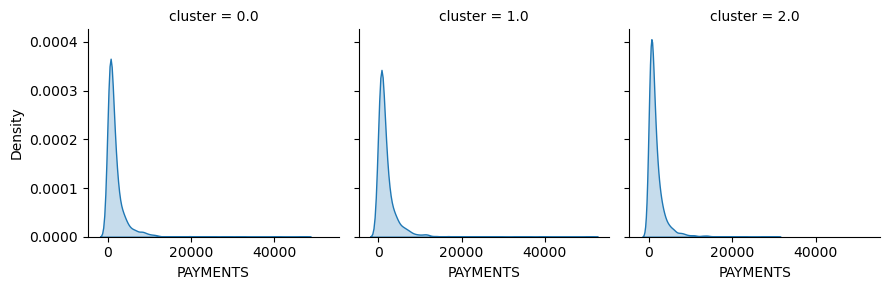

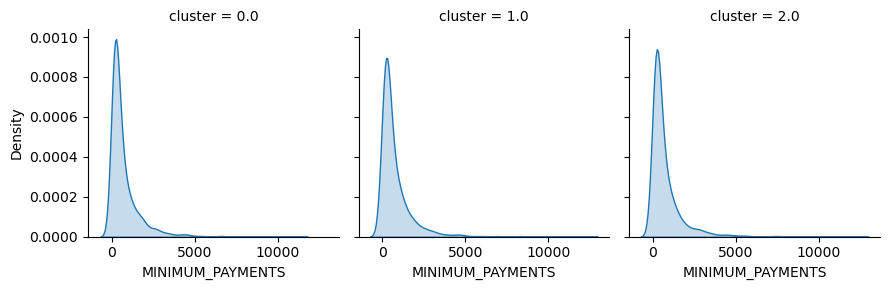

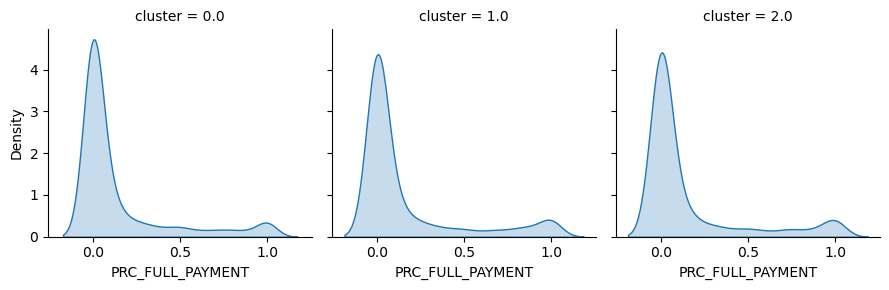

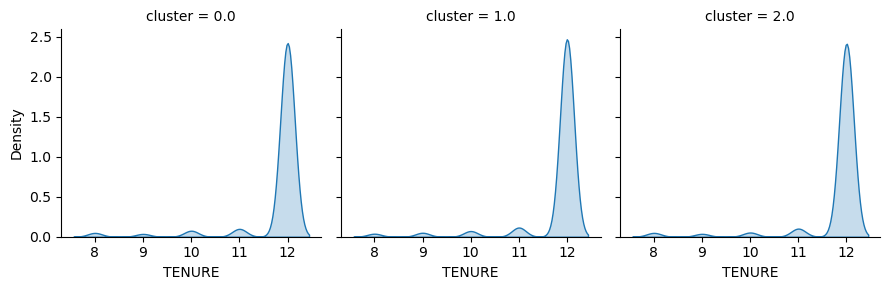

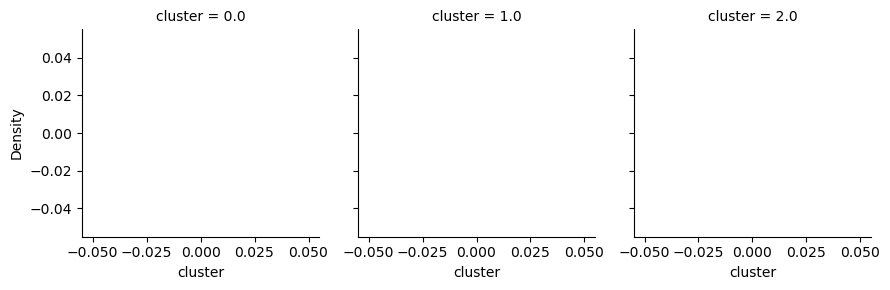

In [30]:
for c in clusters3:
    g = sns.FacetGrid(clusters3, col='cluster')
    g.map(sns.scatterplot, c)
    g.map(sns.kdeplot, c, fill=True)

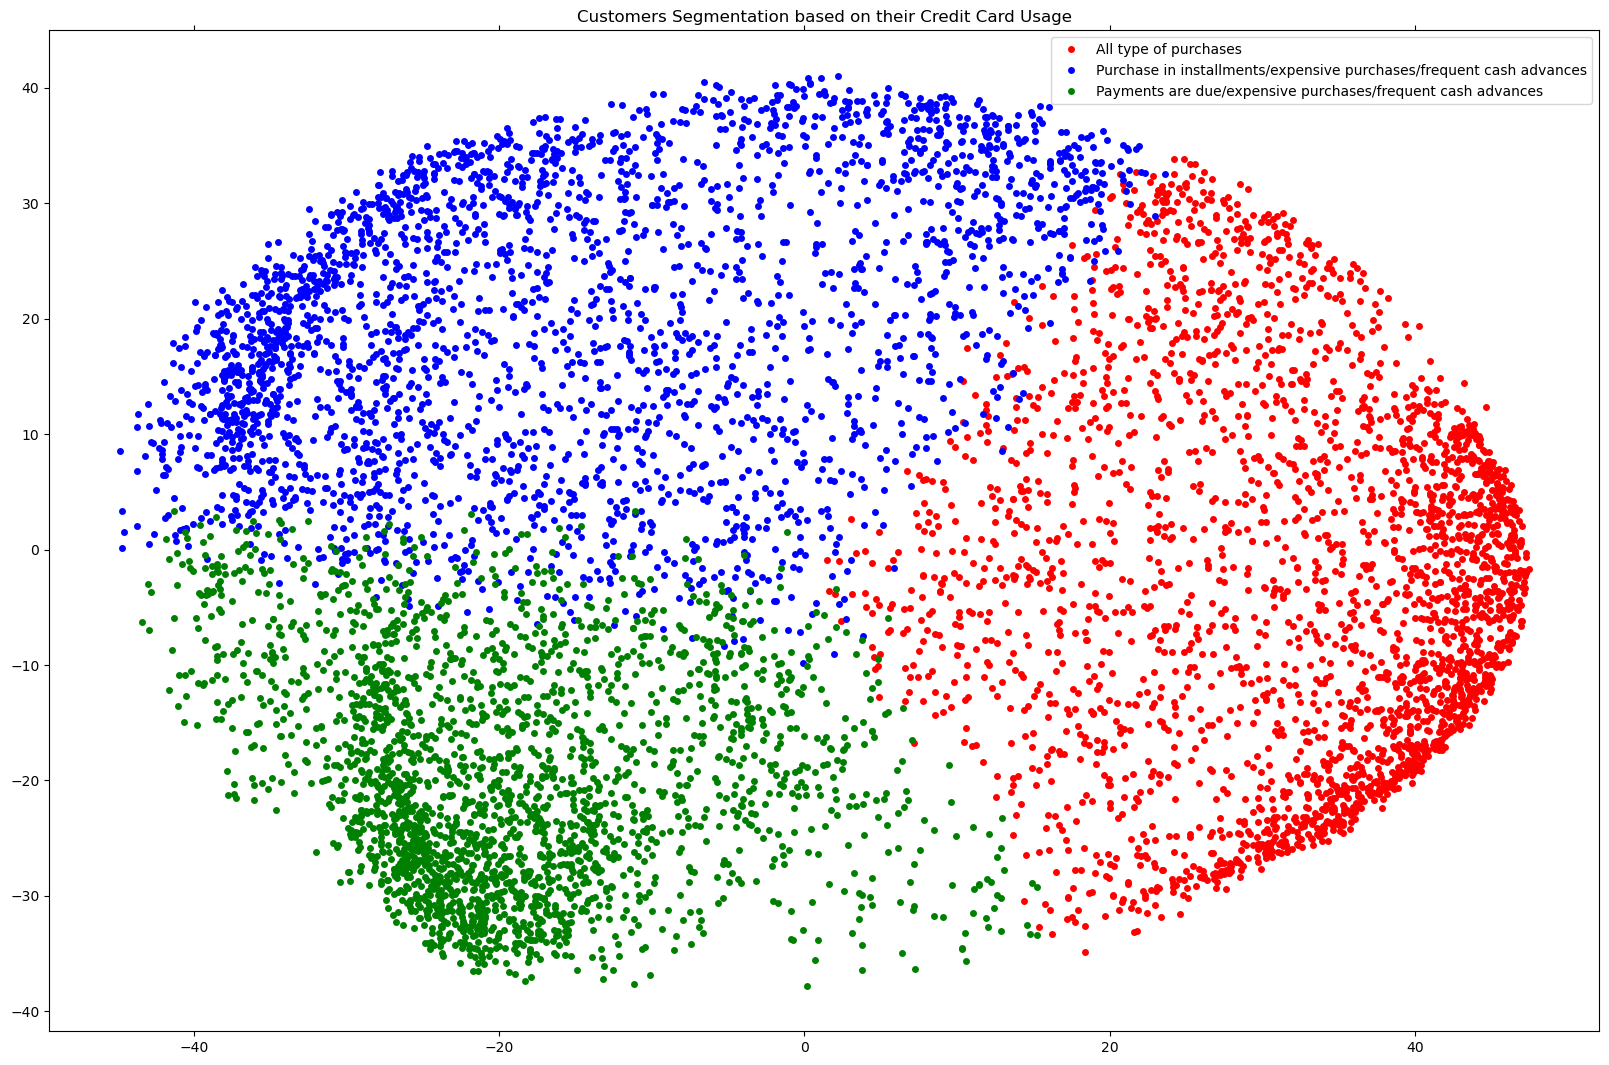

In [31]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green' 
          }

names = {0: 'All type of purchases', 
         1: 'Purchase in installments/expensive purchases/frequent cash advances', 
         2: 'Payments are due/expensive purchases/frequent cash advances'
        }
  
df_3labels = pd.DataFrame({'x': x, 'y':y, 'label':labels3}) 
groups_3 = df_3labels.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups_3:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card Usage")
plt.show()

This shows very good cluster segmentation although it may be a bit too general for what someone is trying to achieve. 

Lets try 5 clusters

In [32]:
kmean5= KMeans(5)
kmean5.fit(X)
labels5=kmean5.labels_
labels5

array([2, 1, 0, ..., 1, 4, 1])

In [33]:
clusters5=pd.concat([df_to_concat, pd.DataFrame({'cluster':labels5})], axis=1)
clusters5.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
0                   95.40      0.000000                    0.000000   
1                    0.00   6442.945483                    0.000000   
2                    0.00      0.000000                    1.000000   
4                    0.00      0.000000                    0.083333   
5                 1333.28      0.000000                    0.000000   

   CASH_ADVANCE_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0               0.0        1000.0   201.802084        139.509787   
1               4.0        7000.0  4103.032597       1072.340217   
2               0.0        7500.0   622.066742        627.284787   
4               0.0        1200.0   678.334763        244.791237   
5               0.0        1800.0  1400.057770       2407.246035   

   PRC_FULL_PAYMENT  TENURE  cluster  
0          0.000000    12.0      2.0  
1          0.222222    12.0      1.0  
2          0.000000    12.0      0.0  
4          0.000000    12.0      4.0  
5          0.000000    12.0      0.0

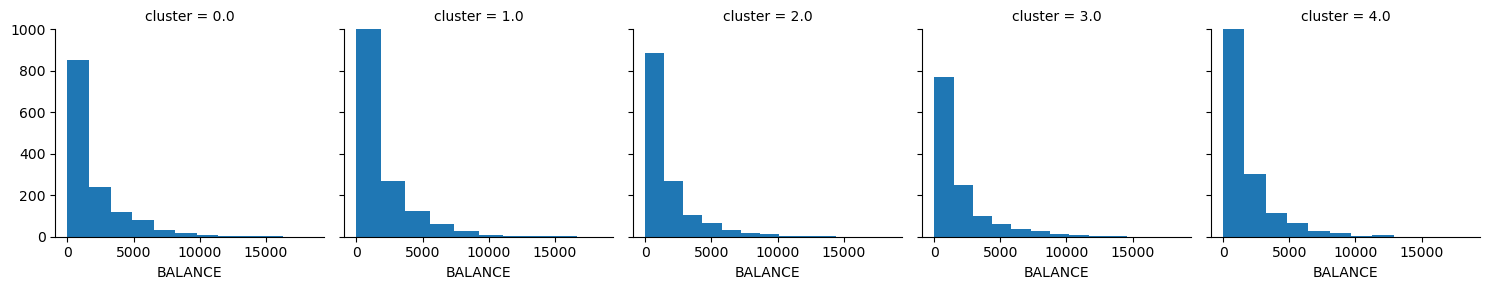

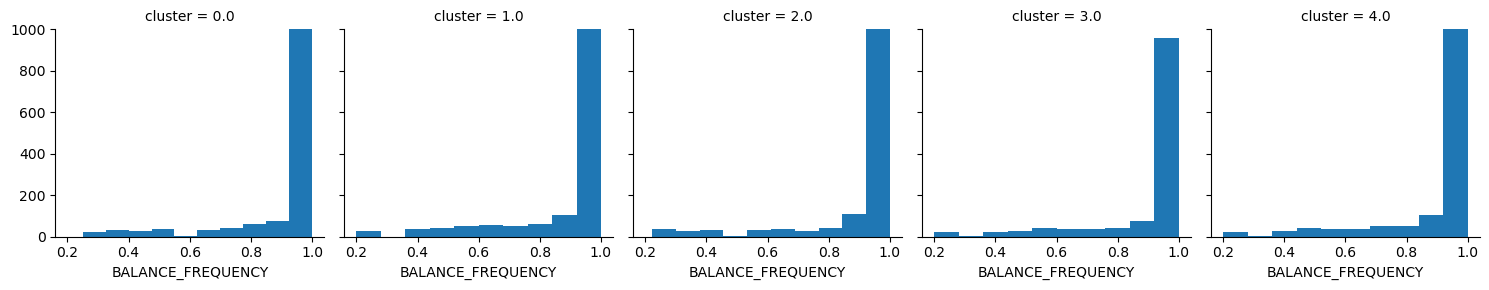

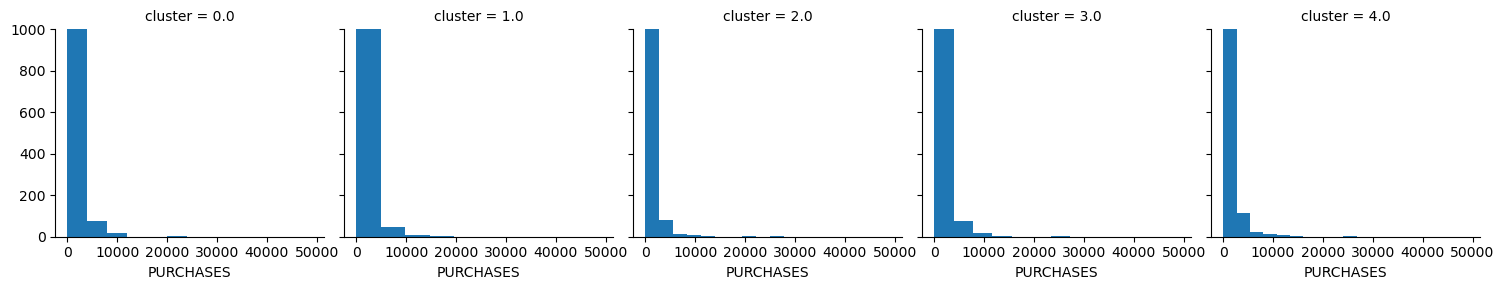

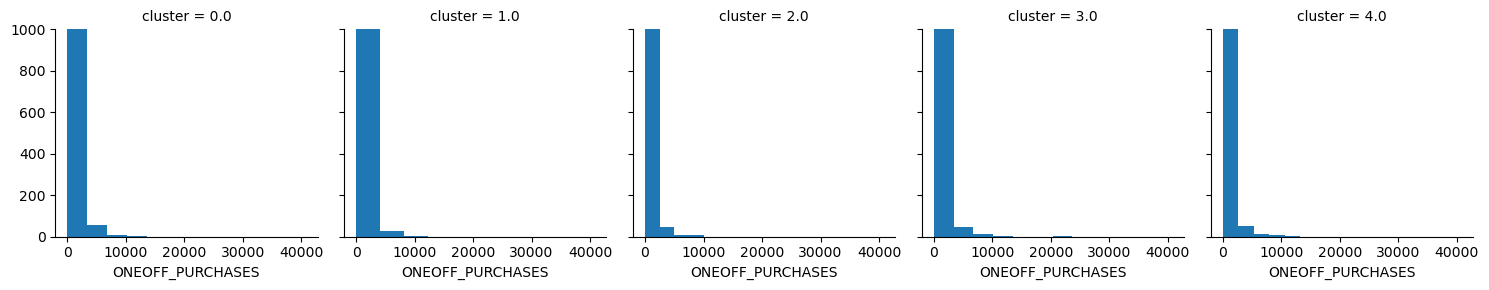

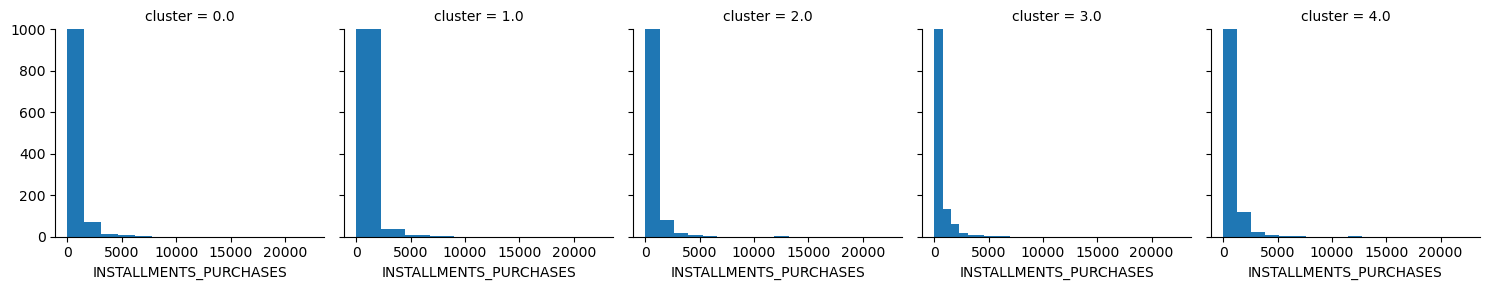

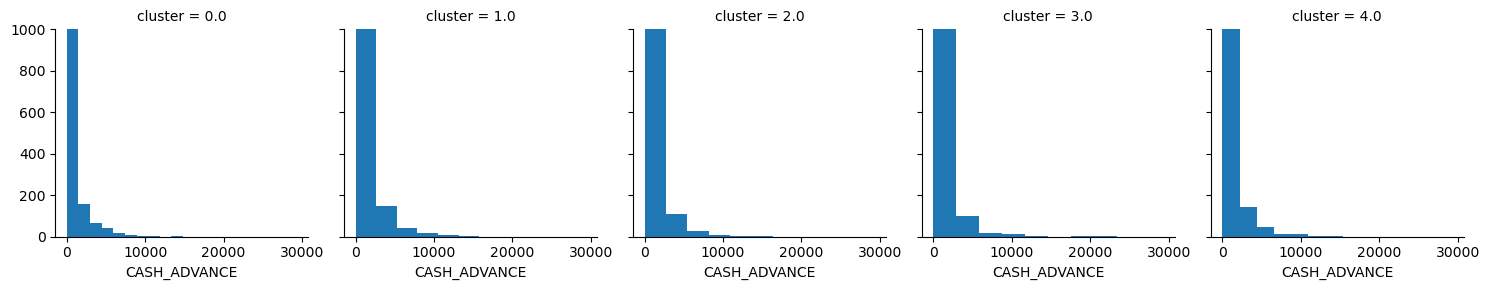

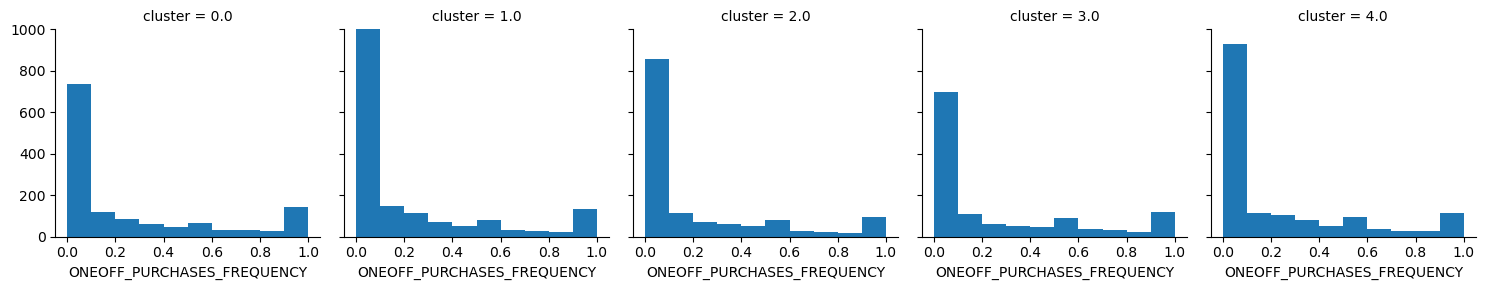

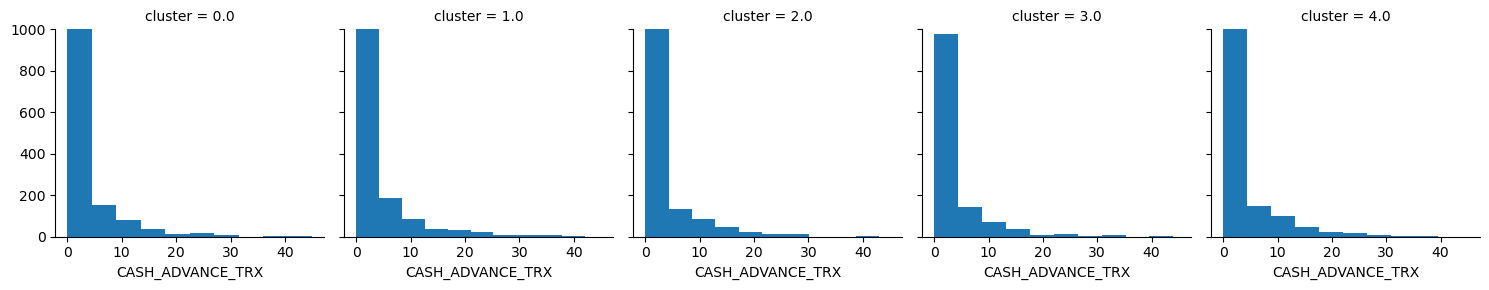

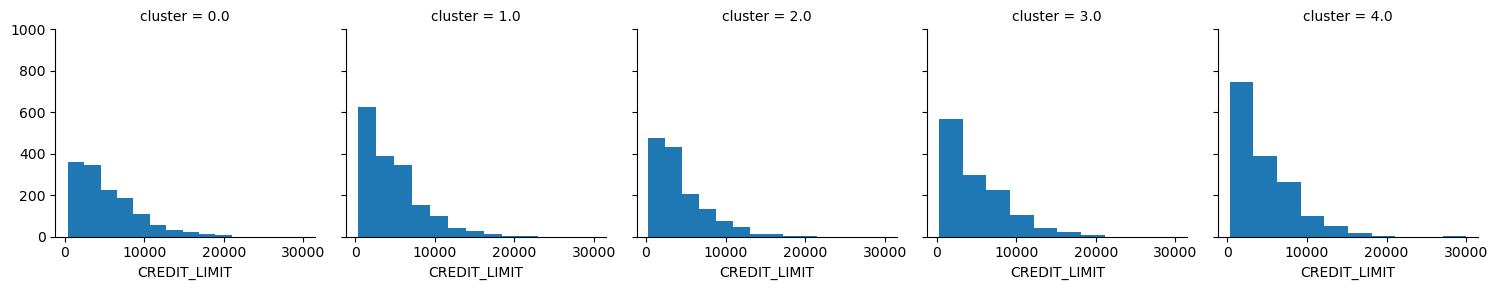

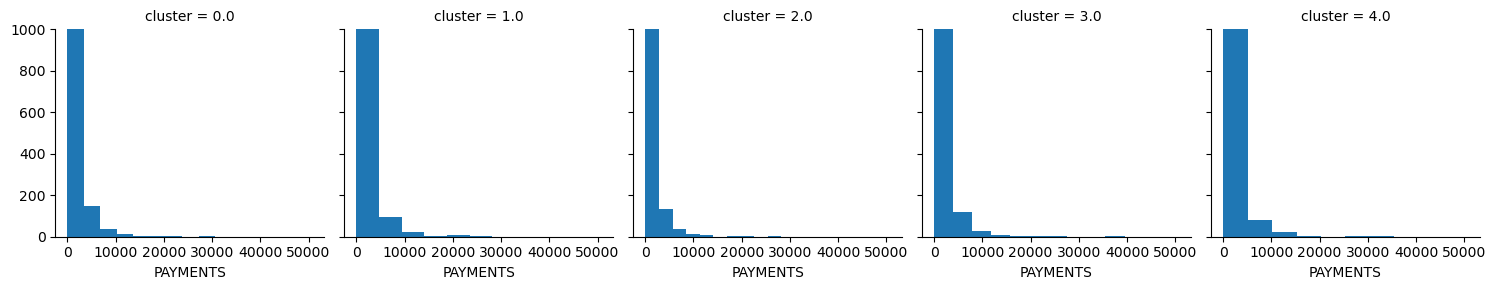

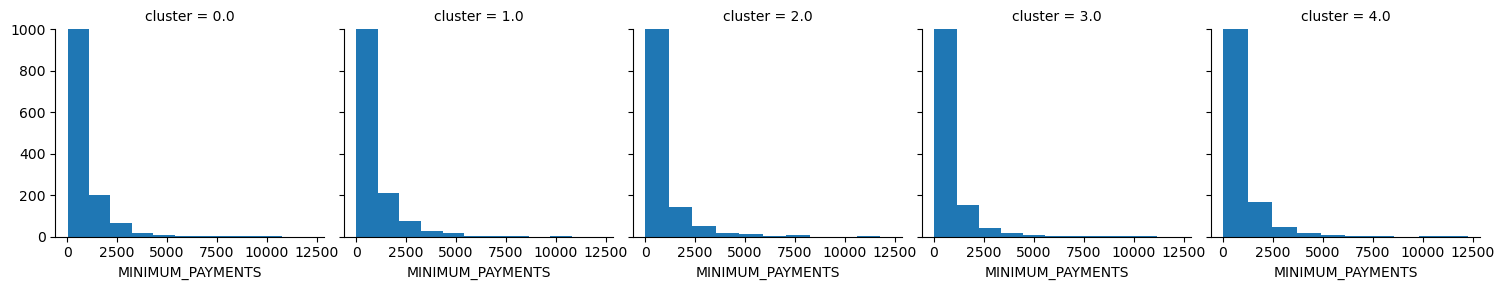

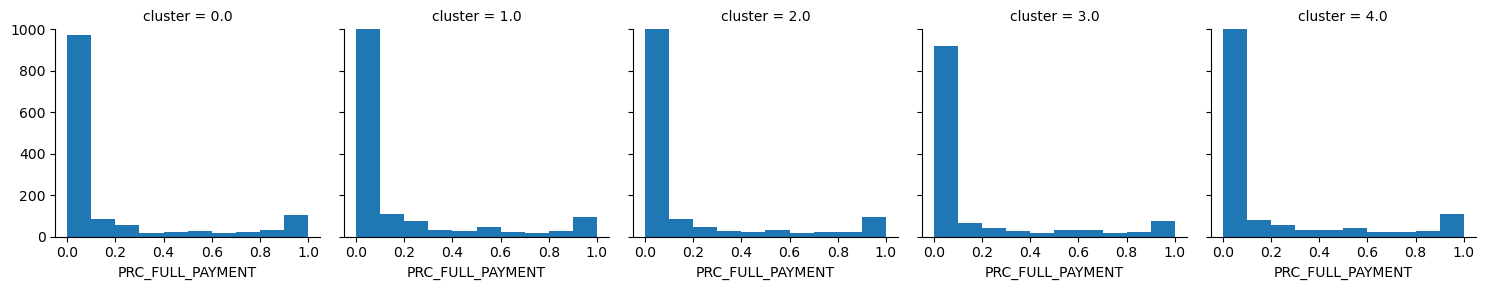

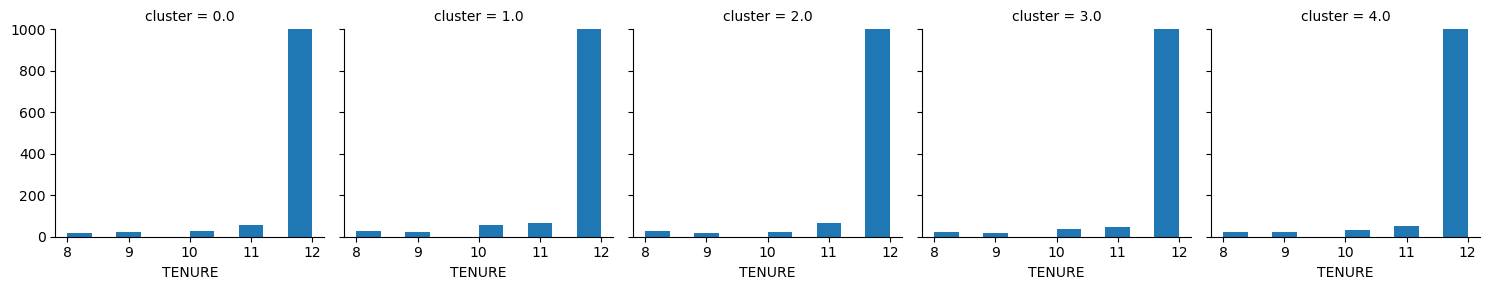

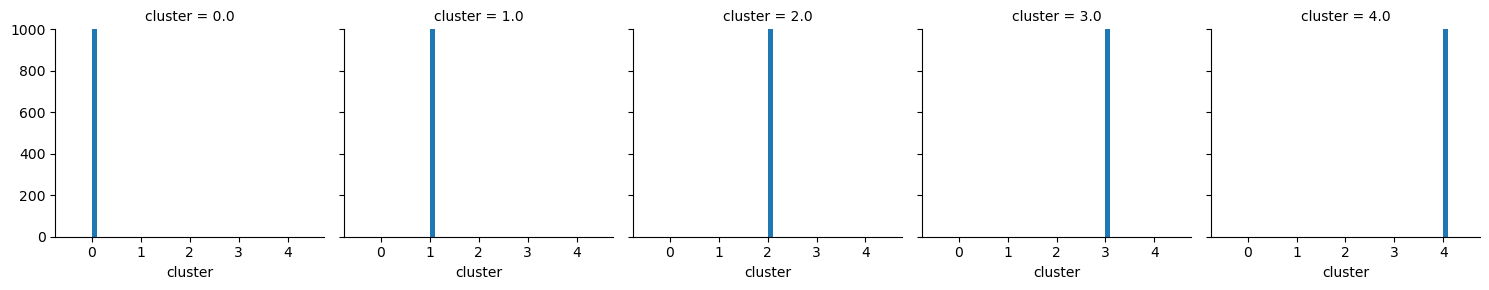

In [34]:
for c in clusters5:
    grid= sns.FacetGrid(clusters5, col='cluster')
    grid.map(plt.hist, c)
    grid.set(ylim=(0,1000))

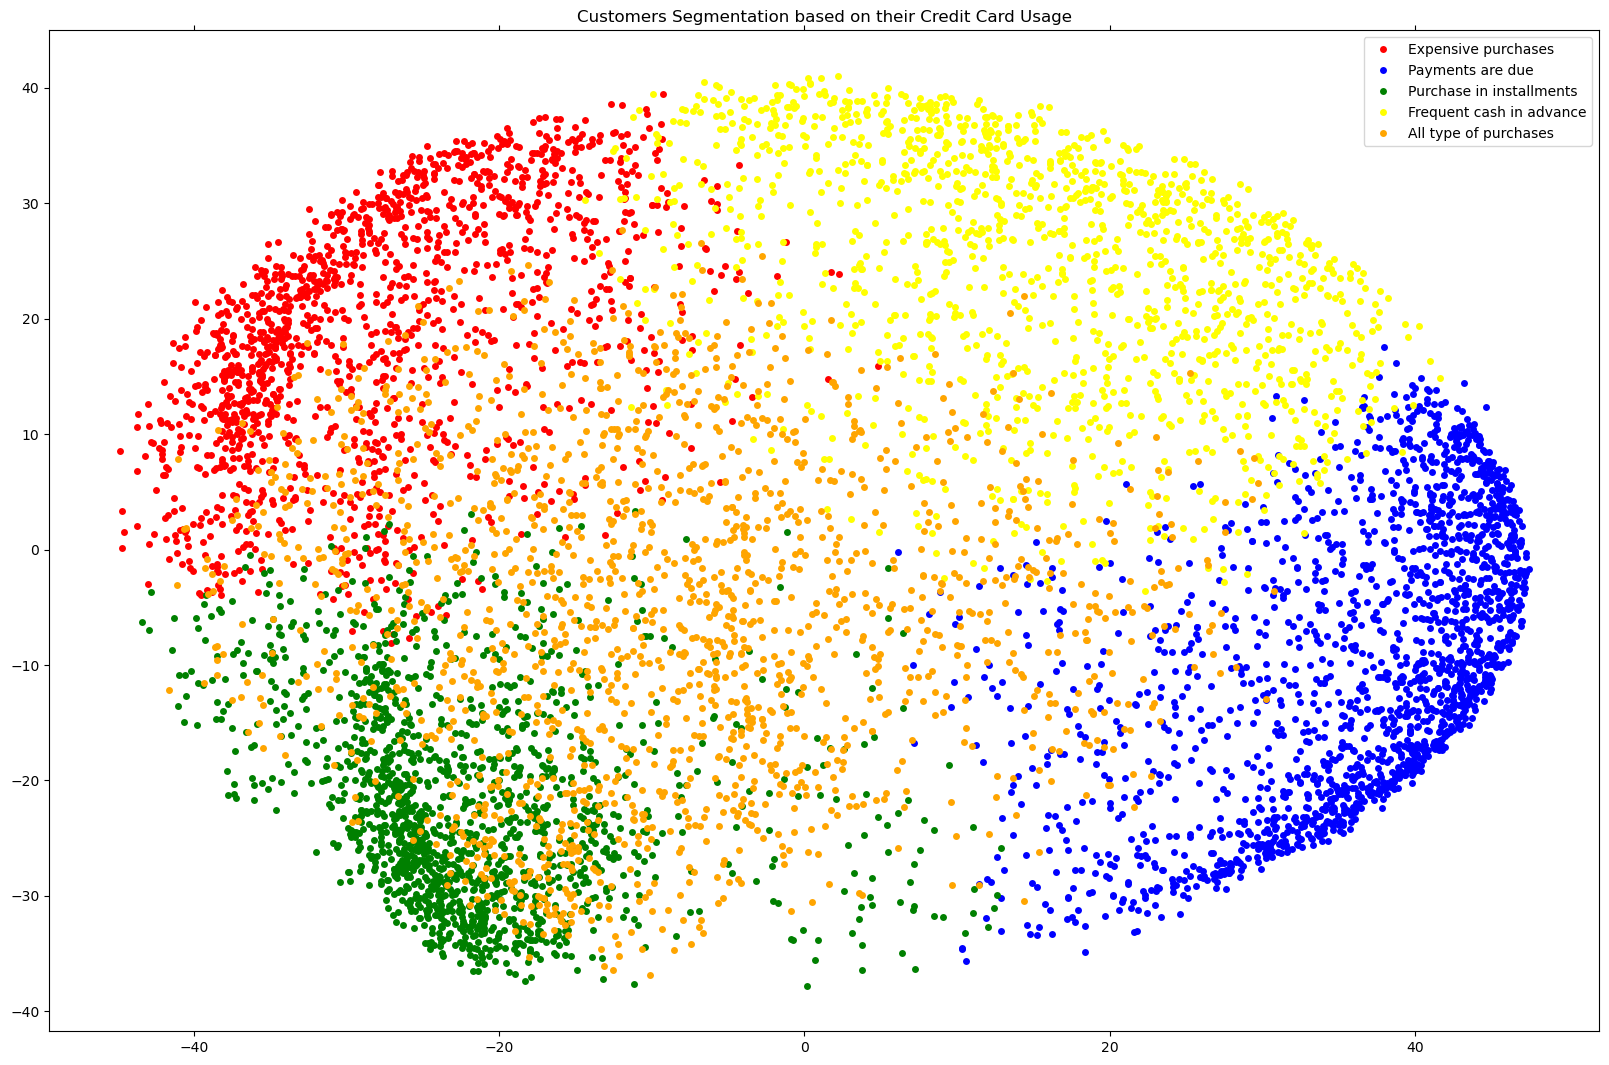

In [35]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          }

names = {0: 'Expensive purchases', 
         1: 'Payments are due', 
         2: 'Purchase in installments', 
         3: 'Frequent cash in advance', 
         4: 'All type of purchases',
         }
  
df_5labels = pd.DataFrame({'x': x, 'y':y, 'label':labels5}) 
groups_5 = df_5labels.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups_5:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card Usage")
plt.show()

Using 5 clusters looks really good.  There is some overlap of the orange group "All types of purchases" but that is expected of such a general group.

Lets try 6 clusters.

In [36]:
kmean6= KMeans(6)
kmean6.fit(X)
labels6=kmean6.labels_
labels6

array([0, 2, 1, ..., 4, 4, 4])

In [37]:
clusters6=pd.concat([df_to_concat, pd.DataFrame({'cluster':labels6})], axis=1)
clusters6.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
0                   95.40      0.000000                    0.000000   
1                    0.00   6442.945483                    0.000000   
2                    0.00      0.000000                    1.000000   
4                    0.00      0.000000                    0.083333   
5                 1333.28      0.000000                    0.000000   

   CASH_ADVANCE_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0               0.0        1000.0   201.802084        139.509787   
1               4.0        7000.0  4103.032597       1072.340217   
2               0.0        7500.0   622.066742        627.284787   
4               0.0        1200.0   678.334763        244.791237   
5               0.0        1800.0  1400.057770       2407.246035   

   PRC_FULL_PAYMENT  TENURE  cluster  
0          0.000000    12.0      0.0  
1          0.222222    12.0      2.0  
2          0.000000    12.0      1.0  
4          0.000000    12.0      3.0  
5          0.000000    12.0      1.0

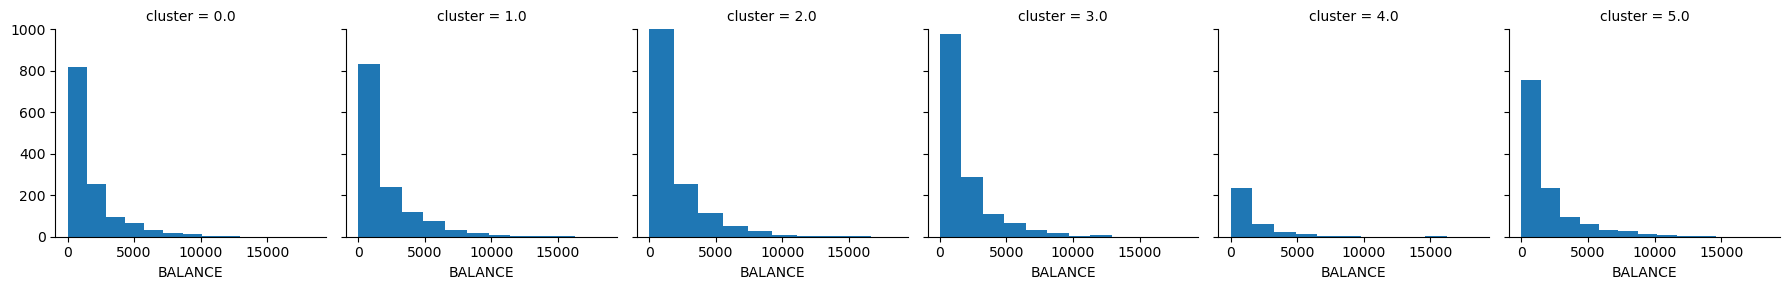

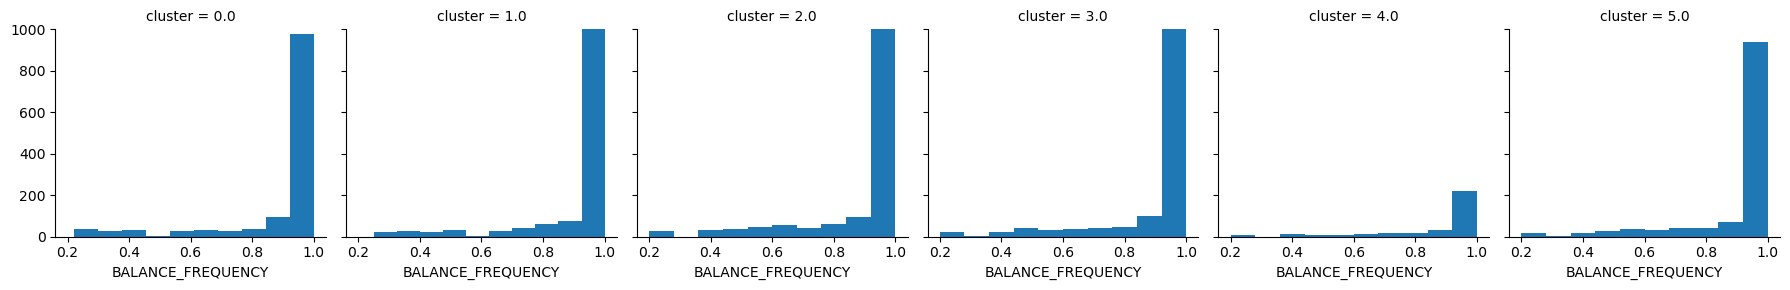

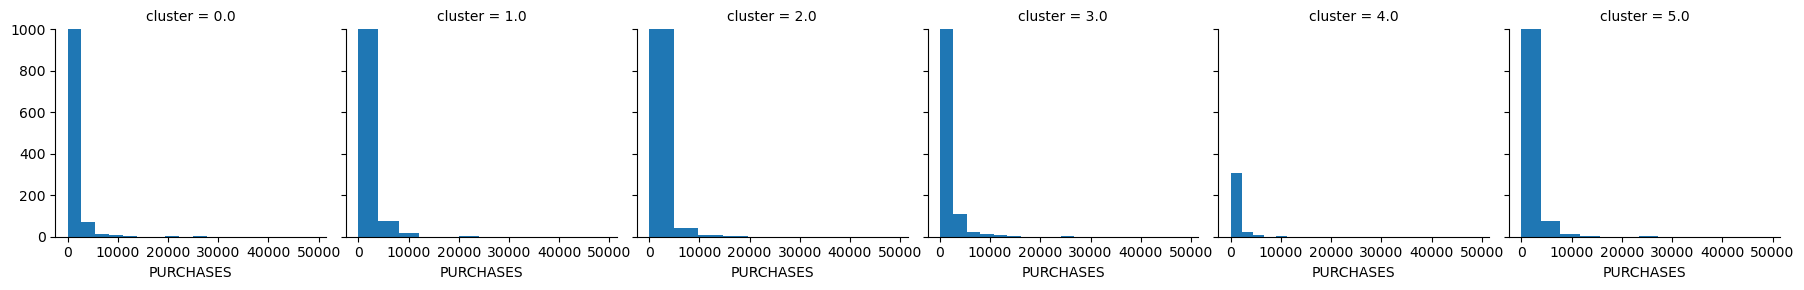

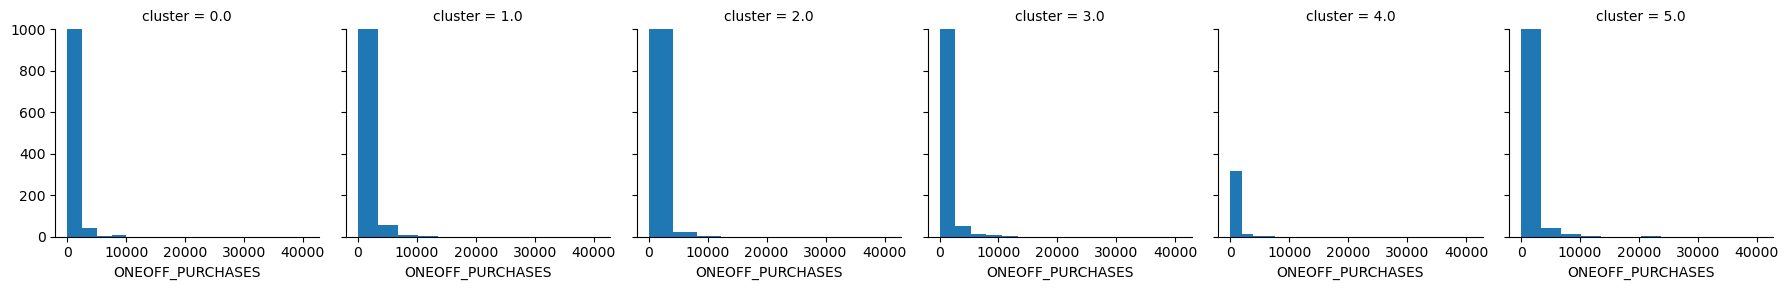

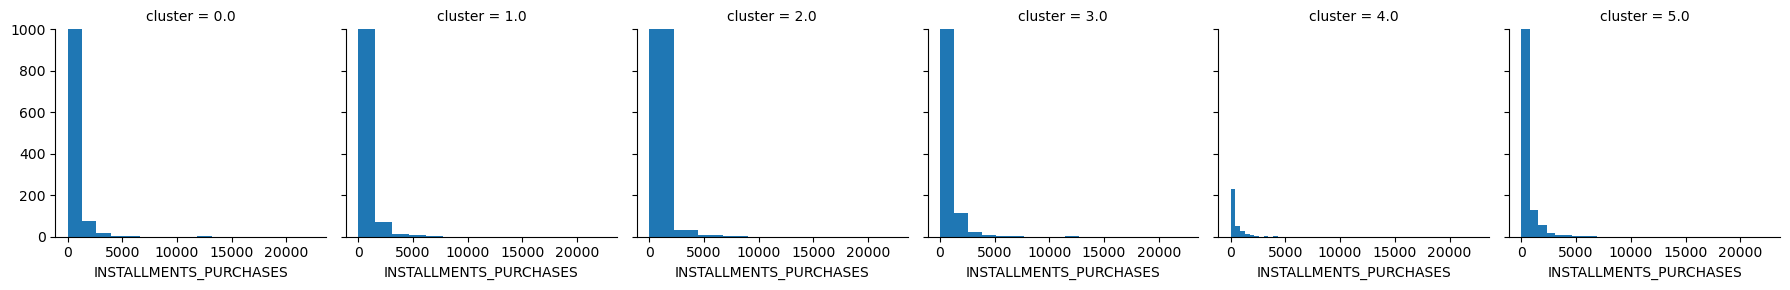

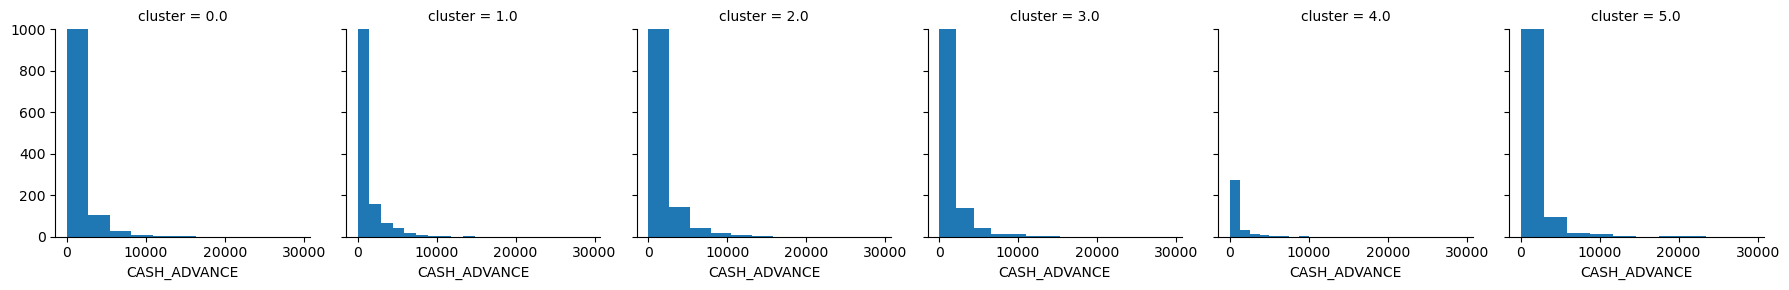

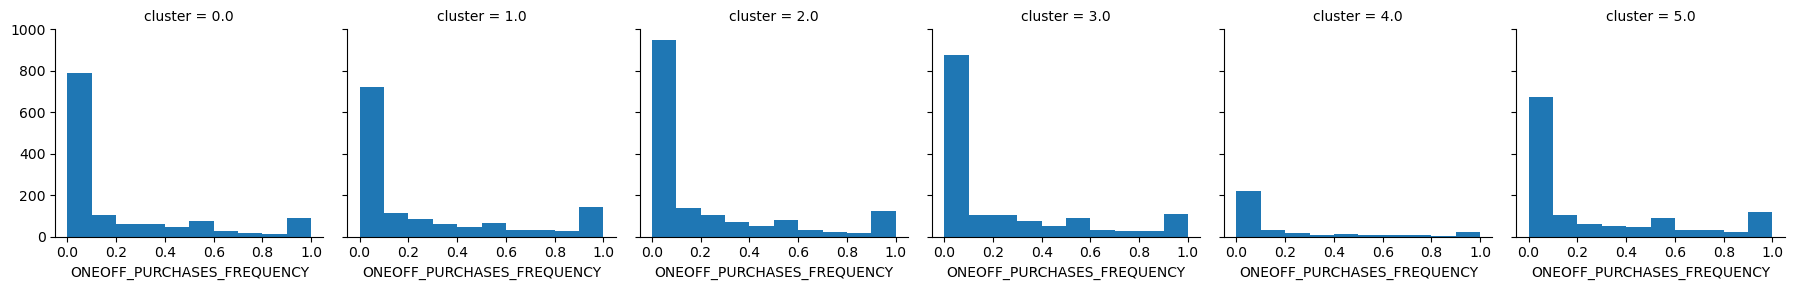

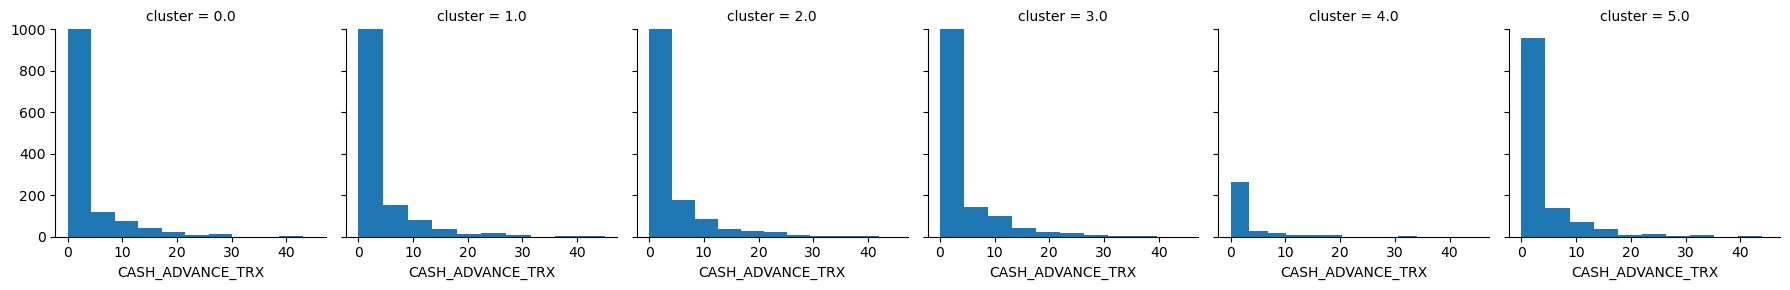

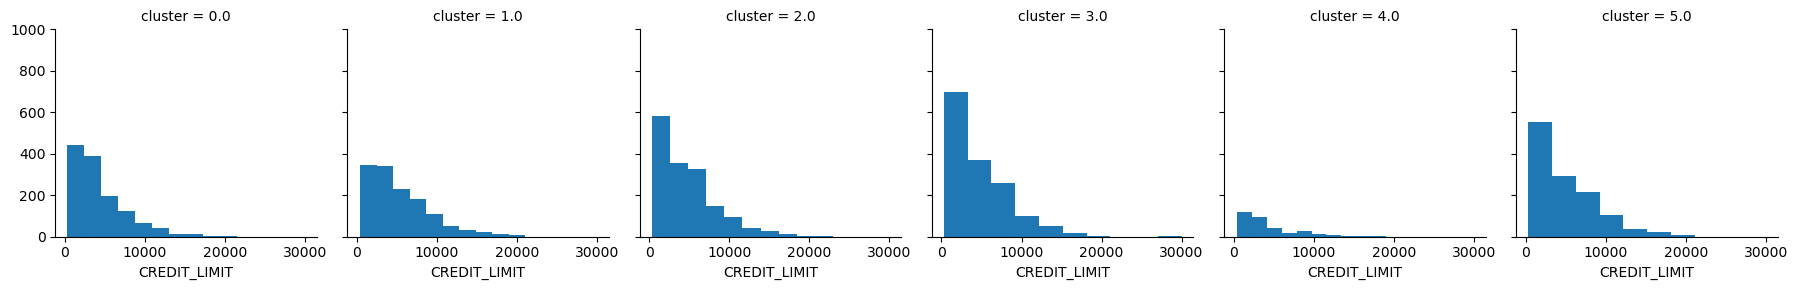

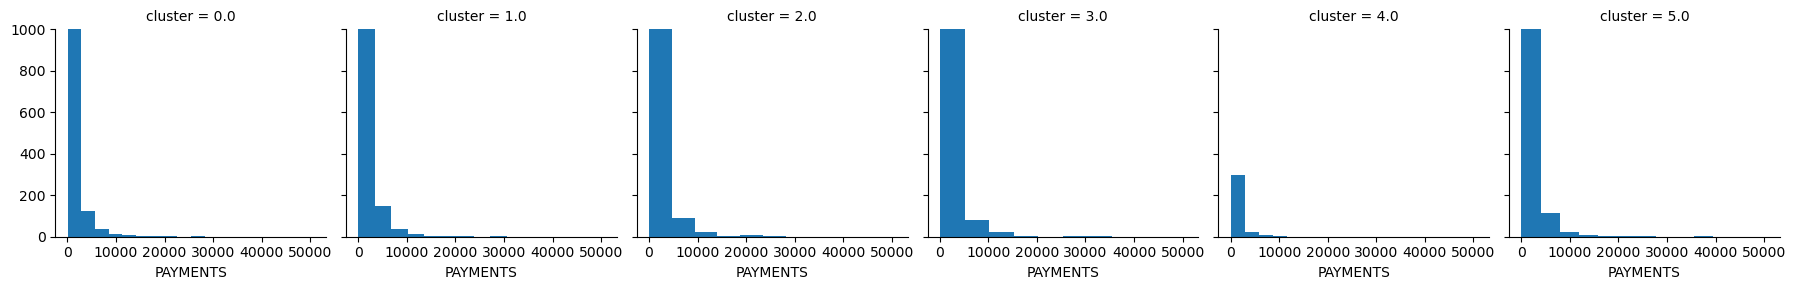

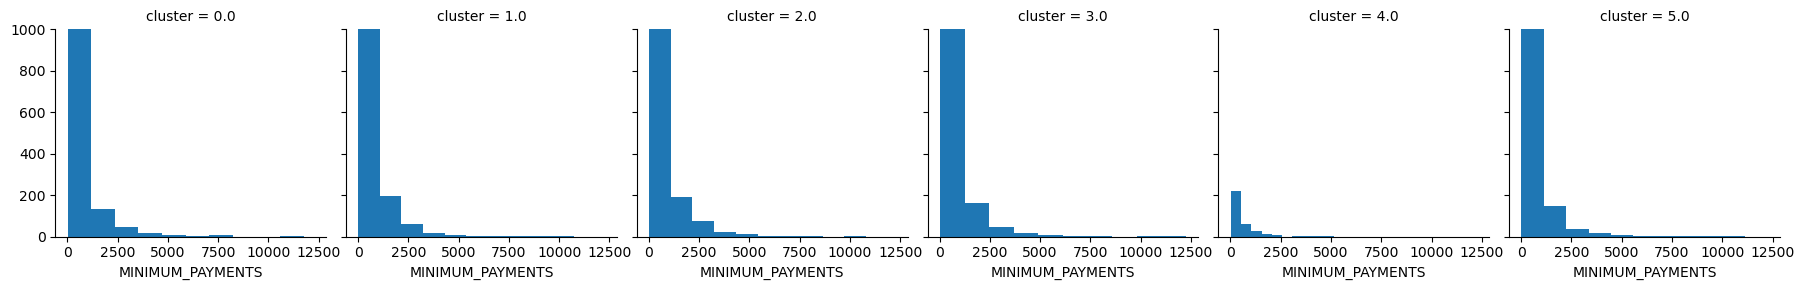

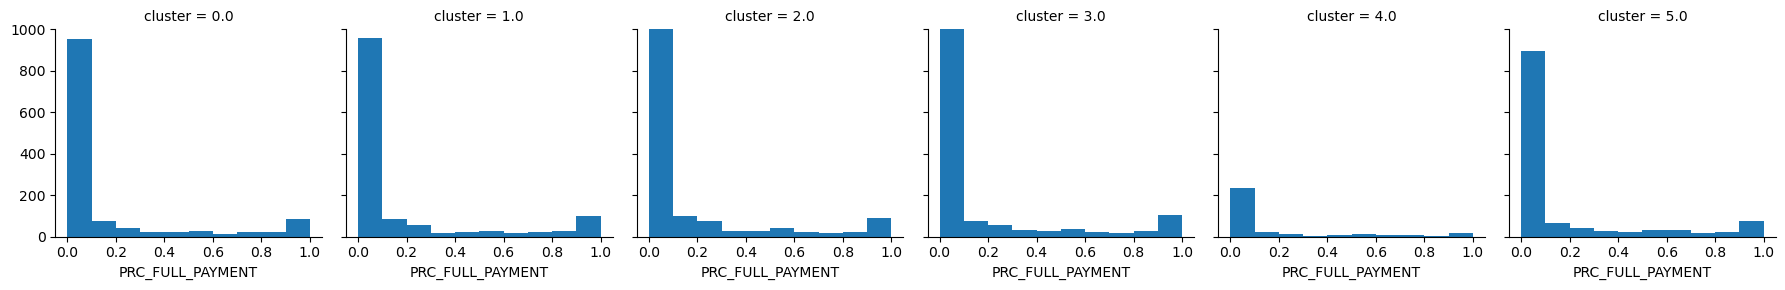

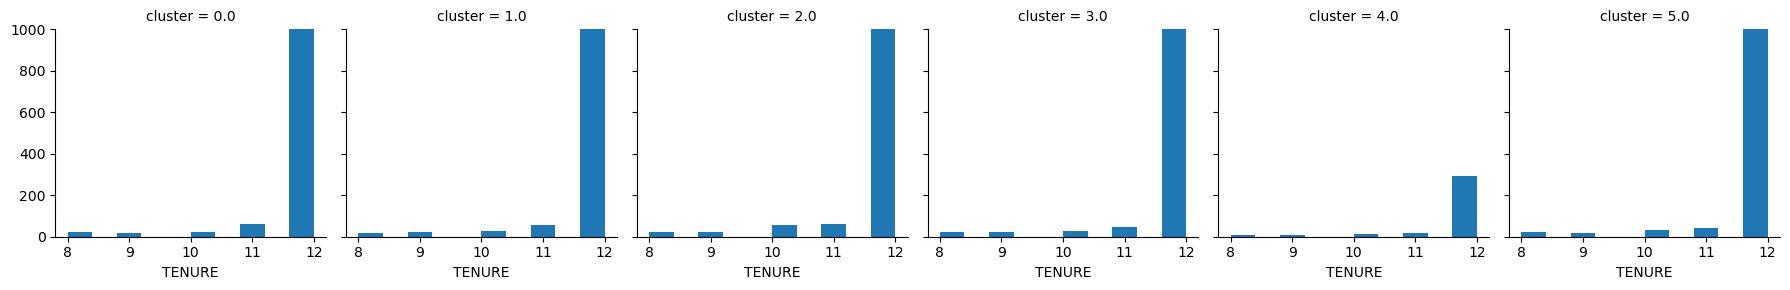

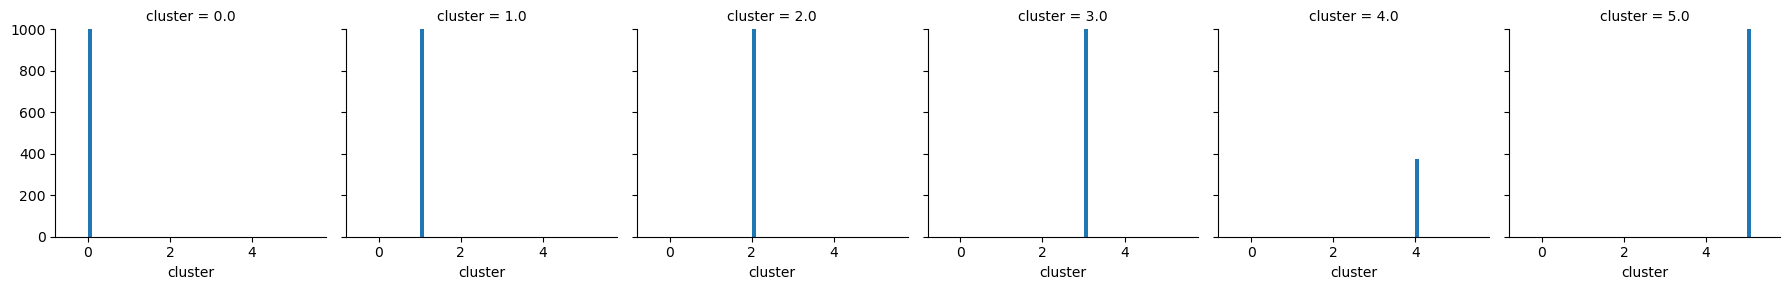

In [38]:
for c in clusters6:
    grid= sns.FacetGrid(clusters6, col='cluster')
    grid.map(plt.hist, c)
    grid.set(ylim=(0,1000))

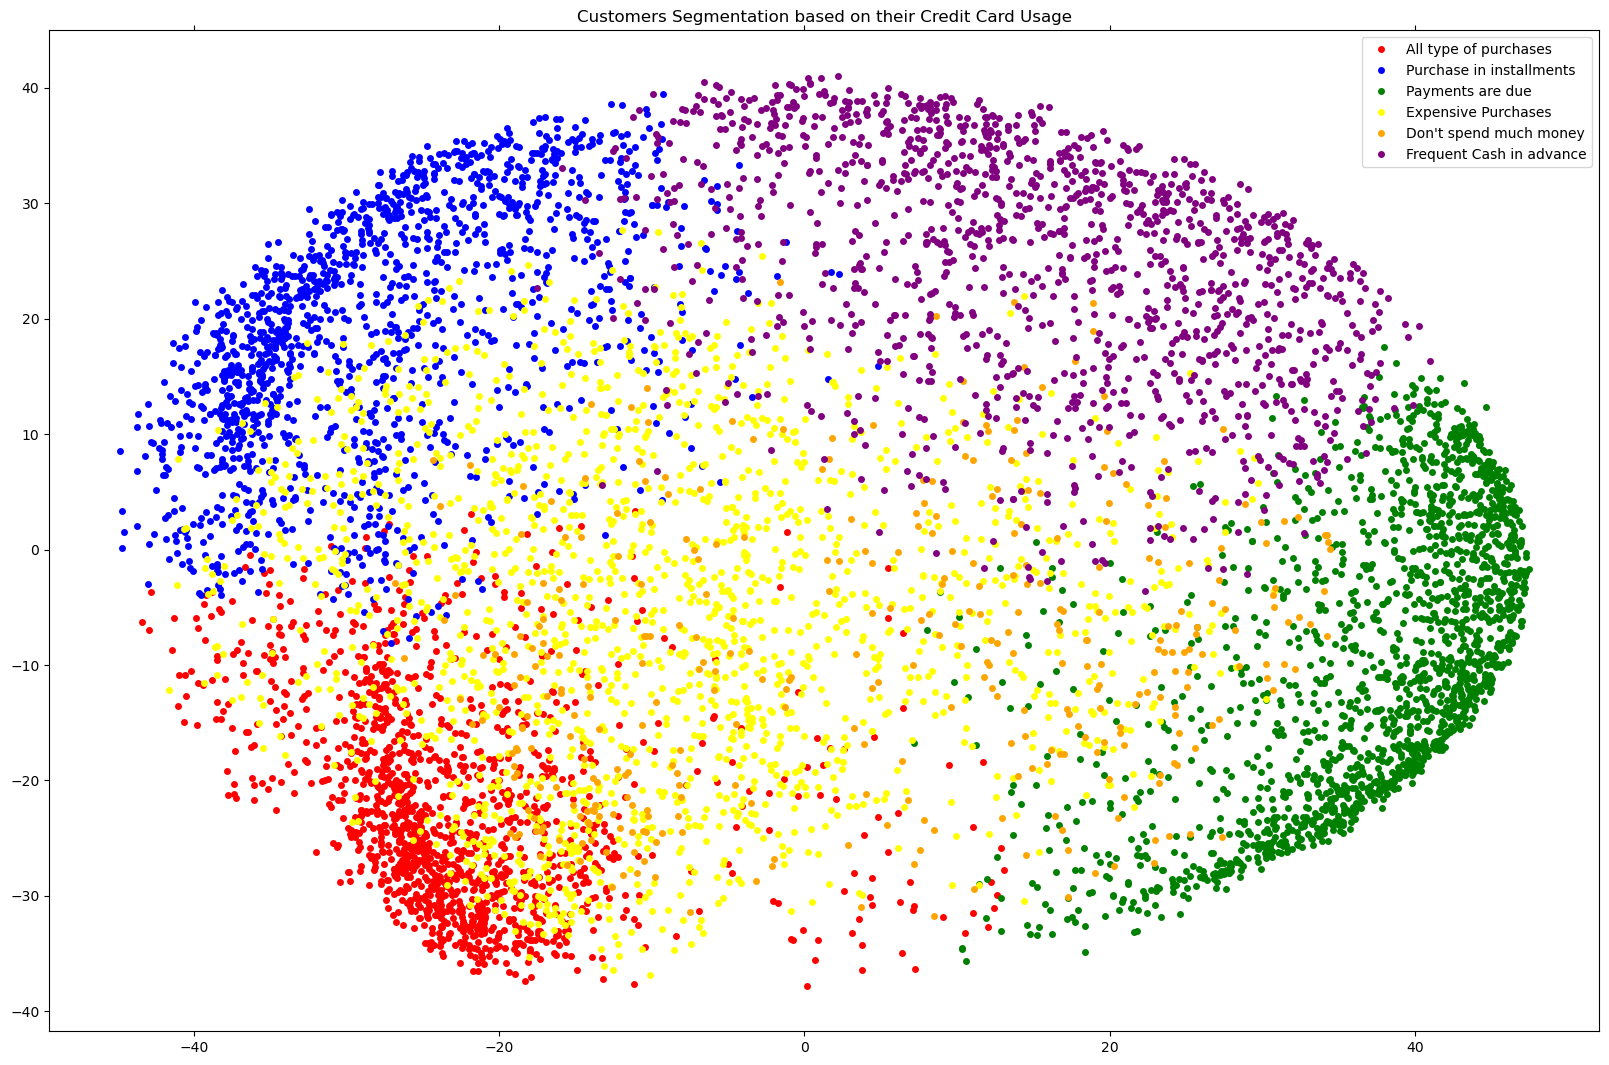

In [55]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'
          }

names = {0: 'All type of purchases', 
         1: 'Purchase in installments', 
         2: 'Payments are due', 
         3: 'Expensive Purchases', 
         4: 'Don\'t spend much money',
         5:'Frequent Cash in advance'
        }
  
df_6labels = pd.DataFrame({'x': x, 'y':y, 'label':labels6}) 
groups_6 = df_6labels.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups_6:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card Usage")
plt.show()

Using 6 clusters has one of the groups really spread out and not clustering at all.  The model with 5 clusters seems to be the best.

## DBSCAN

In [40]:
df_dbscan = pd.read_csv(r'C:\Users\asee\Desktop\MS DS\Machine Learning Unsupervised\Final Project\data\CC GENERAL.csv')
df_dbscan.drop('CUST_ID', axis=1, inplace=True)
df_dbscan['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df_dbscan.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [41]:
train_df, test_df = train_test_split(df_dbscan,test_size=0.2,random_state=42)

In [42]:
mm = MinMaxScaler()
train_df = mm.fit_transform(train_df)
test_df = mm.transform(test_df)

In [43]:
pt = PowerTransformer()
train_df = pt.fit_transform(train_df)
test_df = pt.transform(test_df)

In [44]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(train_df)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
dbscan_df = pd.DataFrame(train_df,columns = df_dbscan.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.058919          -0.425064   1.075176          1.062025   
1  0.639188          -0.990954  -1.038216         -0.772492   
2  0.818551          -1.078839  -0.698155         -0.261171   
3  0.388890           0.628847  -0.081562          0.559472   
4  1.790915           0.628847  -0.023957          0.628845   
5 -0.927548           0.628847   1.131346          1.730844   
6  0.345912           0.628847  -1.038216         -0.772492   
7 -0.676743          -1.078839   0.227745         -0.000491   
8  0.713356          -1.474860   0.016888         -0.772492   
9  0.554134           0.628847   0.527117          0.657599   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                1.219823     -0.765131             1.050568   
1               -0.876474      1.760685            -1.274419   
2               -0.876474      1.184555            -1.011834   
3               -0.876474     -0.765131             1.218760   
4               -0.876474      1.752080            -0.667158   
5               -0.876474     -0.765131             1.218760   
6               -0.876474     -0.377615            -1.274419   
7                0.724951     -0.765131             0.877135   
8                0.938786      1.955943            -0.526663   
9                0.582741     -0.194326             1.050568   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.453297                          1.182790   
1                   -0.899458                         -1.003910   
2                   -0.085422                         -1.003910   
3                    1.734451                         -1.003910   
4                    0.616652                         -1.003910   
5                    1.734451                         -1.003910   
6                   -0.899458                         -1.003910   
7                    1.627359                          1.069481   
8                   -0.899458                          0.007681   
9                    1.627359                          0.458179   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.886817         -0.818764       1.120093     -0.237434   
1                1.842614          1.773017      -1.111388      1.470381   
2                0.716287          1.105145      -0.951939      0.880398   
3               -0.886817         -0.818764       0.341769      0.267080   
4                0.893585          0.224391      -0.657519      1.336319   
5               -0.886817         -0.818764       1.209655      1.800032   
6                0.101914         -0.235735      -1.111388     -0.469042   
7               -0.886817         -0.818764       1.490678      0.161805   
8                1.530151          2.023412       1.165997      0.490330   
9                0.101914         -0.235735       0.506883     -0.835750   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  clusters  
0  0.563069         -0.761963          1.880860  0.421364         0  
1 -0.912322         -0.644535         -0.676502 -2.537957         1  
2  1.609494          0.033340         -0.676502  0.421364         0  
3  1.085464          2.130481         -0.676502  0.421364         0  
4  0.801614          1.389659         -0.676502 -2.431207        -1  
5  0.397394         -0.722250          1.873241  0.421364         0  
6  1.150344          0.447536          0.410911  0.421364         0  
7  0.596001         -0.599084          0.480362  0.421364         0  
8  1.290376          0.979069         -0.676502  0.421364        -1  
9  0.009745          1.004517         -0.676502  0.421364         0

In [46]:
dbscan_df['clusters'].value_counts()

 0    5904
 1     871
-1     364
 3       8
 2       7
 4       5
Name: clusters, dtype: int64

In [47]:
X = dbscan_df[['BALANCE','PURCHASES']].to_numpy()

In [48]:
dbscan = DBSCAN(eps=0.075,min_samples=2)
dbscan.fit(X)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([ 0,  0,  0, ...,  0,  0, 10], dtype=int64)

In [49]:
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df['clusters'].value_counts()

 0     7041
-1       25
 3       15
 7       13
 2       11
 15       7
 10       6
 1        4
 11       4
 9        4
 4        4
 8        3
 13       3
 14       3
 16       3
 18       3
 6        2
 5        2
 12       2
 17       2
 19       2
Name: clusters, dtype: int64

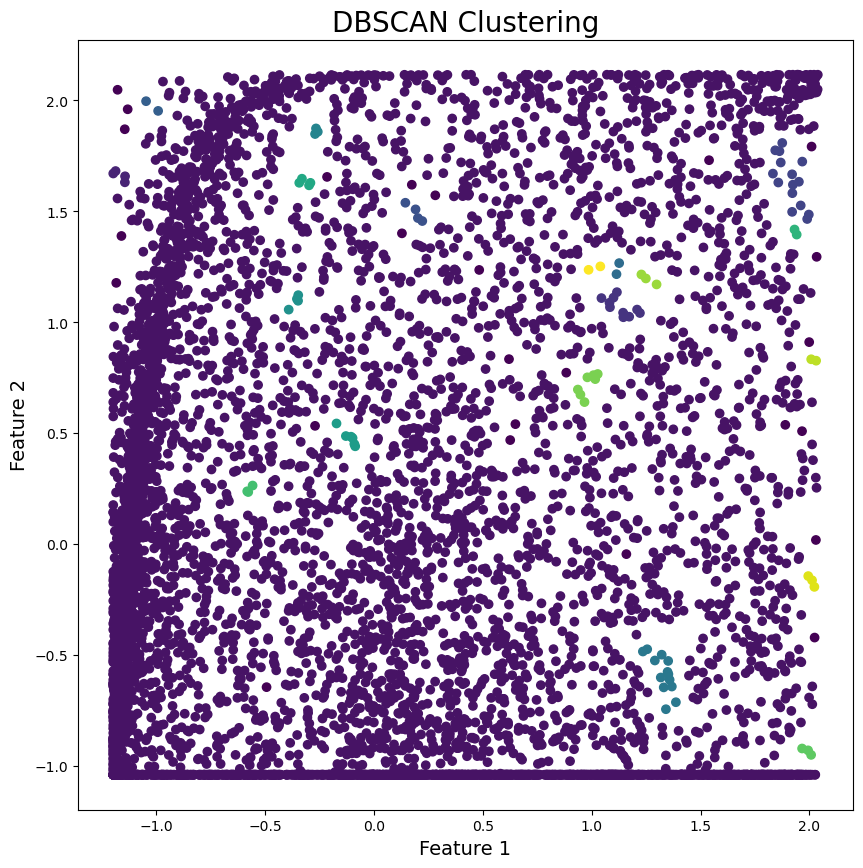

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(dbscan_df['BALANCE'],dbscan_df['PURCHASES'],c=dbscan_df['clusters'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Comparing K-Means and DBSCAN
Clusters formed using K-Means are more or less spherical or convex in shape and must have same feature size. But using DBSCAN, arbitrary shaped clusters can be formed.

K-means clustering is more efficient for large datasets and K-means clustering is also sensitive to the number of clusters specified. Whereas in case of DBSCAN, no need to specify the number of clusters manually.

K-means Clustering does not work well with outliers and noisy datasets whereas DBSCAN works well with outliers.

## Self-Organzing Maps (SOMs)

Self-Organizing Maps (SOMs), also known as Kohonen maps, are unsupervised artificial neural network models that are used for clustering and visualization of high-dimensional data. SOMs are particularly useful for exploring and understanding complex data structures and relationships.

The primary purpose of a SOM is to map input data onto a lower-dimensional grid or lattice, while preserving the topological relationships and similarities between the input samples. The SOM consists of a set of neurons or nodes organized in a grid-like structure. Each neuron represents a prototype or a weight vector that captures the characteristics of the input data.

The training process of a SOM involves two main steps: initialization and adaptation.

1. Initialization: The weight vectors of the neurons are initialized with random values or using a predefined method. Each neuron's weight vector has the same dimensionality as the input data.

2. Adaptation: The SOM is trained using an iterative process. In each iteration, an input sample is presented to the SOM, and the neuron with the most similar weight vector to the input is identified as the "winning" neuron. The winning neuron, along with its neighboring neurons, adjust their weight vectors to become more similar to the input sample. This adjustment process helps the SOM to gradually organize and map the input data onto the grid.

During training, the SOM learns to create clusters or groups of neurons that represent similar input patterns. Neurons that are close to each other on the grid tend to capture similar features or properties. The SOM's grid structure provides a visual representation of the clustering results, allowing for easy interpretation and analysis of the data.

When building the SOM the input length is the number of features, sigma is the radius of the different neighborhoods, and x and y are dimensions for the visualization

In [51]:
som = MiniSom(x = 20,y = 20, input_len = 17, sigma=0.25) 

In [52]:
som.train_random(train_df, 10000) 

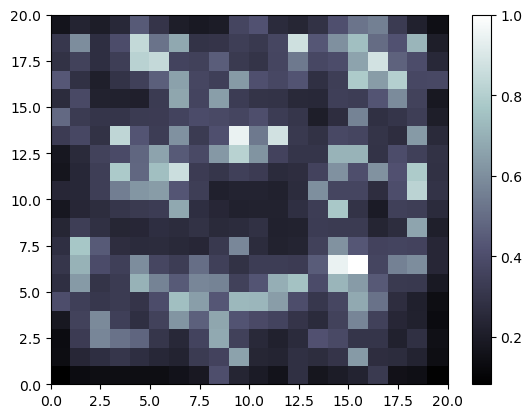

In [53]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(train_df):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
#          markers[y[i]],
#          markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

Here in the self organizing map, the points in the darker spaces have low internueron distances so that means they are closer to the cluster centers and vice-versa.

## References
* Jain, A. K. (2010). Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 31(8), 651-666.
* Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction (2nd ed.). Springer.
* Campello, R. J., Moulavi, D., & Sander, J. (2015). Density-based clustering based on hierarchical density estimates. Data Mining and Knowledge Discovery, 29(2), 309-336.
* Ultsch, A., & Siemon, H. P. (2005). Kohonen's self-organizing feature maps for exploratory data analysis. In H. Bozdogan (Ed.), Statistical data mining and knowledge discovery (pp. 305-323). Chapman and Hall/CRC.
* Clustering for Effective Marketing Strategy by Caesar Mario
* Clustering & Visualization of Clusters using PCA by Saba Naseem Butt
* AdvancedClustering(K-Means,DBSCAN,SOM)+EDA by Rakshith Anil